# Data Mining Project 1st Semester 2020/2021

<div class="alert alert-block alert-success">

## 1) Introduction
    
</div>

<div class="alert alert-block alert-info">

### 1.1) An Understanding
    
</div>

This dataset was provided by the Paralyzed Veterans of America (PVA). The original sample has 95412 rows, meaning that it has 95412 contributors, who have made a previous donation to PVA before. The objective of this project is to recapture a group of donors that is called "lapsed donors", consisting in a group donors who made their last donation between 13 and 24 months ago. Therefore, it is going to be developed a Customer Segmentation , so that the company can better interpret and analise the differents groups of donors. This is very important to do so because it will help to recapture the group of "lapsed donors".

This project was developed using the Jupyter Notebook, to which was created a particular enviroment on Conda. Also, it can be found in a github repository (link: https://github.com/its-pedrofonseca/Data-Mining-Project (still private) ). It was also created a Trello Chart to better understand the tasks that had to be done, as well as the more demanding tasks and to divide the work for the members. (Trello: https://trello.com/b/UswFQo7V/data-mining)

<div class="alert alert-block alert-info">

### 1.2) Setting up Enviroments in Anaconda 
    
</div>

As this project requires specific libraries and packages previously installed, before running the notebook, so that there aren't any external problems, an enviroment in anaconda was created to run this notebook without any problems. The enviroment file is provided in the github previously referred, as a yml file, then the user will have to download it and run some commands in the anaconda command line...........................................................

In [184]:
!pip install --user mca

You should consider upgrading via the 'C:\Users\Asus\anaconda3\python.exe -m pip install --upgrade pip' command.


In [185]:
!pip install prince

You should consider upgrading via the 'C:\Users\Asus\anaconda3\python.exe -m pip install --upgrade pip' command.


<div class="alert alert-block alert-info">

### 1.3) Package Importing
    
</div>

In [187]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import matplotlib.cm as cm
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
#from pandas_profiling import ProfileReport
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
#instalar yellowbrick 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import itertools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.manifold import TSNE
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.covariance import EllipticEnvelope
import prince

<div class="alert alert-block alert-success">

## 2) Importing, Acessing and Cleaning the Data
    
</div>

The model that was followed to develop this project was the KDD Process (Knowledge Discovery Database).

In this phase of the Data Mining Process, it is going to be created a target dataset, which then is going to be discovered. Following this, some processes of data cleaning and preprocessing are going to be applied, such as removing noise, nans variables, data normalization, collecting only the necessary information to apply the next processes. Afterwards, data reduction and projection is going to be applied, finding useful features (with feature engeneering) to represent the data in smaller subsets, dimensionality reduction and/or transformation methods.

Also, along all this processes some data visualization is going to be applied to better understand the data that we are working with.

<div class="alert alert-block alert-info">
    
### 2.1) Reading the Data
    
</div>

In [2]:
#ver se não se consegue por o ficheiro na git, é demasiado grande acho...
data_original=pd.read_csv("donors.csv")

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

<div class="alert alert-block alert-info">

### 2.2) Make a copy of the original dataset

</div>

In [4]:
data = data_original.copy()

In [5]:
data.shape

(95412, 476)

In [6]:
#dataset head
data.head()

Unnamed: 0     ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0           0  2009-01-01     GRI      0    IL  61081                     
1           1  2014-01-01     BOA      1    CA  91326                     
2           2  2010-01-01     AMH      1    NC  27017                     
3           3  2007-01-01     BRY      0    CA  95953                     
4           4  2006-01-01              0    FL  33176                     

          DOB NOEXCH RECINHSE RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN HOMEOWNR  \
0  1957-12-01      0                                   XXXX     T2            
1  1972-02-01      0                                   XXXX     S1        H   
2         NaN      0                                   XXXX     R2        U   
3  1948-01-01      0                                   XXXX     R2        U   
4  1940-01-01      0        X     X                    XXXX     S2        H   

  CHILD03 CHILD07 CHILD12 CHILD18  NUMCHLD  INCOME GENDER  WEALTH1  HIT  \
0                                      NaN     NaN      F      NaN    0   
1                               M      1.0     6.0      M      9.0   16   
2                                      NaN     3.0      M      1.0    2   
3                                      NaN     1.0      F      4.0    2   
4                                      1.0     3.0      F      2.0   60   

   MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  MAGMALE  PUBGARDN  \
0      NaN       NaN      NaN       NaN      NaN     NaN      NaN       NaN   
1      0.0       0.0      3.0       1.0      1.0     1.0      0.0       0.0   
2      0.0       0.0      1.0       0.0      0.0     0.0      0.0       0.0   
3      0.0       0.0      0.0       0.0      0.0     0.0      0.0       0.0   
4      1.0       0.0      9.0       0.0      4.0     1.0      0.0       0.0   

   PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  PUBOPP DATASRCE  MALEMILI  \
0       NaN      NaN       NaN       NaN       NaN     NaN                  0   
1       0.0      2.0       0.0       3.0       0.0     0.0        3         0   
2       0.0      1.0       0.0       0.0       0.0     0.0        3         0   
3       0.0      0.0       0.0       0.0       0.0     1.0        3         0   
4       0.0      4.0       0.0       1.0       0.0     1.0        3         1   

   MALEVET  VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV SOLP3 SOLIH MAJOR  \
0       39        34        18        10         2       1                     
1       15        55        11         6         2       1                     
2       20        29        33         6         8       1                     
3       23        14        31         3         0       3                     
4       28         9        53        26         3       2          12         

   WEALTH2 GEOCODE COLLECT1 VETERANS BIBLE CATLG HOMEE PETS CDPLAY STEREO  \
0      5.0                                                                  
1      9.0      02                                                          
2      1.0                                                                  
3      0.0                                                                  
4      NaN                               Y     Y                        Y   

  PCOWNERS PHOTO CRAFTS FISHER GARDENIN BOATS WALKER KIDSTUFF CARDS PLATES  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                     Y               Y            Y              Y          

  LIFESRC PEPSTRFL  POP901  POP902  POP903  POP90C1  POP90C2  POP90C3  \
0                X     992     264     332        0       35       65   
1                     3611     940     998       99        0        0   
2                X    7001    20

In [7]:
#Dropping the column that is making an index
data.drop(["Unnamed: 0"], axis=1, inplace= True)

In [8]:
# count of missing values
data.isna().sum().sum()

5158884

In [9]:
# duplicated observations
data.duplicated().sum()

0

<div class="alert alert-block alert-info">

### 2.3) Normalize Some Values and replacing empty String for Nans
    
</div>

In [10]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

COLLECT1  VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  \
0             0         0      0      0      0     0       0       0   
1             0         0      0      0      0     0       0       0   
2             0         0      0      0      0     0       0       0   
3             0         0      0      0      0     0       0       0   
4             0         0      1      1      0     0       0       1   
...         ...       ...    ...    ...    ...   ...     ...     ...   
95407         0         0      0      0      0     0       0       0   
95408         0         0      0      0      0     0       0       0   
95409         0         0      0      0      0     0       0       0   
95410         0         0      0      0      0     0       0       0   
95411         0         0      0      0      0     0       0       0   

       PCOWNERS  PHOTO  CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  \
0             0      0       0       0         0      0       0         0   
1             0      0       0       0         0      0       0         0   
2             0      0       0       0         0      0       0         0   
3             0      0       0       0         0      0       0         0   
4             0      0       1       0         1      0       1         0   
...         ...    ...     ...     ...       ...    ...     ...       ...   
95407         0      0       0       0         0      0       0         0   
95408         0      0       0       0         0      0       0         0   
95409         0      0       0       0         0      0       0         0   
95410         0      0       0       0         0      0       0         0   
95411         0      0       0       0         0      0       0         0   

       CARDS  PLATES  
0          0       0  
1          0       0  
2          0       0  
3          0       0  
4          1       0  
...      ...     ...  
95407      0       0  
95408      0       0  
95409      0       0  
95410      0       0  
95411      0       0  

[95412 rows x 18 columns]

In [11]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

NOEXCH  RECINHSE  RECP3  RECPGVG  RECSWEEP  MAJOR  PEPSTRFL
0           0         0      0        0         0      0         1
1           0         0      0        0         0      0         0
2           0         0      0        0         0      0         1
3           0         0      0        0         0      0         1
4           0         1      1        0         0      0         0
...       ...       ...    ...      ...       ...    ...       ...
95407       0         0      0        0         0      0         0
95408       0         0      0        0         0      0         0
95409       0         0      1        0         0      0         1
95410       0         1      0        0         0      0         1
95411       0         1      0        1         0      1         1

[95412 rows x 7 columns]

In [12]:
data["MAILCODE"]=pd.Series(np.where(data["MAILCODE"].values == 'B', 1, 0),data.index)

In [13]:
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE       928
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE    93954
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN       2316
HOMEOWNR    22228
CHILD03     94266
CHILD07     93846
CHILD12     93601
CHILD18     92565
NUMCHLD     83026
INCOME      21286
GENDER       2957
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE    21280
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3       95232
SOLIH       89212
MAJOR           0
WEALTH2     43823
GEOCODE     80168
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

<div class="alert alert-block alert-info">

### 2.4) Dropping Columns with High percentege of missing values
    
</div>

In [14]:
#if a columns has more than half of missing values the column is removed
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

75 columns were removed


In [15]:
data.shape

(95412, 401)

In [16]:
set(data.dtypes)

{dtype('int32'), dtype('int64'), dtype('float64'), dtype('O')}

<div class="alert alert-block alert-info">

### 2.5) Defining metric and non-metric features
    
</div>

In [17]:
set(data.dtypes)

{dtype('int32'), dtype('int64'), dtype('float64'), dtype('O')}

In [18]:
# Define metric and non-metric features
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

<div class="alert alert-block alert-info">

### 2.6) Delete columns with same values

</div>

In [19]:
old_non_metric_feat = list(data[non_metric_features].columns)

In [20]:
#Remove columns that only have one elements as its variable thus it wouldnt give any new information
remover=[]

def del_columns_with_one_elem(lista):
    for i in range(len(lista)):
        #print(lista[i])
        if len(set(data[lista[i]])) == 1:
            #print(len(set(data[lista[i]])))
            remover.append(lista[i])   
    for r in remover:
        lista.remove(r)


In [21]:
del_columns_with_one_elem(non_metric_features)
print("Deleted Column/s:", (set(old_non_metric_feat).difference(list(data[non_metric_features].columns)))) 

Deleted Column/s: {'RFA_2R'}


### 2.7) Feature Grouping

In [22]:
data_corr = data.corr()

corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.9] 
corrdata =corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()

corrdata.columns = ["Features1","Features2","corr_value"]
len(corrdata.Features2.unique())

97

In [23]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [24]:
#Example for the first element of correlation the other features that also correlate

for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)

In [25]:
#List of elements that present correlation between themselves, without repeated features

correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)

In [26]:
for c in correlated_group:
    print(c)

['HHAGE3' 'HHAGE1' 'HHAS1']
['HV2' 'HV1' 'HVP1' 'HVP2' 'HVP6']
['ETH2' 'ETHC5' 'ETHC4']
['POP901' 'POP902' 'POP903']
['HHD7' 'HHD9']
['LFC5' 'LFC3' 'LFC1']
['AFC1' 'AFC2']
['AGE906' 'AGE905' 'AGE903' 'AGE902' 'AGE904']
['IC3' 'IC1' 'IC4' 'IC2']
['DW4' 'DW5' 'DW6']
['LFC4' 'LFC2' 'LFC1']
['RHP2' 'RHP1' 'HUR2']
['IC23' 'IC14']
['HHP2' 'HHP1' 'RHP3' 'HHN3' 'HHN4']
['ETH5' 'LSC2' 'ETH13']
['OCC9' 'EIC1']
['IC11' 'IC20']
['HUPA2' 'DW6' 'DW5']
['AGE901' 'AGE904' 'AGE902']
['HHD1' 'HHN3' 'AGE907' 'HHN4' 'HHD4' 'HHP1']
['DW2' 'DW1']
['AFC5' 'AFC4']
['IC10' 'IC19']
['IC12' 'IC21']
['CARDPROM' 'NUMPROM']
['HUPA6' 'DW6' 'DW5']
['HV3' 'HV4']
['HC17' 'HC18']
['HC8' 'HC7']
['IC22' 'IC13']
['HHD3' 'MARR1' 'HHD2']
['HHD5' 'HHD2']
['RP2' 'RP1']
['NGIFTALL' 'CARDGIFT']
['HVP3' 'HVP4']
['AGEC7' 'MARR3']
['TPE4' 'TPE3']
['HHN5' 'HHN6']
['HHN1' 'HHD11']
['HU1' 'HU2']
['AGEC6' 'HHAGE1']


In [27]:
data.drop(['HHAGE1','HHAGE3'], axis=1, inplace=True)

In [28]:
# ficar com 
data.drop(['HV1','HVP1','HVP2','HVP6'], axis=1, inplace=True)

In [29]:
# dar drop a blacks com 15-59,blacks >15, percent blacks total e ficar com nada (faz-se com idade depois)
data.drop(['ETHC5','ETHC4'], axis=1, inplace=True)

In [30]:
# dar drop a num of persons e households e ficar com o numero de familias no bairro
data.drop(['POP901','POP903'], axis=1, inplace=True)

In [31]:
# dar drop a female household w childen e ficar com single parents household
data.drop(['HHD9'], axis=1, inplace=True)

In [32]:
# dar drop a female e adult females in labor force e ficar com adults in labor force
data.drop(['LFC5','LFC3'], axis=1, inplace=True)

In [33]:
#drop de males actine in military e ficar com o total adults actine in military
data.drop(['AFC2'], axis=1, inplace=True)

In [34]:
#escolher average age of population
data.drop(['AGE906','AGE905','AGE903','AGE902'], axis=1, inplace=True)

In [35]:
#escolher mediana e media da income das familias
data.drop(['IC1','IC3','IC2'], axis=1, inplace=True)

In [36]:
# ficar com percent house units c/ mais de 10 casas/units na morada
data.drop(['DW4','DW5'], axis=1, inplace=True)

In [37]:
## dar drop a male e adult males in labor force e ficar com adults in labor force
data.drop(['LFC4','LFC2'], axis=1, inplace=True)

In [38]:
#ficar com media de numeros de quartos por casas
data.drop(['RHP1','HUR2'], axis=1, inplace=True)

In [39]:
# percentagem de familias com income >=150000
data.drop(['IC14'], axis=1, inplace=True)

In [40]:
# ficar com a media de numero de pessoas por casa (rever)
data.drop(['HHP1','RHP3','HHN3','HHN4'], axis=1, inplace=True)

In [41]:
# ficar com a percentagem de hispanics
data.drop(['LSC2','ETH13'], axis=1, inplace=True)

In [42]:
# ficar com percentagem de pessoas empregues na agricultura
data.drop(['OCC9'], axis=1, inplace=True)

In [43]:
# ficar com percentagem de familias com income entre os 75000 e 99999
data.drop(['IC11'], axis=1, inplace=True)

In [44]:
#ficar com Percent Adult Veterans Age 16+
data.drop(['DW6'], axis=1, inplace=True)

In [45]:
#ficar com Percent Families w/ Income $50,000 - $74,999 IC19
data.drop(['AFC5'], axis=1, inplace=True)

In [46]:
#ficar com Percent Families w/ Income $100,000 - $124,999 IC21
data.drop(['IC10'], axis=1, inplace=True)

In [47]:
data.drop(['IC12'], axis=1, inplace=True)

In [48]:
# ficar com NUMPROM
data.drop(['CARDPROM'], axis=1, inplace=True)

In [49]:
#ficar com Average Contract Rent in hundreds
data.drop(['HV3'], axis=1, inplace=True)

In [50]:
# features nao importantes
data.drop(['HC18'], axis=1, inplace=True)

In [51]:
data.drop(['HC8'], axis=1, inplace=True)

In [52]:
# Percent Families w/ Income $125,000 - $149,999
data.drop(['IC13'], axis=1, inplace=True)

In [53]:
#ficar com a percentagem de casamentos
data.drop(['HHD3'], axis=1, inplace=True)

In [54]:
data.drop(['HHD2'], axis=1, inplace=True)

In [55]:
#ficar com HV4
data.drop(['RP2'], axis=1, inplace=True)

In [56]:
#ficar com NGIFTALL
data.drop(['CARDGIFT'], axis=1, inplace=True)

In [57]:
#ficar com adultos com +75 anos
data.drop(['HVP3'], axis=1, inplace=True)

In [58]:
#ficar com a mediana de pessoas numa casa HHP1
data.drop(['MARR3'], axis=1, inplace=True)

In [59]:
data.drop(['TPE4'], axis=1, inplace=True)

In [60]:
data.drop(['HHN5'], axis=1, inplace=True)

In [61]:
data.drop(['HHN1'], axis=1, inplace=True)

In [62]:
data.drop(['HU2'], axis=1, inplace=True)

In [63]:
data.shape

(95412, 346)

### 2.7) Fill missing values (Simple imputation)

In [64]:
# simple imputation

In [65]:
# Creating a copy to apply central tendency measures imputation
data_central = data.copy()

In [66]:
modes = data_central[non_metric_features].mode().loc[0]
modes.head(10)

ODATEDW     2015-01-01
OSOURCE            MBC
STATE               CA
ZIP              85351
DOB         1968-01-01
MDMAUD            XXXX
DOMAIN              R2
HOMEOWNR             H
GENDER               F
DATASRCE             3
Name: 0, dtype: object

In [67]:
# checking how many NaNs we still have
data_central.fillna(data_central.median(), inplace=True)
data_central.fillna(modes, inplace=True)
data_central.isna().sum().sum()

0

### 2.8) Outlier Removal

#### IQR

In [68]:
# Updating metric and non metric features
non_metric_features = data_central.select_dtypes(include="object").columns.to_list()
metric_features = data_central.columns.drop(non_metric_features).to_list()

In [69]:
ql = data_central.quantile(.003)
qh = data_central.quantile(.997)
iqr = (qh - ql)

upper_lim = qh + 2 * iqr
lower_lim = ql - 2 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(data_central[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
otliers_iqr=data_central[~filters]
data_central = data_central[filters]
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / data_original.shape[0], 5), 5)*100, "%")

NumExpr defaulting to 8 threads.


Percentage of data removed after outliers: 1.0619999999999998 %


In [70]:
data_central.shape

(94399, 346)

#### Isolation Forest

In [71]:
from sklearn.ensemble import IsolationForest

In [72]:
iso = IsolationForest(contamination=0.01)
iso_df = iso.fit_predict(data_central[metric_features])

In [73]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [74]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / data_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 2.051 %


In [75]:
data.drop(otliers_iqr.index,inplace=True)
data.drop(outliers_if.index,inplace=True)

### 2.9) Data Selection

In this step, the variables that are going to be used to do the clustering are chosen. The group has decided to split the variables into three categories. 

The __Value__ variables, that relate to the promotion and the client, such as how much is the average gift from that donor, if it a major donor and others variables.

The __Demographic__ variables are more related with the dynamic social population in which the subject lives. This selection should be useful in a way that we can better understand the surroundings of the donor, and thus better define the marketing strategy.

The __Socio-Economic__ variables represent the  economic activity that are molded by social processes, because of the local or global economy. This is useful, to understand better the economic conditions in which the donor lives.

Also, a juntion of all the previosly variables are put together in a dataframe called __overall__.


In [76]:
# 12 variaveis
value = data.loc[:,["RAMNTALL","NGIFTALL","MINRAMNT","MAXRAMNT","TIMELAG","AVGGIFT","NUMPROM","CARDPM12","NUMPRM12","MAJOR","HIT","WEALTH1","IC4","HHAS1","HHAS2","HHAS3","HHAS4","INCOME","HV2","HV4"]]

In [77]:
# 22 variaveis
demographic = data.loc[:,["STATE","GENDER","DOB","POBC1","POBC2","POP902","POP90C1","POP90C2","POP90C3","POP90C4",
                          "POP90C5","AGE901","SEC1","SEC2","SEC3","SEC5","LSC1","LSC3","LSC4","MARR1","MARR2","MARR4"]]

### 2.11) Some Data Visualization

Since the original dataset was very big and incomplete, first the group had to do some data cleaning and then some data selection, in order to better visualize the variables that could bring value, when doing the clustering.

Data Visualization is importante here to better understand, the variables that are being used, and also to see how they spead along an axis. This helps us have a better domain knowledge, which is very important to any data science project.


### 2.11.3) Data Exploration

Starting with the vast majority of variables, that are metric variables, the visualization here chosen is the box plot that
shows the distribution of quantitative data in a way that facilitates comparisons between variables.

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

In [78]:
value_metric_features = value.select_dtypes(include=["int32","float64","int64"]).columns.to_list()

Executing constrainedlayout
LayoutBox: gridspec000000.ss000001.ax000002, (left: 0.000) (bot: 0.000) (right: 0.000)  (top: 0.000) 
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
find

findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Coop

findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Verdana' (verdanai.ttf

findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Guttman Miryam' (MIRL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic 

findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: scor

findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Hatzvi' (TZVIM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'InputMapperIcons' (InputMapperIcons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Vilna' (VILNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Glouc

findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal medium normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Myanmar Text' (mmrtext

findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.535
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelb.

findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (BKANT.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Yad' (GYADL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings' (wingding

findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeFourSym' (ST

findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>) = 10.145
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal black normal>) = 10.525
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Sch

findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Rashi' (RASHIB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Symbol' (seguisym.

findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Corbel' (corbell.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal black normal>) = 0.525
findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal heavy normal>) = 10.43
findfont: score(<Font 'Courier New' (

findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Guttman Kav-Light' (GKAVLIT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal black normal>) = 10.525
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Frnew' (FRNEW.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal black normal>) = 11.525
findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 11.145
findfont: sco

findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal roman normal>) = 10.145
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-CourMir' (MIRFX.TTF)

findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (T

findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Miryam' (MIRB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav' (GKAVBLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Yad' (GYADL.TTF) normal normal 

findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 400 normal>) = 10.05
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0 to Arial ('C:\\WINDOWS\\Fonts\\arial.ttf') with score of 0.050000.
rownum0min == rownumCmin
rownum0max == rownumCmax
rownum0min == rownumCmin
rownum0max == rownumCmax
rownum0min == rownumCmin
rownum0max == rownumCmax
rownum0min == rownumCmin
rownum0max == rownumCmax
rownum0min == rownumCmin
rownum0max == rownumCmax
rownum0min == rownumCmin
rownum0max == rownumCmax
rownum0min == rownumCmin
rownum0max == rownumCmax
rownum0min == rownumCmin
rownum0max == rownumCmax
rownum0min == rownumCmin
rownum0max == rownumCmax
rownum0min == rownumCmin
rownum0max =

left 0.017054
right 0.012280
bottom 0.045064
bbox.y0 0.005209
pos.y0 0.045139
LayoutBox: gridspec000000.ss000037.ax000038, (left: 0.913) (bot: 0.000) (right: 0.961)  (top: 0.946) 
left 0.031232
right 0.003551
bottom 0.045064
bbox.y0 0.005209
pos.y0 0.045139
LayoutBox: gridspec000000.ss000039.ax000040, (left: 0.962) (bot: 0.000) (right: 1.000)  (top: 0.946) 
left 0.021780
right 0.003551
bottom 0.045064
bbox.y0 0.005209
pos.y0 0.045139
LayoutBox: gridspec000000.ss000001.ax000002, (left: 0.000) (bot: 0.000) (right: 0.061)  (top: 0.946) 
left 0.031215
right 0.019721
bottom 0.044990
bbox.y0 0.005209
pos.y0 0.045064
LayoutBox: gridspec000000.ss000003.ax000004, (left: 0.062) (bot: 0.000) (right: 0.115)  (top: 0.946) 
left 0.026858
right 0.016891
bottom 0.044990
bbox.y0 0.005209
pos.y0 0.045064
LayoutBox: gridspec000000.ss000005.ax000006, (left: 0.116) (bot: 0.000) (right: 0.173)  (top: 0.946) 
left 0.027228
right 0.019656
bottom 0.044990
bbox.y0 0.005209
pos.y0 0.045064
LayoutBox: gridspec000

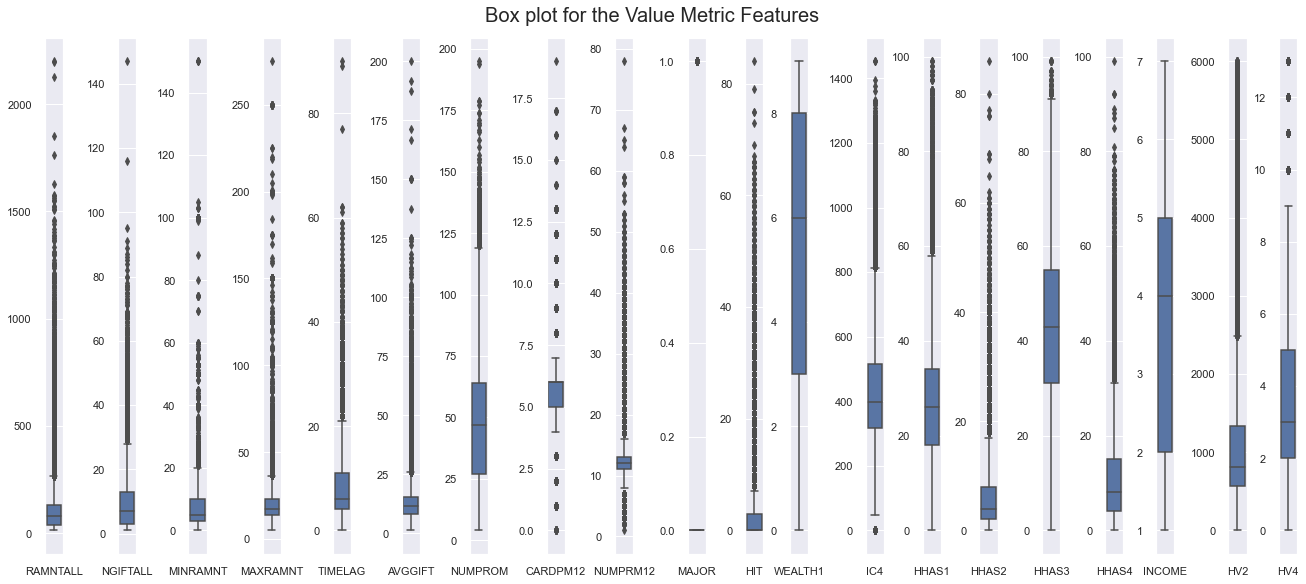

In [79]:
sns.set()

plot_features = value.columns
fig, axes = plt.subplots(1, len(plot_features), figsize=(18,8), constrained_layout=True)
j=0
k=1

for i in zip(axes, plot_features):
    sns.boxplot(data=value.iloc[:,j:k], ax=i[0])
    j=j+1
    k=k+1
    
plt.suptitle("Box plot for the Value Metric Features", fontsize=20)
plt.show()

In [80]:
dem_metric_features = demographic.select_dtypes(include=["int16","int32","float64","int64"]).columns.to_list()

Executing constrainedlayout
LayoutBox: gridspec000041.ss000042.ax000043, (left: 0.000) (bot: 0.000) (right: 0.000)  (top: 0.000) 
left 0.021798
right 0.002315
bottom 0.045139
bbox.y0 0.085069
pos.y0 0.125000
LayoutBox: gridspec000041.ss000044.ax000045, (left: 0.000) (bot: 0.000) (right: 0.000)  (top: 0.000) 
left 0.026524
right 0.002315
bottom 0.045139
bbox.y0 0.085069
pos.y0 0.125000
LayoutBox: gridspec000041.ss000046.ax000047, (left: 0.000) (bot: 0.000) (right: 0.000)  (top: 0.000) 
left 0.035976
right 0.002315
bottom 0.045139
bbox.y0 0.085069
pos.y0 0.125000
LayoutBox: gridspec000041.ss000048.ax000049, (left: 0.000) (bot: 0.000) (right: 0.000)  (top: 0.000) 
left 0.026524
right 0.004314
bottom 0.045139
bbox.y0 0.085069
pos.y0 0.125000
LayoutBox: gridspec000041.ss000050.ax000051, (left: 0.000) (bot: 0.000) (right: 0.000)  (top: 0.000) 
left 0.026524
right 0.004314
bottom 0.045139
bbox.y0 0.085069
pos.y0 0.125000
LayoutBox: gridspec000041.ss000052.ax000053, (left: 0.000) (bot: 0.000) 

left 0.035958
right 0.007684
bottom 0.045064
bbox.y0 0.005209
pos.y0 0.045139
LayoutBox: gridspec000041.ss000048.ax000049, (left: 0.168) (bot: 0.000) (right: 0.225)  (top: 1.000) 
left 0.026506
right 0.010770
bottom 0.045064
bbox.y0 0.005209
pos.y0 0.045139
LayoutBox: gridspec000041.ss000050.ax000051, (left: 0.226) (bot: 0.000) (right: 0.283)  (top: 1.000) 
left 0.026506
right 0.010770
bottom 0.045064
bbox.y0 0.005209
pos.y0 0.045139
LayoutBox: gridspec000041.ss000052.ax000053, (left: 0.284) (bot: 0.000) (right: 0.342)  (top: 1.000) 
left 0.026506
right 0.010770
bottom 0.045064
bbox.y0 0.005209
pos.y0 0.045139
LayoutBox: gridspec000041.ss000054.ax000055, (left: 0.343) (bot: 0.000) (right: 0.395)  (top: 1.000) 
left 0.021780
right 0.010770
bottom 0.045064
bbox.y0 0.005209
pos.y0 0.045139
LayoutBox: gridspec000041.ss000056.ax000057, (left: 0.397) (bot: 0.000) (right: 0.449)  (top: 1.000) 
left 0.021780
right 0.010770
bottom 0.045064
bbox.y0 0.005209
pos.y0 0.045139
LayoutBox: gridspec000

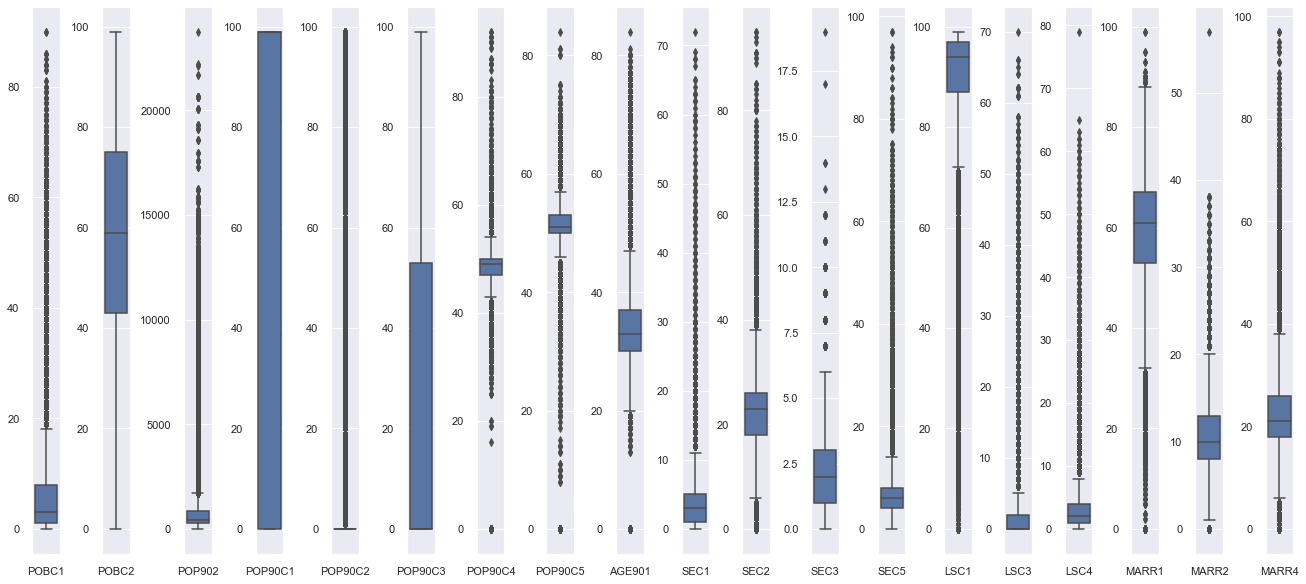

In [81]:
sns.set()

plot_features = demographic[dem_metric_features].columns
fig, axes = plt.subplots(1, len(plot_features), figsize=(18,8), constrained_layout=True)
j=0
k=1

for i in zip(axes, plot_features):
    sns.boxplot(data=demographic[dem_metric_features].iloc[:,j:k], ax=i[0])
    j=j+1
    k=k+1
    
#plt.suptitle("Box plot fordata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABRgAAAJICAYAAAAKMYhkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdeVwU9f8H8NcuGIKYB2Eq3tZ6i4ipCEFeqCggeCSm5ol5Z6dSqZG3lnnhkUelaWpqgF+PVBRFPDv06/kzEwXtq4SiIoexO78/aCeHSxZ2d3Z3Xs/Hw0d9htn9vOfY3Zn3fA6VIAgCiIiIiIiIiIiIiEpBLXcAREREREREREREZL2YYCQiIiIiIiIiIqJSY4KRiIiIiIiIiIiISo0JRiIiIiIiIiIiIio1JhiJiIiIiIiIiIio1JhgJCIiIiIiIiIiolJjgpGIiBRv6dKlaNSoUYF/rVu3Ru/evfHVV1/h77//ljvMEtFvy4EDB0r9HgkJCTh37lyJ1l29ejVee+01NG/eHK+++ioyMzNLXW9J7dq1C8nJyWJ5x44daNSoEb7++muT1/10fU//a9y4Mdzd3dGpUye89957Jd5/VHKNGjVCcHBwidYdPHgwGjVqhIcPHxql7ilTpojHOjo6uth133rrLXHd0tJqtdi4cWOJP0+dOnVCmzZtSl1ffk9vb3H/jLV/i3P37l1s377d5PUQERFR2djLHQAREZGl6Ny5M5o0aQIg7wY/IyMDZ86cwcKFC3H27FksW7ZM5ghNb9OmTfj000+xfPnyZ6579OhRfP7556hWrRqGDBkCBwcHODk5mTS+BQsWYM2aNfjxxx9NWk9JtG3bFm3btgUACIKAx48f448//sCePXuwe/duTJ8+Ha+//rrMUSpTSEgI2rZtCwcHB6O/9/79+4tMdGZkZODYsWNlruPdd9/Fnj17EBQUVKL1hwwZgidPnpS53vxCQkLg5uZW5N9NsX+flpaWhu7du6N9+/bo06ePSesiIiKismGCkYiI6B9dunRBaGioZJkgCBgzZgz279+P48ePw8vLS6bozCMtLa3E6168eBEAMHHiRPTr189UIUkYEp+ptW3bFhMmTCiw/Ny5cxg5ciQ+/fRTNGzY0Kgty6hk8n+OjcXV1RUJCQnIysqCo6Njgb8fOnQIT548gZOTU5la8xp6ng8dOrTUdRUnJCQE7dq1M8l7l0RWVhYeP34sW/1ERERUcuwiTUREVAyVSiUmK06fPi1zNJZF32KqSpUqMkdiWVq2bIkZM2ZAq9Xiyy+/lDscMqLOnTsjKysLCQkJhf593759aNiwIerUqWPmyIiIiIjkxQQjERHRM9jZ2QEAnnvuuQJ/2717NwYMGIBWrVrBw8MDAwYMwH/+8x/JOh999BEaNWqEOXPmSJafOXMGTZo0QWBgYLHdG/XjKl65cgUzZ85E+/bt4enpiaFDh+Lnn38u0TacO3cOY8eORbt27dCiRQsEBARg5cqVknoHDx4sdgMfN25csWPINWrUqMC6O3bsMGi/pKSkoFGjRli8eDFmzpyJVq1aoV27dtizZ0+hdXbq1Ak7d+4EAPTu3RudOnWS/F0QBKxfvx7dunVD8+bN0blzZ0RFRSE3N7fAex0/fhzDhg2Dp6cnWrVqhddffx179+4tbhcapEePHnBzc8Pp06dx9+5dyd8uXLggHouWLVsiODgYmzdvhiAIBbZ36NChuHLlCkaMGAEPDw+0a9cO06ZNQ1ZWFu7cuYO3334bnp6e8PLywnvvvYd79+4ViKUkx0Jv79696Nu3Lzw8PPDqq69i4cKFSExMLHB8GzVqhClTpmDlypVo06YN2rRpI46B+fjxYyxfvhzBwcHw8PBAixYt4O/vj/nz50ta9emP/6JFi7Bnzx707NkTLVu2RLdu3bBu3TrodLpCY/ztt98wdOhQtGrVCm3btsXEiRORkpIiWaeoMRi3b9+Ofv36wcPDA97e3hg7diwuX75caD2F6dKlC9RqNX766acCf8vMzMTRo0fRrVu3Il9fkvOuUaNGOHXqFADglVdeweDBgwH8Oy7iuXPnEBAQgBYtWmDAgAEQBKHQMRi1Wi3Wr1+PoKAgtGrVCn5+fnj//fcl45caU0ZGBhYuXIguXbqIY7JOnz690NaYt27dwvTp09GlSxe0aNECHh4eCA0NxebNm8V1duzYgc6dOwMADh48KDkHixqPs7DxWDt16oTBgwdj+/bt6NChAzw8PDB37lzx7yX9Lrhx4wYmTZqEjh07onnz5ujUqRNmzJiB1NTUUu8zIiIiW8IEIxERUTEEQcDOnTthZ2eHLl26SP42b948TJ48GSkpKejVqxd69uyJlJQUvPPOO1iwYIG43tSpU1G9enVs2LABly5dApCXjJg6dSrs7Owwf/78QpOX+U2dOhXR0dEICAhAly5d8Ouvv+LNN98ssjWV3oEDBxAWFoajR4+iQ4cOGDBgAOzs7LBo0SIMGzZMTDLqx60DgICAAIwfP77I9xw/fnyBdfXjV5Z0v+ht3boVe/bsQVhYGFq1aoVWrVoVWueQIUPQuHFjAMDrr7+OIUOGSP7+1VdfYcmSJfD09ERYWBhyc3OxePHiAnVu27YNw4YNw5UrVxAQEIDXX38daWlpmDRpElauXFnsviwplUoFDw8PAMAvv/wiLo+Pj8eAAQNw4sQJdOzYEYMGDYJOp8OMGTMwbdq0Au+TkpKCsLAwCIKAAQMGwNXVFVu2bMGHH36IsLAw3L59G/3790fdunURGxuLTz75RPJ6Q47FN998g0mTJuF///sfgoOD4evri40bNxYaF5A3BudXX32F3r17w8fHB+7u7sjNzcWwYcOwdOlSuLq6YuDAgejTpw+ys7Oxdu1aTJkypdD3mTx5MmrXro0BAwaIcUdERBRY99atW2LC7Y033kDjxo2xb98+DBo06JldkqdNm4aIiAikpaUhODgYr732Go4dO4awsLASJxlfeOEFeHp64vDhwwUmfjp8+DCys7PRvXv3Ql9b0vNu/Pjx4riHo0aNQkhIiOR9xowZgzp16mDAgAFo164dVCpVgboEQcDo0aMxd+5caLVa9O3bF23atMHu3bsxcOBA3Llzp0TbW1KPHj1CWFgYvvrqK9SqVQtDhgyBh4cHtm7din79+kmS7CkpKejTpw9+/PFHtGrVCkOHDkXXrl1x7do1zJgxAxs3bgQANGnSRPyM169fX/IdY6irV68iMjISXbp0Qffu3cXvmJIek3v37mHo0KGIj49H27ZtMWzYMLz00kvYvHkzhgwZYjWTgBEREZmUQEREpHBLliwRNBqNMGbMGGHJkiXCkiVLhMWLFwuzZ88WevfuLTRr1kzYtGmT5DWnT58WNBqN0Lt3byEtLU1cnpaWJvTq1UvQaDTCqVOnxOXx8fGCRqMR+vXrJ+h0OiEyMlLQaDTCqlWrShxf69athRs3bojLf/vtN6Fp06ZC586dhdzcXMm6+/fvFwRBEB49eiS88sorQuvWrYXz58+Lr/3777+Fd999V9BoNMKyZcsK1KV/fUnienpdQ/ZLcnKyoNFohEaNGgmXLl16Zn2CIAgffvihoNFohIsXL4rLtm/fLmg0GqFVq1bCtWvXxOX/+9//hJYtWwpt2rQRtFqtIAiC8OeffwrNmzcXevToIdy7d09cNysrS3j99deFxo0bC1euXCk2Bn19S5YsKXa9efPmCRqNRvj2228FQRCEzMxMoX379kL79u2F5ORkcT2tVitMmDBB0Gg0wuHDh8XlHTt2FDQajTBz5kxx2YMHDwR3d3dBo9EIEydOFHQ6nSAIgpCbmyt07dpV0Gg0QmZmpiAIhh2LP//8U2jZsqXQpUsXITU1VVz3woULQrNmzQSNRiNs375dXK7RaASNRiMcPHhQss27du0SNBqN8MUXX0iWP3r0SOjQoYPQpEkTMT798ddoNMKaNWvEdR8/fiz0799f0Gg0wokTJwrUuWLFCsl7jx07VtBoNMJPP/0kLhs0aJCg0WiEBw8eCIIgCImJiYJGoxEGDhwoPHr0SFzv559/Fho1aiSMHj1aKM7T590333wjaDQa4ejRo5J1Jk6cKHTr1k0QBEEICgoSNBqN+DdDz7v88T8dw/jx4wvE17FjR8HT01Msb9u2TTxHcnJyxOWxsbGCRqMRPvvssxJt74cffih+J+b/97QZM2YIGo1G2Lhxo2T5gQMHxDj0PvnkE0Gj0QjHjh2TrHv27FlBo9EIr7/+urhMf46MGTNGsq5GoxGCgoIKxK3/bK5fv16yb57+HOoZckw2bNggaDQa4YcffpC8x6effipoNBrh0KFDBWIhIiJSGrZgJCIi+sfBgwexbNkyLFu2DMuXL8fXX3+NixcvwsnJCQ8fPoRWqxXX1XfV++CDD1C1alVxedWqVfHuu+8CyOuOqefr64vQ0FCcPXsW06dPx3fffQcPDw+MGDGixPENGjRIMrabu7s7AgICkJycjN9++63Q1xw4cAAPHjzAkCFD0KxZM3G5vb09IiIiUL58eUmcZWXofgGAunXrii0Ty6JHjx5o0KCBWH7xxRfRrFkzPHz4EA8ePAAAxMTE4MmTJ5g4caJk7Mjy5ctj4sSJ0Ol0YjfsstK3Ss3IyAAAxMXF4d69exg5ciRq1aolrqdWq4vcN4B0Ao/nn38eDRs2BAAMGzZMbL1mZ2cnHt/bt28DMOxY7NmzB9nZ2Rg9ejReeOEFcd2mTZsWaEGnV758efj5+UmWNW3aFDNnziww6YizszOaNm0KrVYrHgs9Nzc3vPnmm2LZyckJb7/9NgAgNja2QJ3Dhw+XLHvttdcAoNiuv/ou4e+++y6cnZ3F5a1bt8Y777yDjh07Fvna/Pz9/aFSqSTdpLOzs3HkyJEiWy8a87wrrgu2nn57IyIiJK2je/bsibfeegutW7cuUV07d+4UvxPz/9PLzc3Fjz/+iJdffhlvvPGG5PWdO3dG69atsX//fvFzEBQUhFmzZqFDhw6SdVu2bIny5cubbCKn/PvNkGOi765/9uxZye/A5MmTkZCQIJ6DRERESsZZpImIiP4xZ84cyeyzmZmZ+OOPP7BkyRJ88cUXSEpKEsdRvHz5MtRqNTw9PQu8j35Z/m6XU6dOxbFjx7BlyxY4OTlh/vz54viOJaHvkvy0li1bIiYmBpcvXy40Fn0Mr7zySoG/Va1aFfXr18elS5fw6NEjVKxYscSxFKU0++XpZFtZ1KtXr8CyypUrA8g7llWqVMH58+cB5I27dvXqVcm6+i62hozJVxz97LdOTk4AINZ94cIFLF26tMD6dnZ2BeouV66c2F1WT/9++febg4MDgH8n3zHkWPz3v/8FkHc+5de6dWts3bq1wPLq1asXOH/r16+P+vXrIycnB2fPnsX169dx8+ZNXLhwQRxX8OkEDQB4eHjA3l56SaqPI//+qFGjRoHhBPTJoeK6SF++fBl2dnZo0aJFgb+Fh4cX+brCVK9eHS1btkRcXBxmzJgBtVqNI0eOIDMzs8gEozHPu/znQ2EuX76MmjVr4sUXX5QsV6lUmDx5conqAYBvv/32mbNIX79+HZmZmdBqtYWe1zk5OdBqtbhy5Qo8PT3FMTvT09Nx6dIl3Lx5E9evX8dvv/0mrmts5cqVQ7Vq1STLDDkm3bp1w/Lly7Flyxb89NNP8PHxga+vL/z8/ODq6mr0eImIiKwRE4xERERFcHJyQvPmzbFs2TJ06dIFO3bswKhRo9CgQQNkZGTAwcGh0LETK1asCEdHR2RlZUmWP//882jfvj2io6NRo0YN1KhRw6B48icLAIitzfStg/LTL3+61dbTqlWrhkuXLiErK8soCcbS7Bd9YqysihvHUvhnApVHjx4BAL7//vsi183fwq60bt26BQCoXbu2pO6iJlgprO7y5csXue6zxu005Fjcv38fACStF/XyJ2aKi02n02HVqlVYv369uC0uLi7w8PCAm5sbrl27VmAym8LO6woVKsDR0VHcZ3rFnSv53/dpDx8+hIODA8qVK1fkOobw9/fHggUL8Ouvv8LT0xP79u1DvXr1imyJa8zzrrhzQu/hw4eFHktT0E+k88cff0haNuan374HDx5gzpw52LVrF/7++2+oVCq4ubmhffv2uHjxokliLGyfGXJMXnzxRfzwww9YsWIFDh48iNjYWMTGxqJcuXIIDQ3FRx99ZLTvMSIiImvFBCMREdEzPPfcc/Dw8MDevXtx5coVNGjQABUqVEBWVlahLf9ycnKQnZ0t6XYHACdPnkRMTAwqV66Ma9euYeXKlZgwYUKJ48jOzi6wTH+TnL8uvQoVKgBAgZmM9fTJAX1Lv7IqzX4xJ33rvwMHDoiJP1PIzc3Fb7/9BrVaDXd3d0ndX3/9Nby8vExWt54hx0KfgH78+LGkOzVQdPK6MOvWrcOXX36Jtm3bYtSoUWjSpInYwmvkyJG4du1agdfk5OQUWPbkyROjnitOTk7IyclBbm5ugdaSWVlZcHR0NOj9unXrhgULFmD//v1o0aIFDh8+jEGDBhVbP2D68+7p+vQtaPPLzMwU4zEG/XdMcHAw5s+f/8z133//fXGyo+DgYGg0GvH8y98lvjiFJZTzP7wojqHHpHbt2pg9eza0Wi3Onz+Po0ePYseOHdiyZQsqVqyI999/v8R1ExER2SKOwUhERFQC+kScPlGjb6l05syZAuv+/PPPEAQBL730krgsMzNTbOWyadMmNGzYEKtWrTKoO66+G+vTfv31VwCFd20FIM66+vPPPxf4W0ZGBi5duoS6deuKrdwKm5HWEIbuF0OVNb5GjRoBKHxfJiUlYd68eYiLiytTHQCwb98+pKWloUOHDnBxcZHUre+a+bT09HTMmjUL0dHRZa5bz5BjoR+/8dy5cwXWPXv2bInr3LVrF+zs7LBixQr4+vqKyUVBEPDHH3+I//+0wo7F2bNnIQiCmJwtK41GA61WW2gLubFjx6JNmzYGJadq166NJk2a4MCBAzh27BgyMjKK7B4NmO+809NoNLh9+zZSU1ML/K13794lGsexpOrXr4/nnnsOFy5cKDTp9/XXXyMqKgr379/Hw4cPER8fj+bNm+PTTz9F69atxeRiSkoKcnJyJO9R1Oe9XLlyhXaJL24czvwMOSYHDx7EjBkzkJGRATs7O7i7u2P8+PH47rvvABT+/UpERKQ0TDASERE9w9mzZ3Hq1ClUqlQJbdq0AQBxrMYvvvgC9+7dE9e9d++e2IonODhYXL5w4UIkJydj3LhxaNiwISIjI5Gbm4upU6ciNze3RHGsXbtW0hLxl19+QWxsLJo1a1Zk18wuXbqgYsWK2LRpEy5cuCAuz83NxaxZs5CdnS2JU9+6Sz+On6EM3S+G0sf3999/l+r1QUFBsLOzw5dffilJvuTm5uKzzz7DunXrkJ6eXur4gLxx22bOnAk7OztMmjRJXN61a1c4OztjzZo1uH79uuQ1CxYswLfffoubN2+Wqe6nGXIsAgMDUa5cOaxcuVKy7tWrVwsdf7EoDg4O0Gq1kvcAgKioKLHLeP7z/ezZs9i9e7dYzsjIwOeffw61Wl3kBDOGCgoKAgB8+eWXkpbAv/76K06dOgUPDw+DWzH6+/sjOTkZK1euRN26dcVkflH1G3Le6btyl+U8FwQBCxculIxpuGfPHty4ccOoLWgdHBwQEBCA33//HevXr5f87eTJk5g/fz62b9+OSpUqoVy5clCr1Xj48KHkOyY7OxufffYZAOk2F/V5b9CgAVJSUiRjJ966dQs//vhjieM25Jj88ccf2Lx5MzZv3ix5D/05XbNmzRLXS0REZKvYRZqIiOgfBw4cEG8YgbzJKH7//XccPnwYWq1WnHUZyJs0ZdiwYVi/fj2CgoLEWWgPHTqE1NRUjBo1SpxY5fTp09i0aRM0Gg2GDRsGAGjTpg1CQ0Oxfft2rFq1CuPGjXtmfI8ePUJISAi6du2KjIwM7Nu3D+XLlxdvzAvj7OyM2bNnY/LkyRgwYAC6du0KFxcXnDhxAv/3f/+HNm3aYNSoUeL6+vHwVqxYgUuXLmH8+PEGjS1myH4pDX18c+fORYcOHTB+/HiDXl+vXj28//77mDt3Lnr16oVOnTqhUqVKOHLkCK5du4aOHTuKyahnOXXqlDiphSAIyMzMxNWrV3H8+HEAwKeffippWfr8889j5syZeO+99xASEoIuXbqgWrVqOHXqFP773/+iRYsWBWZILgtDjoWbmxsmTpyIzz//HMHBwejcuTOys7Oxb98+8fir1c9+Lh0UFITffvsNYWFh6NGjB8qVK4eTJ0/iwoULcHFxQVpaWoEEbqVKlfDuu+9iz549ePHFF3H48GEkJydj7NixRpldHAB8fHzQp08fbN++HcHBwXj11Vfx+PFj/Oc//0GFChUwbdo0g9+zW7duWLx4MX777TeMHj262HUNPe/053lERAS8vb0xZMgQg2Lr27cvfvrpJ/z444+4cuUK2rVrhzt37uCnn36Cm5ubQRO9lMSHH36IX3/9FfPmzcPBgwfRsmVLsT57e3vMnj0barUajo6O6Nq1K/bt24d+/frB29sbmZmZOHToEP766y9UqlQJjx49gk6ng1qtRpUqVfDcc8/h5MmTmDNnDrp27Yo2bdqgf//++OyzzzB48GD06tULT548wZ49e6DRaAptsVsYQ45J//79sXXrVixcuBCnTp1Co0aNkJaWhr1798LJycngiYKIiIhsEROMRERE/zh48CAOHjwolsuVK4eqVauiY8eOGDx4cIFZnKdMmYKmTZviu+++Q2xsLOzt7dGkSRNMmzYN/v7+APLGBIuIiAAAREZGSiaZ+OCDD3Do0CGsWLECXbp0EbvsFWXatGk4deoU/vOf/0CtVqNjx46YNGkSGjZsWOzr/P39sWnTJqxYsQJHjx7FkydPUKdOHXzwwQcYMmSIJKaAgADEx8fj8OHD2LRpE0JCQtCgQYOS7UAD9ktpDRw4EL/88gvOnDmDa9euiQlbQwwbNgwNGjTAunXr8NNPP0Gn06F27dqYMmUK3njjjQJj9BXl1KlT4szIQF5LrurVqyM4OBhDhgwptEVbjx49UL16daxatQpHjx5FVlYW3NzcMHbsWIwYMUIcz85YDDkW4eHhcHFxwTfffIPt27ejcuXKePPNN1G1alXMmjWrRC38Bg4cCEEQsHnzZmzbtg0VK1ZE/fr18cUXX8DBwQHjxo1DfHw8PDw8xNe0adMGvXr1wuLFi3HkyBE0bNgQ8+fPL1NL18LMmjULzZs3x5YtW7BlyxY4ODjA19cXkydPLtW4iA0bNkTDhg1x7dq1EnU5NuS8e+utt3Dt2jUcO3YMSUlJBicY9d3U165di+joaHz33XdwdnZGYGAg3nnnHVSqVMng7S1O1apVsXXrVqxatQr79+/Hhg0bULVqVXTq1KlAonj27NmoXr06Dhw4gI0bN8LV1RUtWrRAeHg4du3ahW+++QYnT56El5cXnnvuOUybNg1LlizBpk2bULFiRbRp0waDBg2CVqvFpk2b8P3336NGjRoYPXo0vLy8xJa7JVHSY1KpUiVs3LgRK1aswLFjx3DixAk4OzvD19cX48ePx8svv2zU/UlERGSNVEJxU+4RERGR7JYuXYply5Zh+fLl6NKli9zhkA26f/8+tFptoTMPL1myBMuXL8e2bduKHOuzNFJSUtC5c2d07twZUVFRRntfIiIiIjI/jsFIREREpHAnT56Et7c3li1bJll+79497Ny5E5UqVTJad2UiIiIisj3sIk1ERESkcK+++irc3NywfPly/Pe//4VGo8GDBw9w4MAB3L9/H3PnzhVnGiciIiIiyo8JRiIiIiKFq1ChAr7//nusWbMGhw8fxvHjx+Hk5ITmzZtjxIgRRp11mIiIiIhsD8dgJCIiIiIiIiIiolLjGIxERERERERERERUakwwEhERERERERERUakxwUhERERERERERESlxgQjERERERERERERlRoTjERERERERERERFRqTDASERERERERERFRqTHBSERERERERERERKXGBCMRERERERERERGVGhOMREREREREREREVGpMMBIREREREREREVGpMcFIREREREREREREpcYEIxEREREREREREZWavVwV37//GDqdYPJ61GoVqlSpYPJ6yoL7ovS476TMtT8A69kn+XEfPRv30bPxu+df3Bd5lPy5UcI5oJTjq4RjWRwlbz/PceNSwjYCyj6XLWnblX7Mn6bUfWEp571sCUadTjDbgbd03Belx30nxf3xbNxHz8Z99GzcR//ivsij5P2ghG1XwjYCytnOoih5+5Wy7UrYTiVsY3GUuP1K3OaiKHVfWMp2s4s0ERERERERERERlRoTjERERERERERERFRqTDASEREREZFFysjIQK9evZCSkgIASExMRGBgIPz9/bFo0SJxvUuXLiE0NBTdunXDRx99hNzcXLlCJiIiUiQmGImIiIiIyOKcPXsWYWFhSEpKAgBkZ2cjIiICUVFR2L17N86fP4/4+HgAwPvvv49p06Zh3759EAQBW7dulTFyIiIi5WGCkYiIiIiILM7WrVsxffp0VKtWDQBw7tw51K1bF7Vr14a9vT0CAwOxd+9e3Lp1C9nZ2WjVqhUAIDQ0FHv37pUzdCIiIsWRbRZpIiIiIiKiosyaNUtSvnv3LlxdXcVytWrVcOfOnQLLXV1dcefOHbPFSUREREwwEhERERGRFdDpdFCpVGJZEASoVKoilxvKxcXZKHESEREpEROMRERERERk8apXr47U1FSxnJqaimrVqhVY/tdff4ndqg2RlpYBnU4wSqzFUatVTGYSEZHN4RiMRERERERk8dzd3XH9+nXcuHEDWq0Wu3btgq+vL9zc3ODg4ICff/4ZABAdHQ1fX1+ZoyUiIlIWtmAkIiIiIiKL5+DggLlz52LChAnIycmBn58funfvDgBYuHAhPv74Y2RkZKBZs2YYMmSIzNESEREpCxOMRERERERkseLi4sT/9/LyQkxMTIF1GjdujB9++MGcYREREdFT2EWaiIhsQkZGBnr16oWUlBQAQGJiIgIDA+Hv749FixaJ6126dAmhoaHo1q0bPj4VQdMAACAASURBVProI+Tm5soVMhERESlYdHQ0evbsiZ49e2LevHkAir5+ISKydEwwFoE3qmRMPJ+ejfuoeNw/xTt79izCwsKQlJQEAMjOzkZERASioqKwe/dunD9/HvHx8QCA999/H9OmTcO+ffsgCAK2bt0qY+RERERF4++/7crKysKsWbOwYcMGREdH48yZM4iLiyvy+sWa8TwmngPKwARjIXijSsbE8+nZuI+Kx/3zbFu3bsX06dPFWUPPnTuHunXronbt2rC3t0dgYCD27t2LW7duITs7G61atQIAhIaGYu/evXKGTkREVCj+/ts2rVYLnU6HrKws5ObmIjc3F87OzoVev1gznsfEc0A5mGAsBG9UyZh4Pj0b91HxuH+ebdasWWjTpo1Yvnv3LlxdXcVytWrVcOfOnQLLXV1dcefOHbPGSkREVBL8/bdtzs7OmDRpEnr06AE/Pz+4ubkVef1iCBcXZ7i6VjTLPxcX52fGw/OYeA4oByd5KcSsWbMkZd6oUlnwfHo27qPicf8YTqfTQaVSiWVBEKBSqYpcbqiSXFATERGVBX//bdvly5exfft2HDp0CBUrVsR7772HpKSkMl+npKVlQKcTjB1uodRq1TOviXgeE88B5bCaBOPNm0mYN+8zTJkyDbVr1zVr3bxRtR3p6fexcuVSjBkzEZUqVZYlBlOeT7ZyLlnSPgoMDBT/PzY21qDXmgq/k56tevXqSE1NFcupqamoVq1ageV//fWX+DTVEIZevF+4cA5ffDEP7747FU2bNi/x60py4W5t5Pw9tzSW8JskB6VstxK2U+mfZ3MfY0u6PlIKUx7jhIQEeHl5wcXFBUBea621a9fCzs5OXEd//WJKtnQeA4afy/fu3cP8+fPx4YcfokqVKgbXZ43k/n2ytO+yX3/9FTNmzEBkZCTc3d0Nfj39y2oSjKtXL0dWVhZWrVqGmTMXmLVuS7tRLS1bvFE1VGzsTly9egUxMTswePBwWWIw5flkaU8sS8tS91Fq6iOD1jfVPrKV7yTAdPvI3d0d169fx40bN1CrVi3s2rULffr0gZubGxwcHPDzzz/D09MT0dHR8PX1NXr9+a1YsRSCICAqajGWLfvK5PVZMjl/zy2NHL9JcXFxWLZsGbKysuDt7Y2PP/4YiYmJmDNnDnJyctCjRw9MnjzZpDFYwm+xOZh6OzMyMjBgwACsXLkStWrVEpdv3LgR+/btw4YNG4xeZ35K/zyb+1y21OsjQ1nTPYkpj3Hjxo2xYMECZGZmwtHREXFxcXB3d0dsbGyB6xdTsqXzGDD8XN6wYQMuXryI9eu/NWj7rek8zk/u32FL+y6bO3cedDodZs+eY9B1ujWfA6ZiFWMw3ryZhNu3bwEAbt++heTkG2at/+kbVa1Wi127dsHX11dyowrAbDeqVDrp6feRkBAPQRCQkHAEDx6kyxIHz6dns5R9NHz4wGLLcrGU/WPJHBwcMHfuXEyYMAEBAQFo0KABunfvDgBYuHAh5syZg+7duyMzMxNDhgwxaSwXLpxDZuZjAEBm5mNcvHjepPVZMrl/zy2JHL9JycnJmD59OqKiohATE4OLFy8iPj7erDOWWspvsamZejvzD5iv9/vvv2P16tVGrasoSv88y3Eu8/ffvEx9jH18fNCzZ0+EhoYiKCgIubm5mDBhQpHXL6ag9PNYKb9JT7OEbbakc4DX6cZlFS0YV69eLimb+ynp0zeqOTk58PPzk9yofvzxx8jIyECzZs2MeqN67NgRJCQUvMjXfwkU1pzZx8cP3t68oChMbOxO8WmGTqeT7YmNqc+nhQvn4Pr1awWW5+bmQqvNLfH72NnZw96+4FdE/foN8d57Uw2OyxByfeashZz7p7DvJUv6ToqLixP/38vLCzExMQXWady4MX744QezxbRixVJJWcmtGOX+Pbckcvwm7d+/HwEBAahevToAYNGiRbhx44Y40DoAcaB1Pz8/k8RgKb/Fpmbq7dQPmP/BBx+Iy548eYJp06Zh4sSJiI6ONlpdRVH651mOc9mS7kks6bffVMxxjMPDwxEeHi5ZVtT1iyko6TwujFJ+k55mCdtsSeeArV+nmzunZBUJRv3T0aLKpmKJN6oA8ODBAwCFnwxUtOPHj4kJNq02F8ePHzPrl6m5zqd79/5CVlYWoM738RZ0gFDy5uI6QYu/tfnW1+Xi3r2/yhRfcSz1M2cpLHX/8DupePqnokWVlUSu33NLJMdv0o0bN1CuXDm89dZb+PPPP/Haa6/h5ZdfNsqMpSV14oR0u0+cOIZ33plkUH3WwNTHN/+A+QDw+eefo0+fPpLu0oYy5FgW9nl2da1Y6rqtjTk/w5b4+6+E33657x3MQennsRKOcX5ybrMlngNKvU431Xe4VSQYa9Z0k1zE1KzpJmM05uPt7Vto5njevM8AAB9++Im5Q7JqXl7eOHLkMLTaXNjZ2cPLy1vukEyiUqXKSH2YC6e6nY3+3pk3Dtr0hSQ9W2HfS/xOKp6TUwXJxYqTUwUZo5GXUn/PCyPHb5JWq8WZM2ewYcMGODk5YcyYMShfvrxZZyxt31663e3be5d4fFtrGuvIy8sb8fGHoNNpoVbbmfz4Hjt2DH/++SemTp2KkydPlvp9DDmWhX2ebfFYFkUp15WAcn/7lXCMlbCNxVHi9itxm4tj69fp5s4pWcUYjOHh4yTl0aPHyxQJWbPAwBCo1Xk3TWq1GkFBoTJHRERKMGbMBEl57Fjba61VUvw9/5ccv0kvvPACvLy8ULVqVZQvXx5dunRBYmJioQOtm4pSfosDA0MgCDoAeUlbU2/nrl27cPXqVQQHB+Pjjz/G+fPn8fbbb5u0TqV/npVyLiuZEo6xEraxOErcfiVuc3F4nW5cVpFgrFOnntjKoWZNN9SuXVfmiMgaVa5cBT4+flCpVPDx8WVLPCIyi2bNWopPQ52cKqBp0+ayxBEdHY2ePXuiZ8+emDdvHgAgMTERgYGB8Pf3x6JFi0weQ5069WBnl9d5ws7OXtG/55UrV0GVKi4AABcXF7P8JnXs2BEJCQl4+PAhtFotjh49iu7duxc60LqpKOm3WN8S1MAGoaUyZ84c7NmzB9HR0Zg5cyaaN2+OL7/80qR1Kv36XEnnslIp4RgrYRuLo8TtV+I2F8dSrtNthVUkGIG8p6SOjo6KezpKxhUYGIKXX26k+Cc1RGReY8ZMgEqlku2paFZWFmbNmoUNGzYgOjoaZ86cQVxcnFlnDwbyZp19etwfuWadtYRkKwDcvfs/AMD//venWepzd3fHyJEjMXDgQAQEBKBmzZoICwsz64ylAFC+vBMEQYCzs3V3kS1ObOzOpxKMKsTE7JA5ItNQ+vU5ryttX+vWbQAAnp5tZY7EdJR+Hitx+5W4zcWR+zrdlljFGIxA3lPS5cvXyh0GWbnKlatgypRpcodBRArTrFlLrF37nWz1a7Va6HQ6ZGVlwcnJCbm5uXB2djbr7MGAZcw6q0+27t27F88//zzCwsIQFxeHyMhIbNiwATVq1MDo0aMRHx9v0n2xZs0qSfnrr7/C0KGjTFafXt++fdG3b1/JMnPOWAoAe/bk1RUb+yNCQvqbrV5zyhtEXwsg7/NnqkH0nx4wX69du3Zo166d0esqjNKvz3ldafs2b94AQRCwadM3NjtLutLPYyVuvxK3uThyX6fbEqtpwUhERESl4+zsjEmTJqFHjx7w8/ODm5sb7t69W+bZg4G8WWddXSuW6F9Rs86W5J+xJoR4Otmam5tbINlqb28vJltNKTFR2lr0yJFDJq3PUuzaFS0p790bK1MkpuXl5Q21Ou8yW61WK34QfSJrdPNmkvi7dfv2Ldla3RORaaWn38fcuZF48CBd7lCsntW0YCQiIqLSuXz5MrZv345Dhw6hYsWKeO+995CUlFTm2YMB65t19ulkq6OjI1555RWjJFuNEZura8Uyv4el27Fji6S8detmdO8eKFM0phMYGIJDhw4AAHQ6HbuhEVkhS2h1T0SmFxu7E1evXkFMzA6T9DZQEiYYiYiIbFxCQgK8vLzg4pI3qUhoaCjWrl0LOzs7cR1Tzx4M5I3XNmNGhFiWY9w2UyVbDUm0FsXcyVYynYcPHxQoK30gfSJrU1ireyKyLenp95GQEA9BEJCQcARBQaH8vS4DJhiJiIhsXOPGjbFgwQJkZmbC0dERcXFxcHd3R2xsLG7cuIFatWph165d6NOnj0nj0M86e/v2LdlmnbWUZGuHDn6SbtK+vh1NWh+ZF1s+kTXatOnbEncDvnkzb7158z4r8fvXrl0XAwcOKVVsciis1T0R2ZbY2J3iA2KdTsdWjGXEBCMREZGN8/HxwcWLFxEaGopy5cqhRYsWmDBhAry9vTFhwgTk5OTAz8/P5LMHA3mtGOfN+0y2WWctJdk6cuRoSYLRHBO8WILQ0Ncl3aT79w+TMRrTYcsnskbJyTdw5ervsCv/7NY7Om3eQ5nfk/8q0Xtrs61vbDNLaHVPRKaVNylbLgBAq8012aRsSsEEIxERkQKEh4cjPDxcsszcswcD8s86a0nJViXq1StYkmC0xfEXAbZ8UoqbN5Mwb95nmDJlmiwtsk3BrnxlONXtbPT3zbxx0OjvaWqW0OqeiEzLy8sbR44chlabCzs7e07KVkacRZqIiIgUJTw8HHv37kVsbCxmz54NBwcHMdm6b98+RERElGrCG0Ns2/a9pLxz51aT1mdJOnb0BwB07Wq7Sdzw8HGSMls+2abVq5cjKysLq1YtkzsUMpHw8HFwdHTkZ5jIRgUGhkCtzrvmU6vVnJStjJhgJCIiIjKzPXukLUdjY3+UKRLzu3LlAgDgwoX/yhyJ6ehbPgFgyycbdfNmkthK9fbtWyUeu5Csi77VPT/DRLapcuUq8PHxg0qlgo+PLyd4KSMmGImIiIjILJSUlGHLJ9tW2EQ+RERkfQIDQ/Dyy43YetEImGAkIiIiIrNQUlKGLZ9sGyfyIbINN28mYdy4ETb9wIuKd+tWMq5evYJbt1LkDsXqMcFIREREZGY9egRJyoGBvWWKxLyUlJQ5eTIRw4cPxOnTJ+QOhUwg/8Q9nMiHyDpxLFVasWIpBEFAVNRiuUOxekwwEhEREZlZv34DJOWQkP4yRWJeSkrKrFmzEgCwenWUzJGQKXAiHyLrp6RhO6hwFy6cQ2bmYwBAZuZjXLx4XuaIrBsTjERERERkFkpJypw8mQitNhcAoNXmshWjDXr++UrFlsk2xMXtx/DhAxEff1DuUMgElDRsBxVuxYqlkjJbMZYNE4xEREREZhYXt19SVsrNq1JmV9a3XtRjK0bbExu7E2p13q2UWq1GTMwOmSMiU9i48WsAwDffrJM3EDIJJQ3bQYXTt14sqkyGYYKRiIiIyMz0N616Srp5VcLsyvrWi0WVyfodP34MOp0OAKDT6XD8+DGZIyJjy3sQJPxTEhTzIEhJlDRsBxXOyalCsWUyDBOMRERERGYnPKNsu5Qwu7KdnX2xZbJ+Xl7esLOzAwDY2dnBy8tb5ojI2JT8IEgplDJsBxVtzJgJkvLYsZNkisQ2MMFIREREZHaqZ5TJmo0c+ZakHB4+VqZIyFQCA0Og1WoBAFqtFkFBoTJHRMan3AdBSqGUYTuoaG5utfOVa8kUiW2wmsep6en3sXLlUowZMxGVKlWWOxwiIiKiUhs0aCg2blwvlt98c7iM0ZCx1ahRU1KuXr2GTJGQqTx8+KBA2drvUR48SIc2Ox2ZN4zfFVibnY4HD6zm1vMfKkiTinwQZIvCw8dh3rzP2HpRoWJjd+Lfz7oKMTE7MHgwr8lKy2paMMbG7sTVq1c4gDIRERFZvU6dukrKfn6dZYqETIEzk9o+HmPbN2jQUEmZD4JskxKG7aCi5Y2f++9YqxxPt2ys4jFSevp9JCTEQxAEJCQcQVBQqNU/ISQiIiIi28SZSW2fLR7jSpUqI/VhLpzqGv+BR+aNg1Z3/9apU1dJS3M+CCKyPV5e3jh8+CAEQYBKpeJ4umVkFS0YY2N3QqfLyyrrdDq2YiQiIiKrNnbsCEl53LhRMkVCpsCZSW0fj7EyqFQqyX+JyLYEBoZAEPJyTYIgcDzdMrKKBOPx48eg1eYCALTaXDZbpVJLT7+PuXMj8eBButyhEBGRgmVnZ0nKWVmPZYqETIEzk9o+HmPbd/JkoiTxcPr0CZkjIiJju3UrOV85RaZIbINVJBjzN1Nls1UqLY7lSUREJC8lPOx7/vlKxZbJ+nH2Wdu3Zs1KSXn16iiZIiEiU1mxYqmkHBW1WKZIbINVJBgDA0MkZTZbpdJIT7+Po0f1Y3nG2/SNDRERkaVSwsO+2NidUKvzLrPVarVNb6uShYePg6OjI1sv2ih9D7qiykRk/TIzHxdbJsNYRYIxIeGIpHz8+FGZIiFrFhu7U7wwyM3N5cU+ERHJpnx5R0nZ0bGCTJGYV/6J+2z1Yd/x48eg0+kA5I0fbqvD+yihNWpxHj16iOzsbDx69EjuUMgE7Ozsiy0TkfVzcqpQbJkMYxUJxh07tkjKW7dulikSsmaJiQmScVQSExNkjoiISHkuXDiHESPewMWL5+UORVZRUWsl5eXLv5IpEvNSysR9Xl7eUKvtAABqtZ3NDu+jhNaoxVmxYikEQWCXOhs1cuRbknJ4+FiZIiEiUxkzZoKkPHbsJJkisQ1WkWAkMgYXF5diy0REZHq8IVc2pUzclzcrZV4LRludlVIprVGLcuHCObErXWbmY8U/NLFF7dp1EFst2tnZ45VX2sscEREZW8WKz+crV5QpEtvABCMpRlpaWrFlIiIyLd6Q/2v48IHFlm2Vl5e35IbdVlv2AYBKpfrnvzIHYiJKaY1aFE4MYFpxcXEIDQ1Fjx49MHPmTABAYmIiAgMD4e/vj0WLFpklDn0rRrZeJLJNq1cvl5RXrVomUyS2wSoSjKGhr0vK/fuHyRQJWbMOHXwA6K/yVf+UiYjIXHhDToGBIVCr836L1Wq1TbbsA/KSb/8mGFU2mXxTSmvUonBiANNJTk7G9OnTERUVhZiYGFy8eBHx8fGIiIhAVFQUdu/ejfPnzyM+Pt7ksbRr1wHr1m1i60UiG3X79q1iy2QYq0gw1q9fX1KuU6d+EWsSFS0wMAT29nnjIdnb29vsTQ0RkaXiDTlVrlwFPj5+UKlU8PHxRaVKleUOySTykm9aAIBWq7XJ5JuSWqMWhhMDmM7+/fsREBCA6tWro1y5cli0aBEcHR1Rt25d1K5dG/b29ggMDMTevXvlDpVsgNInq1K6mjXdii2TYawiwcgWD2QMlStXwauvvgaVSoVXX/Wz2ZsaIiJLxRtyAoDWrdsAADw928ociekoIfmmlNaoReHEAKZz48YNaLVavPXWWwgODsamTZtw9+5duLq6iutUq1YNd+7ckTFKshVKn6xK6cLDx0nKo0ePlykS22AvdwAlwRYPZCytW7fB4cMHbfqmhojIUo0ZMwGffz5XLPOGXJk2b94AQRCwadM3mDlzgdzhmERgYAgSEuKh1dpu8k3fGvXw4YM23Rq1KM2atYSTUwVkZj6Gk1MFNG3aXO6QbIZWq8WZM2ewYcMGODk5YcyYMShfvrw47ACQN3mSqhQDnLq4OBszVLJy+SerCgoKVdx3mdI9evQwX/mRTJHYBqtowcgWD2QsT9/UEBGReelvyAEo/oZ83bpNxZZt1c2bSeL4Rrdv30Jy8g2ZIzINpXQFDwwMwcsvN7LJBGpJjBkzASqVig9LjOyFF16Al5cXqlativLly6NLly5ITExEamqquE5qaiqqVatm8HunpWUgNfWRyf+lpWUYc5eQiSh9sipib1ljs4oEI7sgkDEo5aaGiMiS8YZc2ZQ0W6MSkm+VK1fBlCnTbDaB+izNmrXE2rXfKfphiSl07NgRCQkJePjwIbRaLY4ePYru3bvj+vXrYvfpXbt2wdfXV+5QycopfbIqYm9ZY7OKBCNbPJAxKOmmhojIUvGGPM/w4QOLLdsqJc3WqPTkmxLcvJmEceNG8KG1kbm7u2PkyJEYOHAgAgICULNmTYSFhWHu3LmYMGECAgIC0KBBA3Tv3l3uUMnK5R8f1xbHy6XisbescVnFGIxAXouHL76YxxYPVGpKuqkhIiKyRDVrukl+fzlbI1mz1auXIysrC6tWLbPZ8UTl0rdvX/Tt21eyzMvLCzExMTJFRLbo3LlzkvKFC+dlioTkwvHBjcsqWjACbPFAZccp6ImIiOTF2RrJVnDoHSLrl5Z2V1K+e/d/MkVCcmFvWeOymgQjUVnxpoaISH4nTyZi+PCBOH36hNyhkAzq1KknPuCrWdMNtWvXlTkiotLh0DtERLaB44Mbj9UkGDnGCZUVb2qISC7p6fcxd24kHjxIlzsU2a1ZsxIAsHp1lMyRkFzCwgZDpVJh4MA35Q6FqNQ49A4RkW2oWPF5lC9fHhUrVpQ7FKtnNQnGp8c4ISqt8PBxcHR0ZOtFIjKr2NiduHr1CmJidsgdiqxOnkyUzNao5FaM69ZtKrZsy3755QwA4OefT8kcCVHpcegdIutXrVoNSblGDX6OlYi5JuOxigQjxzghY6lTpx6WL1/L1otEZDbp6feRkBAPQRCQkHBE0a0Y9a0X9diKUXmU9Hm4cOEcRox4AxcvctIAW8Shd4is33PPOUjKDg4ORaxJtoq5JuOyigQjxzghIiJrFRu7EzqdAADQ6XSKbsWob71YVFlJhg8fWGzZVinp87BixVIIgoCoqMVyh0ImwKF3iKxfSkqSpJyU9Ic8gZBsmGsyLqtIMHKMEyIislbHjx+TdAs+fvyYzBHJx87Ovtgy2T6lfB4uXDiHzMzHAIDMzMdsxWijOPQOEZF1Y67JuEqUYIyOjkbPnj3Rs2dPzJs3DwCQmJiIwMBA+Pv7Y9GiRSYNkmOcEBGRtfLy8hYTaXZ29vDy8pY5IvmMHPmWpBwePlamSEguSvk8rFixVFJmK0bbxKF3iIisG3NNxvXMBGNWVhZmzZqFDRs2IDo6GmfOnEFcXBwiIiIQFRWF3bt34/z584iPjzdZkBzjhIiISmv16tXo1q0bAgMDsWLFCgDmfUgWGBjyVIstLYKCQk1anyVr166DpPzKK+1lioTkEhgYArVaBQBQq9U2+3nQt14sqky24ebNJIwbN4JjdhFZqVq16knK9eo1kCcQkg1zTcb1zASjVquFTqdDVlYWcnNzkZubC2dnZ9StWxe1a9eGvb09AgMDsXfvXnPES0REVGKJiYmIjY3F9u3b8eOPP+Ls2bOIiYkx60OyypWrPFUSUKlSZZPVZek++ugDSXnatCkyRUJyqVy5Cnx8/KBSqeDj42uznwcnpwrFlsk2cOZRKott27YhODhY/Ofp6YnIyEizPgRVusjI2ZLytGkzZYqE5PLo0cN85Ucmr1PuHsKm9MzBj5ydnTFp0iT06NEDjo6OeOWVV3D37l24urqK61SrVg137twxWZCFDbw5c+YCk9VHRES24eLFi/Dx8YGzszMA4NVXX8W2bdvEh2QAxIdkfn5+JokhLm6/pBwffxB+fp1NUpel+/PPFEk5JeWmTJHIb926TZKJXdat2yRjNObl5lYbgiCgTh3b7VY6ZswEfP75XLE8duwkGaMhUyhs5lF2lSZD9OvXD/369QMAXL16FePGjcOoUaMQFhaGDRs2oEaNGhg9ejTi4+NNdo2iJMeOHUFCQsEHyiqVCoIgoFy55zBv3meSv/n4+MHb29dcIZIMChvSZNmyr0xWn76H8N69e/H8888jLCwMcXFxiIyMtInP/TNbMF6+fBnbt2/HoUOHcPToUajVaiQlJUGlUonrCIIgKZeEi4szXF0rluhfYQNvlvS1Li7OBsVFRES2o1mzZkhISEB6ejpycnIQFxeHX375xawPyTZu/FpS/uabdSari8gabN68AQCwceM3MkdiOvm/U1JTTfcdQ/LgzKNkTDNmzMDkyZORnJzMnoJmVr68IxwdndCgQUO5QyEZmHtIE1vvIfzMFowJCQnw8vKCi4sLACA0NBRr166FnZ2duE5qaiqqVatmUMVpaRnQ6YQSrVuzppskyVizphtSU0vWdFWtVjHJSESkUF5eXggNDcXgwYNRuXJleHl5ISEhwSgPyUou/2+dAFfXigbVR7bn6daL+rISWjGePJkomUX69OkTNjkWZ2EPFpTactlWceZRMpbExERkZ2ejR48e2LVrV5kfgvLet3De3r6FtkbUt1r88MNPzB0SWQAnpwqSpKKphzSxhB7CpvTMBGPjxo2xYMECZGZmwtHREXFxcXB3d0dsbCxu3LiBWrVqYdeuXejTp4/JggwPH4cZMyLEMgfeJCKiksjIyIC/vz+GDRsGAFizZg3atm2L1NRUcR1TPyQDVJAmGVWKfUhWo0YtSTfpWrXqyBgNyWHNmpWS8urVUTaZYCzswQLZlsIaQJDtSU+/j5Url2LMmIkmGzP2+++/F69TdDpdmR+CGnaNUja2dp1iDoMHD8a9e/dgb5+XiomMjMTjx48xZ84c5OTkoEePHpg8ebLMUSqHuYc0ebqHcMWKFfHee+8ZrYewIcqVy2swaOxGD89MMPr4+ODixYsIDQ1FuXLl0KJFC0yYMAHe3t6YMGECcnJy4Ofnh+7duxs1sKedPHlCUj5z5iTHOCEiomdKSUnBhx9+iO3btyMrKws//PADZs2ahXfeecdsD8kGDRqKjRvXi+U33xxusros3axZ8yUt9yIj5xazNtkifevFosq2o+CDBbItbAChDLGxO3H16hXExOzA4MHG//1+8uQJTp8+jblz834Pq1evXuaHoGS5BEFAUlISDh06JCYYs7Oz0b17d5sYf88aubnVzleuZdL6LKGHMAD8/bf2n7oMm9TmWQ8VnplgBIDw8HCEh4dLlnl5eSEmJsagYEprzx5pPbGxPyIkpL9Z6iYiIuvVuHFj+Pv7IygoCFqtW3KPFAAAIABJREFUFkOHDoWnpyfmzp1rtodkL730sqTcoMFLJqvL0k2bFiEpR0Z+zBkbFcbOzl6SVLSzK9GlqNXhgwXb9/zzlYotWyttdjoybxx85nq63GwAgNq+fInfF3ihLKGZXXr6fSQkxEMQBCQkHEFQUKjRWzFeuXIF9erVg5OTEwDA3d0d169fN9tDUDKvP/74AwAwfPhwpKeno3///tBoNGadfJCkYmN3ihP9qFQqkz1M0LOEHsKmZJtXdURERP8YN24cxo0bJ1lmzodkhU0EMHPmArPUbWlSUpIk5aSkP+QJhGQzcuRbkskwwsPHyhiN6fDBgu2Ljd0JOzs7aLVa2NnZmfym1BwM6SF28+YNAECd2iVNGr5gdT3QYmN3ii2CdDqdSY5xcnIyqlevLpYdHBzM+hCUzOvhw4fw8vLCJ598gr///htDhgzByJEjOe6mjI4fPwZByPucC4KA48ePmfS73BJ6CJsSE4ykKJGR05CU9DteekmDiIgZcodDRArAiQCoMOvWbZJ0F1fCBC8A0K5dB6xZs0JMytjm+It8sKAEx48fg1ab18VMq9Wa/KbUHAYOHFLidZUwMUbeMf53UipTHOOAgAAEBARIlpnzISiZl4eHBzw8PMRy3759sWTJEnh6eorLOO6meXl5eePw4YPifvfy8jZ5nXL3EDYltdwBlESPHkGScmBgb5kiIWuXlPQ7AOD33/9P5kiISCnyD/zPiQBI6TSaJgCAxo2byByJ6fDBgu3z8vKGWp13K6VWq81yU0rm5eXlLQ7jYGdnz2NMZXbmzBkcP35cLAuCADc3N467KSM/v06SFoyvvdZZ5oism1UkGOvUkc4yyVknqTQiI6dJyrNnz5AnECJSlPBwafdsOSYC2LZtG4KDg8V/np6eiIyMRGJiIgIDA+Hv749FixaZPI5atepJyvXqNTB5nZbq6daLhZVtVXr6ffz++xUAwP/93//hwYN0mSMyDT5YsH2BgSHQ6XQA8rrPBgWFyhwRGVtgYAjU6ryWZGq1mseYyuzRo0eYP38+cnJykJGRgZ07d+Kdd94Rx93UarXYtWsXfH195Q5VMeLj4/DvRGwqHD787DFoqWhWkWBcs2alpLx6dZRMkZA107de1GMrRiIyhzp16onJhZo13WQZg6pfv36Ijo5GdHQ0Fi5cCBcXF4waNQoRERGIiorC7t27cf78ecTHx5s0jsjI2ZIyJ3hRnsLGNLNFlvBggUzr1q3kfOUUmSIhU6lcuQqqVs0bY/KFF14w+gQvpDwdO3aEn58fevfujT59+qBPnz7w8PAQx90MCAhAgwYNrHb8PWt0/PgxAPru5cI/ZSotq0gwPj3bYGFlIiIiSxYePg6Ojo4WkWSYMWMGJk+ejOTkZHHWQnt7e3HWQlMaN26UpDxhwmiT1keWp7AxzWyRrc4wTP9asWKppBwVtVimSMiU7tz5EwDw55+3ZY6EbMXbb7+NPXv2YN++fXjzzTcB/Dv+3r59+xAREWHwGIxUel5e3lCp8tJiKhWHuygrq0gw6se+KKpMRERkyerUqYfly9fKPoNmYmIisrOz0aNHD9y9e7fMsxYaKivrsaT8+PEjk9ZHlkcpY5rpZxgGIM4wbGwZGRno1asXUlLyWs5t2bIFvXr1QmBgIKZOnYonT54Yvc78Nmz4GsOHD8Tmzd+avC5Lk5n5uNgyWb81a1ZJyl9//ZVMkRCRqQQGhkAQ8oa7EAQOd1FWVpFgHDnyLUk5PHysTJGQNatX7yVJ+aWXNDJFQkQkj++//x7Dhg0DkNc99ekn5KWZtRAAXFyc4epasUT/ClPS19rSjIVKppQxzQqbYdiYzp49i7CwMCQlJQEArl+/jrVr1+L7779HTEwMdDodNm0y/czkhw79BADYv9+0rZ8tkZNThWLLZP0SE6XDhhw5ckimSIjIVB4+fFBsmQxjFQnGdu06SMqvvNJepkjImk2bFikpR0TMkCcQIiIZPHnyBKdPn0anTp0AANWrVzfKrIVpaRlITX1Uon+FKelr09IySrfhFmrduk3Flm1V5cpV4OPjB5VKBR8fX5sd0yyvy1VeIlWlUhm9pebWrVsxffp08TP73HPPYfr06XB2doZKpYJGo8Ht26bt0rlhw9eSstJaMY4ZM0FSHjt2kkyREBFRaa1evVxSXrVqmUyR2AarSDDevJkkKScn35AnELJ6+laMbL1IROZ08mQihg8fiNOnT8gWw5UrV1CvXj04OTkBANzd3c0+a6Gjo7SFT4UKhbdqJFunhiAIsLe33SFv8rpc5Q0aLwiC0Vtqzpo1C23atBHLbm5u8PbOS2Leu3cP3333HTp37mzUOvPTt17UU1orxmbNWoqtFp2cKqBp0+YyR0RERIa6fftWsWUyjFVc2RWWVZ45c4FM0ZA1y9+KkYjIHNasWQkAWL06SrZW+MnJyahevbpYdnBwEGctzMnJgZ+fn8lnLdTptJKykidtGz58YIGyUloxPt2tNixsiMzRmEZhMwybo7XmnTt3MHLkSPTp0wft2rUz+PVlHYqgqKEQbNWYMRPwxRfz2HrRRnXo4CfpJu3r21HGaIjIFGrWdJMkFWvWdJMxGutnFQlGZpWJiMhanTyZKJk19/TpE7IkGQMCAhAQECBZpp+10FxycrIl5ezsLLPVTZZh27bvJeWdO7ciJKS/TNGYTmEzDC9bZtoJIq5du4aRI0di8ODBGD58eKneIy0tAzqdUOoYihoKIT+1WmUT46q6udXGyy83gptbLblDIRMYOXK0JME4dOgoGaMhIlMIDx+HGTMixPLo0eNljMb6WUUX6fxZZGaVqbTi4vZj+PCBiI8/KHcoRKQQ+taLeqtXR8kUCZH89uyRJrRjY3+UKRLTMvcMwxkZGRgxYgQmTZpU6uSioTp29JeUu3Y1bQtoSxQbuxNXr14xySzhRERkeo8ePcxXLtmDMiqcVSQYw8PHScrMKlNpbdz4NQDgm2/WyRsIESlG/m7ASu4WTGQO0dHR6NmzJ3r27Il58+YBABITExEYGAh/f38sWrTI5DGYe4bhH374AX/99RfWr1+P4OBgBAcHY/HixSatc/DgoZKyrXZ3L0p6+n0kJMRDEAQkJBzBgwfpcodERhYXt19SZgMFIttTWI8DKj2rSDCePCkdFP/MmZMyRaI8y5YtEy/S58+fD6Doi/RLly4hNDQU3bp1w0cffYTc3Lyb6Nu3b+ONN95A9+7dMWbMGDx+nPcU/+HDhwgPD0eP/2fv/sOiLPO+8b9hQBQxUYKUH+qytlmW3po9OeIDYekCNpqkbZCW6+2i2JLaj11varF1tbAsdk0xWTNbvK3VXYkfD2I8oRiCPbIeX0mt7jwERGWFWAGRH8Iw3z9YRk/kN3PNOXNd79dxeBx9pou5PgzXzFzXeZ3n5xMaiueee07oZqqEtpOE9mU/Jp4kEJFV6HRO3cZa4uIyWIgHDx4iKRNSq4aGBmzatAnJyclITU1FYWEhcnJyEBsbi8TERGRmZuLMmTPIzc3t+ckGwFodhnNycuDr64ulS5fizJkzSE1NNf9bvVr5uoDtsxi1OnuxfTl5a2srZzGqUPvEhHacoECkPtZecaB2djHAqJXlNLYmPz8feXl5SElJweeff46zZ88iIyOjy5P01157DXFxcTh8+DBMJhP2798PAPj973+PyMhIZGVl4cEHH0RiYtvywD/+8Y+YNm0aDh06hEWLFmHTpk2K/j48SSAiGZYvXynEUVGrJGUi344d4uduYuJHVs/hwIED5hle8+fPx8MPP4wNGzZYfYZbx4YuWmnwEho6T4gNhqcs+vxGoxGtra1oaGhAS0sLWlpa4ObmhrFjx8LPzw9OTk4wGAzIylK243FxcbEQX7xY3MWW9m3JkqXYvXuf5mYvAkBBwXGhvm5BwXHJGZHldaxH2v/6pERkm6y94kDt7GKAkeTw9PTEunXrMGjQIDg7O+OnP/0pSkpKOj1Jv3z5MhobG/Ef//EfAIDw8HBkZWWhubkZJ0+exM9//nPhcQA4evQoDAYDAODJJ5/EsWPH0NzcrOBvxJMEIrK+Rx+dIcSyukjbgjs7Jz9n9RwWLVpknuG1ZcsWeHh44Fe/+pXVZ7hp1aJFzwqxpRu8uLm5YfXq1QgNDUVQUBB8fHxQUVEBT09P8zZeXl64evWqRffb0cGDfxXi/fs/VXR/ZH16fQB0Oh0AQKfTQa8PkJwRWZ5DDzER2TtrrTjQCu2u06Ie3Xvvveb/LikpwaFDh7B48eJOT9I7nrx7enri6tWruHbtGtzc3ODk5CQ8DkD4GScnJ7i5ueFf//oX7rnnnl7n2JcOhA4ODjCZTELs6Tms1z9PRNQfndVwCgp6XFI2tkbujZ4333wTa9euRVlZmfnmGQDzzbOgoCDF9n3nYGukZmYxTps2HYWFJzB9+oyeN+6j7777Dn//+99x5MgRDBs2DK+++ipKSkrg4HBrYMBkMglxb1ii4zHPOdTFYFiAI0f+L4C2mbPz5oVLzogsbfHipdi792Nz/MIL1mmgRETWU1BQIMT/7/8V4IEHHpSUjf2ziwHG0NB5wjJpSy+noe798MMPWLFiBX7zm99Ap9OhpKTE/P/aT9JbW1s7PXnv7CS+q5N6k8kER8e+Taqtqqoz17/pyXPPiScJzz+/DJWVvesS5ejoYJGLCyLSns7KM3CAUb78/Hw0NjYiNDQUGRkZVp/hJsuSJUvwr3/9y3zjb8OGDbhx4wbefvttNDU1ITQ0FGvXrlU0h3PnvgEAFBWdtvhz5+XlQa/Xw8PDA0DbyomPPvrIPNMMACorK+Hl5dWn5+3L+UZXeM6hLrW1NXfEw4e7S8qGlDBr1mzh2oHf3UTqk58vrlg5duwIli79laRs7J9dLJEeMmRItzEp5x//+AeWLl2KV155BQsWLMCoUaOEZiztJ+kdH//xxx/h5eWFkSNH4vr16zAajcL2QNsF3I8//ggAaGlpwY0bN+DurtyJ2axZs3FraYMDTxKIyEpYnsEWffbZZ/jlL38JAF3eJOsLDw83eHoO6/W/zvT2Z/s7+GQymVBSUiI0Arnvvvusujz87NkicwH1+vobOHfujEWff8KECcjPz0d9fT1MJhNycnIwefJkFBcXo7S0FEajERkZGQgMDLTofjsKD/+FED/zTISi+yPrS0raLsQ7d26TlAkp6d577wMA/OxnEyRnQkRk++xigJF1bOQoLy/Hiy++iC1btmDu3LkA0OVJuo+PD1xcXPCPf/wDAJCamorAwEA4Oztj2rRpyMzMBAB8/vnn5pP6oKAgfP55W8OezMxMTJs2Dc7Ozor+TosXLwXAJQ5EZE2s4dQ1Oa/FzZs3cfLkScyaNQsAurx51hdVVXWorLze63+d6e3PVlXV9ev3vnDhAgBg2bJlmDdvHvbu3YuioiKrNkDZseMDIU5M/JNFn3/mzJmYO3cuwsPDMW/ePLS0tCAmJgbx8fGIiYlBWFgY/P39ERKibNfjJ5+cL8QhIQZF90fWd+XK5W5jsn/V1ddQUtL2uVlcfAE1NdWSMyIism12sUSa5Pjoo4/Q1NSE+Ph482PPPvus+SS9qakJQUFB5pP0LVu24I033kBdXR0mTpyI559v6yi4fv16rFu3Djt27MDo0aPx/vvvAwBWr16NdevWYe7cuRg2bBi2bNmi+O80a9bsf89kJCKyDtZwumX37n1C7cHdu/9bSh7ff/89xo0bB1dXVwDizTNfX19kZGTg6aeflpKbkmpra6HX6/G73/0Ozc3NeP7557F8+fIBLw/vy4zK9tmLt8eWrk0YFRWFqKgo4TG9Xo+0tLQufkIZ4eG/wMGDf+XsRZXy9vYRBhW9vX0kZkNKSE9PMZdGaG1tRVraQSxZot3vcFKP6upr+PDDDxAd/ZLmSzvMmBEkLJMODAyWmI394wAjdemNN97AG2+80en/6+wkfcKECfjb3/52x+M+Pj5ITk6+43F3d3d8+OGHA0+UiMiGsYbTLbbS2KSsrAyjRo0yxy4uLl3ePFPKnYOtyr8OU6ZMwZQpU8zxwoULsXXrVjz88MPmx/qzPLwv9QldXYcKg4yurkNVW5vwySfn3zGTkSwjNTUVSUlJAIDAwED89re/RX5+vlVriUZFvYg334w1xytW/FrR/ZH1FRQch9HYAgAwGltQUHCcA4ykCunpKfjhh+85aI62G5C3DzD+r/+ll5iN/bOLJdKsY0NERPaquvqaecDGwcGBS6xsQFhYGBISEoTH2me4HT58GLGxsX0eZLMHhYWFQrdEk8kEHx+fAS8P74vo6BghXrVqtWL7kq26+hri4zfwPW9hDQ0N2LRpE5KTk5GamorCwkLk5ORYtZYoAJw//4MQX7hwXtH9kfXp9QHQ6drm4+h0TtDrAyRnRDRw1dXXkJeXC5PJhLy8Y5r/jlK6dIvW2MUAY/sSpnZDhrh2sSUREZFtSU9PgaNjWwdbR0cd0tIOSs6IbEFnszmVdv36dbzzzjtoampCXV0dUlJS8PLLL1u1AcrEiZPg6joUQNvsxQceeFCxfcl2+wwRshyj0YjW1lY0NDSgpaUFLS0tcHNzs2otUQDYu3ePEH/yyW5F90fWZzAsgKNj280mR0dHzJsXLjkjooHrbOm/lnVWuoX6zy6WSHf2Ba7lJWZERGQ/uMSKbEVwcDBOnz6Np556Cq2trYiMjMSUKVOsvjx8/Pj7UFR0ChMm3K/ofmTqOENk3rxwzde5shQ3NzesXr0aoaGhGDJkCB555BFUVFQMuJYo0Ld6okDHsgAmi9cTJbnc3Udg5swgHD36JWbODOR7mFSB56Wizkq3UP/ZxQBjZ1/gRERE9kCvD8CxY0dhNLZwiRVJt2bNGqxZs0Z4zNoNUIqKTgEATp0qtNo+rY3NIZTz3Xff4e9//zuOHDmCYcOG4dVXX0VJSYlQ1qA/tUSBvtUTBRwgXpM4qLaeqJYFBc3CiRPH8dhjnNxC6sDzUlFQ0OM4dOjWOdDjj7Mh7EDYxRLpti/w7mKi3vn663wsWxaJkydPyE6FiDSCS6xu6djIREaDF5IrOXmPEH/66V/kJKKwzmaIkGXk5eVBr9fDw8MDgwYNQnh4OL7++mur1hIFgMWLlwrxCy9wAFmNcnNz0NjYiKNHv5SdCpFF8LxU9MUXmUKcmZkhKRN1sIsBRn6Bk6Xs2tXWtTopKVFyJkSkFe1LrBwcHDS/xEpG3UGyLUeOfCHE2dnK1smTpa05RFvtVZ1Op/kZIpY0YcIE5Ofno76+HiaTCTk5OZg8ebJVa4kCwPjx9wqxv/94RfdH1sdmGKRGPC8Vtd8M7CqmvrGLAcZZs8RpqrLqL6ampmLu3LmYO3cuNm/eDADIz8+HwWDAnDlz7uhISbbl66/zhdkEsmcx8njqGV+jnvE1sg8GwwLce+99mr9LTLdwNqe6GQwLYDQaAbQ1JeF733JmzpyJuXPnIjw8HPPmzUNLSwtiYmLMtUTDwsLg7++veC3RpKTtQrxz5zZF93c7fvdbB5thKI/Hshy2cl5qC3//9k7xXcXUN3YxwJiRkSrEWVnpVs+hoaEBmzZtQnJyMlJTU1FYWIicnBzExsYiMTERmZmZOHPmDHJzc62eG/VO++zFdjJnMfJ46hlfo57xNbIf7u4jsG5dnObvEhNpxeXLZR3iS5IyUaeoqChkZWUhPT0db731FlxcXMy1RA8fPozY2Nh+1WDsiytXLncbK4Xf/dbDUgfK4rEsjy2cl9rK33/58pVCHBW1StH9qZ1dDDAePPhXId6//1Or52A0GtHa2oqGhga0tLSgpaUFbm5uGDt2LPz8/ODk5ASDwYCsLHUu9VEDW5r+zOOpZ3yNesbXiMh+aXW5eHDwHCGePVvZWWay7NjxgRAnJv5JUiakFG9vn25jpfC733raSh20zWZiMwzL47Gsbbby97948aIQX7p0sYstqTfsYoDRFri5uWH16tUIDQ1FUFAQfHx8UFFRAU9PT/M2Xl5euHr1qsQsqTu2NP2Zx1PP+Br1jK8REdmbJUuWCnFExPNyElFYff2NbmOyf1FRLwrxihW/tsp++d1vPWyGoSwey9pmK3//2ztIA0B6+ueK7k/tuMC8l7777jv8/e9/x5EjRzBs2DC8+uqrKCkpEZZfmEymfi3H8PBw69P2zs5tRcM9PYf1eV9aNmdOmPABEhb2pLRclDqePDzczMeHUpyddVY59pR8jQbClt53tvIa8TOpZxcvlmDz5j9g3bo4+PmNlZ2ONLt37xNm6rHuoDbNmBGE/PxcBAYGy05FMa6uQ4VBRVfXoRKzISXcddfwbmOl8LvfetzdR2DUKB+UlZXA29ubZU4sjMeyttnK378zPBb6zy4GGMPDfyEsk37mmQir55CXlwe9Xg8PD49/5xSOjz76yNwhEAAqKyvh5eXV5+euqqozFxDujeZm47/3d71P+3F0dLDIG85e5eZ+KcRffpmNBQuekZKLUsdTVVWd+fhQSnOzEZWV1xU/npR8jfryfuuoL+87rbxG/f1MArTzuZSUtB0NDQ3YuXMbNm58V3Y60nS2LJiDjNrj4uIMBwcH4bNKbaKjY/Dee/HmeNWq1RKzISWkp6fAwcERJlMrHBwckZZ2EEuWLFN8v/zut66yshIAQGlpidQ8lFRdfQ0ffvgBoqNfsuogqr0fy/Z0HNsiW/n7d6a3xwKPgTvZxRLpixdLu42tYcKECcjPz0d9fT1MJhNycnIwefJkFBcXo7S0FEajERkZGQgMDLR6btQ7trRcicdTz/ga9YyvkX24eLHEXPz/ypXLKCuz/ncYka2orr6GvLxcmEwm5OUdQ01NteyUFDFs2F0dYs6GUJuCguMwmVoBACZTq9UagPC733oOHPhMiFNS9kvKRFnp6Sn44Yfvrd4lm8eyttnK3z80dJ4QGwxPKbo/tbOLGYyFhSeE+MSJfERFWafOSbuZM2fi3LlzCA8Ph7OzMx566CHExMQgICAAMTExaGpqQlBQEEJC1FmsXA1sabkSj6ee8TXqGV8j+5CUtF2ItT6Lkdpodbl4enqKeWZBa2ur1WZ9WRvf9+qn1wfg2LGjMBpbrNoAhN/91tNZbTZZq5+U0vGmz7x54VabxchjWdts5e9fUlLcbUx9YxcDjLYiKioKUVFRwmN6vR5paWld/ATZEltbrsTjqWd8jXrG18j2tc9e7Com0pKCguMwGlsAAEZjCwoKjqtygJHve/UzGBYgLy8XRqP1G4Dwu58sRfZNHx7L2mYLf/9vv/1GiL/55rTV9q1GdrFEmsgSJk6cZJ616Oo6FA888KDkjIhIC7y9fbqNSZs6q0epBXp9AHS6tvvb1pz1ZW1836ufu/sIzJwZBAcHB8ycGcgGIGSXOrvpQ0TUX3Yxg3HatOnCMunp02dIzIbsWXR0DN5/f7P02YtEpB1RUS/izTdjzfGKFdYt8WFLtLosmG6ROevLmvi+1waDYQEuX76k2uNY60JD5wnLpNVYm03WUn8isrx9+/7S61rv7X1NNm/+Q6+29/Mbi8jI53vczi4GGIuLLwjxhQsXutiSqHsTJ07CRx/9t+w0iEhDxowZZ64B6+o6FH5+Y2WnJA27SFP7rK+jR79U9ayv8+d/EOILF86r8r2fmLgVhYUnMH36DKvXR7cF7u4jsG5dnOw0SCGLFj0rDDCqrf4i0DZI/tVXRwEADg7gYDlpzv33PyQsk37oockSsxmYsrJSfP/DeegG93xu1Wps69Z9vuzHHrc1Nva+IZ9dDDBWVVUIcUXFPyVlQkRE1DfV1ddw82YTAODmzSbU1FSrdlCFqDeampphMplgNBplp6KYvXv3CPEnn+xGUNDjcpJRUPsKIxkNGIlo4NzdR2DQIBe0tLRg0CAXnp+Q5jz88DRhgHHq1GkSsxk43WB3uI617PlGfemXvd6WNRhJU77+Oh/LlkXi5MkTPW9MRGQB6ekpMLXVT4fJBKSlHZSbEJFk+fm5AIBjx45IzkRJph5i+5eYuFWIk5K2ScqESBnr1r0ixK+//pqkTJRz8WIJ6utvAADq62/0enklkVp0dkOQ+o8DjKQpu3Z9CABISkqUnAkRaQULqFNnOi4N18pS8eTkPUL86ad/kZOI4hx6iO3f7fXRgbZZjERqUlFRLsTl5errBp+UtF2Id+7kjQLSGvXfELQmuxhg9PDwEmIvr1GSMiF79vXX+cJFPmcxEpE1aKVrLlFvHDnyhRBnZ2dJykRZixcvFeIXXlgmJxEiom5cuXK525hI/dR/Q9Ca7GKAkcgS2mcvtuMsRiKyBoNhgXBzgwXUCei84Q2px9ChQ4XY1XVoF1sSEcnj7e3TbUykdpMmTRHiqVMflpSJOtjFACObvJAltF/gdxUTESnB3X2EELOAOpH6aeGm5rRp04V4+vQZkjKR5+zZIvznfz6Hc+fOyE6FFODlNVqIR49W3+BbVNSLQrxiBZs1kbYUFZ0S4lOnCiVlog52McBIZAntSxS7iomIlJCRkSrEWVnpkjIhki84eI4Qz54dIikTZWnhpuaqVS8JsRa7SO/Y8QFMJhMSE/8kOxVSQHz8e0K8adO7kjJRzpgx48yzFr29feDnN1ZyRkRkzzjASJqxfPlKIY6KWiUpEyLSkoMH/yrE+/d/KikTIvmWLFkqxBERz8tJRGFauanZPotRq7MXb+++y1mMlrVkyRLMnTsX8+fPx/z583H69Gnk5+fDYDBgzpw5SEhIkJ2iakRFvYghQ4Zw9iIRDZhdDDCyyQtZwqOPzhAaLTzyyPQefoKIiIgsbfRoXwCAr+8YyZkoRys3NVetegm7d+/T7OzF23EWo+WYTCaUlJQgNTXV/O++++5DbGwsEhMTkZmZiTNnziA3N1fRPA4c+EyIU1L2K7o/WcaMGYft2z/i7EXSpPDwXwjxM89ESMpEHexigPHdd/8oxPHx70vKhOxd+wm/Wk/0iYhs2e5+Z6LvAAAgAElEQVTd+7qNtUTLr0V5+SUAwKVLFyVnopzKykohrqqq7GJLslftsxe7iqn/Lly4AABYtmwZ5s2bh71796KoqAhjx46Fn58fnJycYDAYkJWlbBf6Q4fShDg9/XNF90dE1jdp0mQhnjhxkqRM1MEuBhhXrvylEEdHL5OUCdm7Rx+dgd2793H2IpGGpKamYu7cuZg7dy42b94MAFZdZsU7o7ewczIlJ+8R4k8//YucRBTG0gjq17EzODuFW05tbS30ej22b9+OPXv24LPPPsOVK1fg6elp3sbLywtXr17t83N7eLjB03NYr/51prc/6+Hh1u/fn4isJylpuxDv3LlNUibqYBcDjDdvNglxU1OjpEyIiMieNDQ0YNOmTUhOTkZqaioKCwuRk5Nj1WVWTz45X4hDQgyK7Yvsh1YHW48c+UKIs7OVnYFEpJRHHw0Q4oCA/y0pE/WZMmUK3nnnHQwbNgwjR47EwoULsXXrVjg4OJi3MZlMQtxbVVV1qKy83qt/nentz1ZV1fUqn5ycHISHhyM0NBQbN24EYN2boABQXX0N8fEbUFNTrfi+iGzNlSuXu42pb+xigJGIiKg/jEYjWltb0dDQgJaWFrS0tMDNzc2qy6y+/jpfiE+ePKHYvoiIyDqOHMkW4uzsw5IyUZ/CwkIUFBSYY5PJBB8fH6H0QGVlJby8vDr7cYsJDZ0nxAbDUxZ9/rKyMqxfvx6JiYlIS0vDuXPnkJuba/Vak+npKfjhh++RlnZQ0f0Q2aL2LupdxdQ3HGAkTTl7tgj/+Z/PsdMfkUa4ublh9erVCA0NRVBQEHx8fFBRUWGRZVa9tWvXh0KclJSo2L6IyDawNIIWmHqIqb+uX7+Od955B01NTairq0NKSgpefvllFBcXo7S0FEajERkZGQgMDFQ0j0WLnhXiBQuesejzZ2dnIywsDKNGjYKzszMSEhIwZMgQq94Era6+hry8XJhMJuTlHeMsRtKcqKgXhZjd1AfGSXYCvTFokIuwTNrFZbDEbMie7djxAUwmExIT/4Rt2/4sOx0iUth3332Hv//97zhy5AiGDRuGV199FSUlJQNeZtWX2kpGY8sdcVe1nYjULjh4jrBMevbsEInZKOcnP/mJEI8Z85MutiT75QBxULHvy3Wpc8HBwTh9+jSeeuoptLa2IjIyElOmTEF8fDxiYmLQ1NSEoKAghIQo//nh4eGFqqoKeHmNsvhzl5aWwtnZGStXrkR5eTkee+wx3HvvvVa9CZqenoLW1rbjuLW1FWlpB7FkCfsdkHbs3Cne+P/zn3dgw4Z4SdnYP7sYYBwz5ic4f/47c/yTn/hLzMbyUlMP9mlG3cWLpQCAzZv/0Kvt/fzGIjLy+X7lpiZnzxaZO/zV19/AuXNn8MADD0rOioiUlJeXB71eDw8PDwBAeHg4PvroI+h0OvM2/VlmVVVVZz4h74lO5yQMMup0Tl3WdurI0dFBVYXid+/eJ9Qa1FLnZGqzZMlSYYAxIkKd5yc7dnwgxLyxqT6LFy/F3r0fm+MXXuCgjCWtWbMGa9asER7T6/VIS0vr4ieUUVVVAQCoqPinxZ/baDSisLAQycnJcHV1RXR0NAYPHmzVm6AnThw3n6MYjS04ceI4Xn55dZ/2R2TPyssvCfGlSxclZaIOdjHAePvgIgB89905SZkoo7z8Mr7/4Tx0g917tX2rse3C+HzZjz1ua2zkNPd2PNkn0p4JEybg3XffRX19PYYMGYKcnBxMnjwZ6enpKC0tha+vLzIyMvD0008rlsPy5SuFjnRRUasU25et66yxiVYHGTnYqm7tNzS7isn+jR9/rxD7+4+XlAkp5Y9/3CLE27a9j1//+mWLPf/dd98NvV6PkSNHAgCeeOIJZGVlWfUm6PTpATh27CiMxhbodE6YPj2g1zdBAfXdCCWigbGLAUYt0A12h+vYxy3+vPWlX1r8Oe0VT/aJtGfmzJk4d+4cwsPD4ezsjIceeggxMTEICAiw2jKrggKxycvXX+fjkUemK7Y/sg9aHWxNTNwqxElJ2xAVpb56R66uQ4XzDFfXoRKzISUkJW0X4p07t2HjxnclZUNKKCo6JcSnThVa9PmDg4Px29/+FrW1tRg6dCi++uorhISEICkpyWo3QQ2GBcjLy4XRCDg6OmLevHDF9kVE6scBRtIMnuwTaVNUVBSioqKEx6y5zErpCxQie1JYKHZRP3EiX5UDjNHRMXjvvVs1nFat4pJDtbly5XK3MVFPJk+ejOXLlyMyMhLNzc0ICAhAREQE/P39rXYT1N19BGbODMLRo19i5sxADB/euxV1RGoxerSvsEza13eMxGzsn10MMI4fP0FYJj1hwgMSsyF7xZN9IiIiIrIEb28fYVDR29tHYjZkrxYuXIiFCxcKj1m71qTBsACXL1/i7EXSpJs3b3YbU984yk6AyFomTpwER8e2miY6nY4NXohIU3JychAeHo7Q0FBs3LgRAJCfnw+DwYA5c+YgISFBcoZE6tFZ3WdSl6ioF4V4xQr1zcTVukmTpgrx1KnTJGWiLHf3EVi3Lo6zF0mT2hs5tVOioZOW2MUAo9qbvJD1tLYaAbR1bSMisgZbuEApKyvD+vXrkZiYiLS0NJw7dw65ubmIjY1FYmIiMjMzcebMGeTm5iqaR8cag1qoOUiiadPE+qPTp8+QlImyWPdZ/c6f/0GIL1w4LykTUsqaNa8KsSUbvBARqZFdDDASWcKuXTuFeM8edpAmIuXZwgVKdnY2wsLCMGrUKDg7OyMhIQFDhgzB2LFj4efnBycnJxgMBmRlZSmaR2eNTbRKq4Otq1a9JMRqrL8I3FnnmXWf1Wfv3j1C/Mknu+UkQkREZCM4wEiakZ8vzsw5duyIpEyISEveemuDEL/zzkar51BaWgqj0YiVK1di/vz52LdvHyoqKuDp6WnexsvLC1evXrV6bqQ948aNBwCMH/8zyZkoJzo6RohZ91mNTD3EZO/i4mKFeMOGNyRloqzq6muIj9+Amppq2akQWZ2Tk7MQOzsPkpSJOrDJCxERkYJsocyH0WhEYWEhkpOT4erqiujoaAwePBgODg7mbUwmkxD3loeH24By8/QcNqCft1edzebUyizGsrISAEBx8QW5iSiouLhYiC9eLGbtZ9VxgDio2PfPT7Jtly6VCHFJiTo/s9LTU/DDD98jLe0glixZJjsdIqtqaWkW4uZmNnkZCLsYYGxsbOw2JiIioq7dfffd0Ov1GDlyJADgiSeeQFZWFnQ6nXmbyspKeHl59fm5q6rq0Nra/5k7lZXXe7Wdo6PDgAczSb6vv86H0dgCADAaW3Dy5Ak88sj0Hn7K/hw8+Fch3r//U4SEGCRlQ0pYvHgp9u792By/8AIHZsj+VFdfQ15eLkwmE/LyjmHevHA2eyGifrOLJdJauXtEypoxI0iIAwODJWVCRGRdwcHByMvLQ21tLYxGI7766iuEhISguLjYvHw6IyMDgYGBslMlldu160MhTkpKlJQJ0cDcc889QuzpeU8XWxLZrvT0FPNNwtbWVqSlHZScERHZM7sYYCSyhOXLVwjx0qW/kpQJEWnJ+PEThFhGmY/Jkydj+fLliIyMRFhYGLy9vREREYH4+HjExMQgLCwM/v7+CAkJUTQPrTY2oVvaZy92FRPZix07PhDixMQ/ScqElOLrO06Ix43zl5OIggoKjguzygsKjkvOiMi6pk0TV1FMnz5DUibqwAFG0oyzZ4uE+Ny5M5IyISItiY2NE+Lf/EZOkfiFCxciIyMDhw8fRlxcHBwdHaHX65GWlobDhw8jNja2XzUY+4JdpEmnc+o2Vovw8F8I8TPPREjKhJRSX3+j25js34YNbwlxXJz1m7QpTa8PMH8O63RO0OsDJGdEZF03b97sNqa+sYuzOl/fccIyaTXePSLldXanedu2P0vKhoi0IicnW4hzc79EUNDjkrIhW7F79z5hgFUrszmXL1+JnTu3meOoqFUSs1HO+fM/dBuT/XN1HSoMKrq6DpWYjbKOHz+GvLxc4bGLF0sBAJs3/+GO7WfODEJAAEtu2AODYQG++uooAMDBwQHz5oXLTYjIyoqKTgnxqVOFkjJRB7uYwaiFu0ekPN5pJiIZ9u7dI8SffLJbTiJENuDRR2cIs2XU2OAF4AWLFkRHxwjxqlWrJWUix/DhwzF8+HDZaSgqOXmPEH/66V/kJKIgd/cR8PJqqx/q5eXFBi9ENCB2MYPxtdfWCPG6dS8jPv59SdmQvdLSnWYisiUdOyz3v+MyqUdny8W1MotxzpwwHDqUhrCwJ2WnQtRvdXV1QnzjRl0XW9q/gIDAO2Yktn+G/fOf5ar97Dpy5Ashzs7OQkTE85KyUUZ19TVUVFQAACorK1BTU81BRiLqN7uYwVhVVSHEFRX/lJQJ2TOt32kmIlk61jVUts4hka3Lzf0SAPDll9k9bEm2bu3aF7FsWSReeSWm541Vhh3RSQ3S01NgMrV3kTaxizRpzqRJU4V46tRpkjJRB7sYYCSyhIkTJ5lnLbq6DsUDDzwoOSMi0oLFi5cK8QsvLJOTiA1gF2k6e7bIvJqgvv6GahuuWeOCpa6uDk8++SQuXboEAMjPz4fBYMCcOXOQkJBg8f11pqbmGgDg2rUqq+zPlmi5IzobdqkHu0iT1jU3N3cbU99wgJE0JTo6Bg4ODpy9SERWM2vWbCHWcoMXXpRSZw3XqO9Onz6NiIgIlJSUAAAaGxsRGxuLxMREZGZm4syZM8jNze3+SQZo7doXhVhrsxi10hFdy4KD5wjx7NkhkjJRDrtIk9Z9++03QvzNN6clZaIOdjHA6OHhJcReXqMkZUL2buLESfjoo//m7EUispoDBz4T4pSU/ZIyIZJPKw3XlG7ysn//fqxfvx5eXl7/3l8Rxo4dCz8/Pzg5OcFgMCArK8ui++yoffZiO63NYly+fKUQq7UjupYtWbJUiNVWfxFo6yJtMrUCAEwmE7tIE9GA2MWttkGDBnUbExER2apDh9KEOD39cyxY8IykbMhW7N69T5jBqZXl4my4ZhmbNm0S4oqKCnh6eppjLy8vXL16tc/P6+HhNqC8PD2HDejnici63N1HwMHBEUArHBwc2OCFiAbELmYwlpdfEuJLly5KyoSIiIiI+osN15TR2to2ONDOZDIJcW9VVdWhsvJ6r/51prc/W1Vl/x2X2eRF/eLiYoV4w4Y3JGWinLNni4QajGqti0vUlfvvf0iIH3posqRM1MEuBhiJiIiI1ESr9Si10nDN2l0pR40ahcrKSnNcWVlpXj6tlOHDRwjxiBEeiu7P1mi5yYtWXLpUIsQlJRfkJKIg1sUlrauu7lju41oXW1JvcICRiIhIQaGh84TYYHhKUibysYs0AUB4eFuJgEWLnpWciXImTRJnQCg9I2Ly5MkoLi5GaWkpjEYjMjIyEBgYqOg+ExK2C/F7733QxZbqxCYvpAZaqYtrizZv3ox169YBAPLz82EwGDBnzhwkJCRIzkxbuFrWsuzim3D0aF/hD+/rO0ZiNkRERL23aNGzQh1GrdRfPH78GPLyuu9iu3nzH4R45swgBAQoOyhC8uXkfAEAyM7OUm1X9b179wjxJ5/sVvR3dXFxQXx8PGJiYtDU1ISgoCCEhCjf8Xb48BGoqbmmudmLQFuTl507t5ljNnkhe8S6uHIUFBQgJSUFjz32GBobGxEbG4vk5GSMHj0aK1asQG5uLoKCgmSnSdRndjHAyFFlIiKyVxcvlghxWVkp/PzGyknGBgwZ4goAGDNGu6+Bll28WIIrVy4DAK5cuazi94Oph9gycnJyzP+t1+uRlpbWzdaW13EWo5bcd9/9Qvyzn02QlAkpxdd3nLBMetw4f3nJKCQ6OgbvvRdvjlkXV3nV1dVISEjAypUr8d1336GoqAhjx46Fn58fAMBgMCArK4sDjGSX7GKAkYiIyF4lJYkX4Dt3bsPGje9KysZ6AgICO52N2D5r8be//Z21UyIboJ33gwPEQcW+N1wh25aengIHBwdzQ520tINYsmSZ7LTIgjZseEuojxsXt1FiNsqYOHESdDonGI0t0OmcVFsX15bExcVh7dq1KC8vBwBUVFTA09PT/P+9vLxw9erVPj2nh4ebRXPUEq6WtSwOMBIRESmofbZWVzFp0+7d+4QLV63Uo9TK+2Hx4qXYu/djc/zCCxx4UpuCguMwmdoGkU0mEwoKjnOAUYUcHBxhMrXC0VEnOxVFVFdfMx/HgAk1NdUYPtxdak5qduDAAYwePRp6vR4HDx4EALS2tsLB4dZNqPabFn1RVVWH1lZlZsp35OjooKoBTTZ5sSw2eSEiIlKQt7dPtzFZX05ODsLDwxEaGoqNG9tmpLDAunVo5f0wdKhYx4x1zdRHrw/oNiZ1MJlaAQCtrUbJmSijfSZum7aZuKSczMxMHD9+HPPnz8fWrVuRk5ODAwcOoLKy0rxNZWUlvLy8JGapLQ0NYmOjGzeuS8pEHTjASEREpKCoqBeFeMWKX0vKhACgrKwM69evR2JiItLS0nDu3Dnk5uYiNjYWiYmJyMzMxJkzZ5Cb232DmoG6ffZiZ7FaaeX9sGvXh0KclJQoKRNSSlNTsxAbjeocgNKy11//jRDHxa2TlIlyCgqOw2hsAQAYjS0oKDguOSN1+/jjj5GRkYHU1FS89NJLmDVrFnbt2oXi4mKUlpbCaDQiIyMDgYFseEf2yS4GGIcPHyHEWuxUR0RE9mnMmHFCrM6GFvYjOzsbYWFhGDVqFJydnZGQkIAhQ4aYC6w7OTmZC6yT5Y0ZM848a9Hb20e174f2C/auYrJ/+fniTYhjx45IyoSUooVGo3p9AHS6tqppOp0TZ+JK4OLigvj4eMTExCAsLAz+/v4ICQmRnRZRv9hFDcaamo7r4qskZUL27uLFEmze/AesWxen2osaIrItBw58JsQpKfuxYMEzkrKh0tJSODs7Y+XKlSgvL8djjz2Ge++91yYKrHt6Dhvwc9iDWbPmYO/ejzF7tnovoNqbJtweExHZGoNhwW2D4ybMmxcuNR8tCQ8PR3h42+ut1+uRlpYmOSOigePZDmnKli1vo6GhAVu2vI0//enDnn+AiGiADh0STxjT0z/nAKNERqMRhYWFSE5OhqurK6KjozF48GCbKLBeWdm7uj/2XmD94MH9ANoG34OCHpecjTKWL1+JnTu3meOoqFUSsyEi6py7+wjc6nLvwAYvRDQgdrFEmsgSLl4sQV1d28Xb9eu1KCsrlZwRERFZ29133w29Xo+RI0di8ODBeOKJJ5Cfn88C61Zy9mwR6uvbCqrX19/AuXNnJGekjGPHxOWzeXnK1vQk6wsOniPEap6Rq1WjR/sKsa/vGEmZKOfs2SKhBqNaP5OJyDrsYoCRNRjJErZsebvbmIiI1C84OBh5eXmora2F0WjEV199hZCQEKsXWN+9e1+3sVrt2PGBECcm/klSJsr69ttvhPibb05LyoSUMnjw4G5jsn+bNr0jxBs2xEvKRDla+UwmIuuwiwHGhITtQvzeex90sSVR19pnL7a7fr1WUiZEpCWhofOE2GB4SlImBACTJ0/G8uXLERkZibCwMHh7eyMiIoIF1q2kffZiVzGRveis/AWRveFnMmldx8lrHh6eXWxJvWEXA4wvvvgrIY6JWSEpEyIior5ZtOhZIWb9RfkWLlyIjIwMHD58GHFxcXB0dDQXWD98+DBiY2P7XIOxr5Yti+w2VitX16HdxkREtiI5eY8Qf/rpX+QkoiB+JpPW3bladkQXW1Jv2EWTl4YG8U7KjRu9K4JOREQk2x//uEWIt217H7/+9cuSsiGSKzo6Bu+9d2uZ4apVqyVmo5z7739IWCb90EOTJWZDRP1x5MgXQpydnYWIiOclZaMMtX4m79v3l17X2794sW27zZv/0Kvt/fzGIjJSXceBlpWUnBfi8+f/R1Im6mAXA4xElhAe/gscPPhXc/zMMxESsyEirSgqOiXEp04VSsqESL6JEyfB1XUo6utvwNV1KB544EHZKSkiLGyuMMD485/PlZgNKSE0dJ6wTJrlL8geTZw4SYjV8plcVlaK7384D93gnrtitxp1AIDzZT/2uK2xsXrAuRGpWa8GGHNycrBt2zY0NDQgICAAb7zxBvLz8/H222+jqakJoaGhWLt2rdK5Eg3IzJmBwgCjXv+/JWZDREQkx+bNm3Ht2jXEx8dLOZ8LCnochw6l4fHHZyu+L1k6a5ywbdufJWVDSqipqek2JrIHZ88WCfG5c2dUM8ioG+wO17GPW/Q560u/tOjzyXLgwGc4dCgNBsNTLN1DFtVjDcaysjKsX78eiYmJSEtLw7lz55Cbm4vY2FgkJiYiMzMTZ86cQW5urmJJDhki1oIYOnSYYvsi9frb3z7rNiYiIlK7goICpKSkAAAaGxutej7X7osvMgEAmZkZiu9LFjZOUL/8fPG9cuzYEUmZkFKCg+cI8ezZ6mv+xS7S2tQ++5rNqYBx48YL8fjxP5OUiTr0OMCYnZ2NsLAwjBo1Cs7OzkhISMCQIUMwduxY+Pn5wcnJCQaDAVlZWYol2dpqFGKjsUWxfZF65ed/JcTHjx+TlAkRacmkSVOFeOrUaZIyIVuye/e+bmMlVFdXIyEhAStXrgQAFBUVWfV8DgC+/jrffB5nNLbg5MkTiu5PFjZOILJ/S5YsFWK11V8EeDNEiw4cECfZpKTsl5SJbWhqahTixsbGLrak3uhxgLG0tBRGoxErV67E/PnzsW/fPlRUVMDT81b7bi8vL1y9elWxJO/8ozcoti8iIiJLWrPmVSFmgxeSJS4uDmvXrsVdd90FAFY/nwOAXbs+FOKkpERF9yfLo48GCHFAAMuyEJHt4c0Q7bm9dizAWYzl5ZeE+NKli5IyUYceazAajUYUFhYiOTkZrq6uiI6OxuDBg+Hg4GDexmQyCXFveHi49T3b23h6cpk0ERHZvpycbCHOzf0SQUGWrQlE9mfZssg7YiVnMR44cACjR4+GXq/HwYMHAQCtra0DPp8D+nZO13EVitHYospzuiNHxPd9dvZhVc5+0rIZM4KEZdKBgcESsyElrFv3ihC//vpr2LTpXUnZKEOtXaSJSI4eBxjvvvtu6PV6jBw5EgDwxBNPICsrCzqdzrxNZWUlvLy8+rTjqqo6tLaa+pjuLZWV13u1naOjw4AHM4mIiPpr7949QvzJJ7s5wEhWl5mZicrKSsyfPx81NTWor6/H5cuXB3w+B/TtnE6ncxIGGXU6J5We03V8Pfp/zku2qa7uercx2b+KinIhLi+/LCkT5UycOMn8uazTOammwQsRydHjEung4GDk5eWhtrYWRqMRX331FUJCQlBcXGxePp2RkYHAwEDFknRxGSzEgwcPUWxfpF5ubsO6jYmIlMGBBpLv448/RkZGBlJTU/HSSy9h1qxZ2LVrl1XP5wBg+fKVQhwVtUrR/cnTcSZo32eGkm0rKjolxKdOFUrKhKj/qquvwWRqBdA2i72mplpyRqS00NB5QmwwPCUpE9swerSvEPv6jlF0fzk5OQgPD0doaCg2btwIAMjPz4fBYMCcOXOQkJCg6P6V1uMA4+TJk7F8+XJERkYiLCwM3t7eiIiIQHx8PGJiYhAWFgZ/f3+EhCjXVevmzZvdxkS9cePGjW5jIiJlcKCBbJOLi4tVz+cA4NFHZ0Cna1tAo9M54ZFHpiu6P1kWL14qxC+8sExOIkRE3UhPT4GDQ9uQgIODA9LSDkrOiJS2aNGzQrxgwTOSMrENHRsbKTlGUFZWhvXr1yMxMRFpaWk4d+4ccnNzERsbi8TERGRmZuLMmTPIzc3t+clsVI9LpAFg4cKFWLhwofCYXq9HWlpaFz9hWe13Vdp17CpN1Bsdj6OOMRGREhYvXoq9ez82xxxoINnCw8MRHh4OwLrnc+0efTQA+fm5qm58cuHCBSEuLr7A0ghEdsbLa7SwTHr0aB+J2SijoOC4uWyF0diCgoLjWLKE5ylqN2nSVBQVncLUqdNkpyJdTc01Ib52rUqxfWVnZyMsLAyjRo0CACQkJKC0tBRjx46Fn58fAMBgMCArKwtBQUGK5aGkXg0wEhERUf/MmjVbGGBU2yBDaupBnDt3ptfbX7xYCgDYvPkPvdrez28sIiPV1xxj9+59QqMXJRu82Jr8/GMAgGPHjmLp0l9JzkYZtzf/AIBjx46o9nfVqvYL9Ha8UFef+Pj3hM9ptTV4AQC9PgDHjh0112DU6wNkp0RWcPZsEQDg9On/T3Im2lJaWgpnZ2esXLkS5eXleOyxx3DvvffC09PTvI2XlxeuXr3a5+f28HCDs7Ou5w37ydlZ16umfBxgJM24555RuHr1n0JMRKS0xMStQpyUtA1RUb+WlI3llZdfxvc/nIdusHuvtm81tp38nC/7scdtjY2sBaU2bV3V2+uQmthVnezW7NlzhAHGWbPmSMyGlKfO8iYGwwLk5uYAaKvBOG9euOSMSGlff50vzFo9efKEasuV2Bqj0YjCwkIkJyfD1dUV0dHRGDx4MBwcbn2+mEwmIe6tqqo6NDcrt9K3udmIysrrPTbcs4sBRgcHR2E5q6OjciOzpF7R0S/hzTdjzfGqVaslZkNEWlFYeEKIT5zIV9UAIwDoBrvDdazlB4nqS7+0+HPaittnxbTHWpjFyK7q6qLVWbgAsGPHB0KcmPgnbNv2Z0nZkPLU2aDN3X3Ev2swtsLBwQHDh/fuZiHZr127PhTipKREDjBayd133w29Xo+RI0cCAJ544glkZWVBp7s1vlVZWQkvLy9ZKQ5Yj01ebAFrMJIljBkzDs7OzgAAZ2dn+PmNlZwRERGR1mijq/qMGWLtpMDAYEmZkFI6NgboGJP9e/313whxXNw6SZko5+zZImE2W19KnpB9av97dxWTcoKDg5GXl4fa2loYjUZ89dVXCAkJQXFxMUpLS2E0GpGRkYHAwEDZqXl3rycAACAASURBVPabXQwwEllCdfU1NDc3AwCam5tRU8Old0RERNalja7qLi4u3cZq0NksXC1xdR3abUz2r7z8khBfunRRUibK6WwmLqmbTufUbUzKmTx5MpYvX47IyEiEhYXB29sbERERiI+PR0xMDMLCwuDv74+QkBDZqfYbBxhJM/785x1CvGvXji62JCK1OHDgAObPn2/+9/DDD2PDhg3Iz8+HwWDAnDlzkJCQoGgO06aJy06mT5+h6P6IbNnixUuFWK1d1Y8c+UKIs7OzJGVCSomOjhFilt4he8SZuNqzfPlKIY6KWiUpE21auHAhMjIycPjwYcTFxcHR0RF6vR5paWk4fPgwYmNj+1WD0VZwgJE049tvxSn/Z89+IykTIrKWRYsWITU1FampqdiyZQs8PDzwq1/9CrGxsUhMTERmZibOnDmD3Nzcnp+sn1atekmI1VZ/kagvZs2ajVuzFh1Yf5HsVmbm/xHiw4f/TxdbEtkuzsTVnkcfnWGetajTObH+4h3sd3DPFnCAkYiINOHNN9/E2rVrUVZWhrFjx8LPzw9OTk4wGAzIylJudtGGDXFC/NZbbyq2L7IfHRtiaKlBRmioAQBgMMyXnAlR/337rXij+ptvTkvKhJQyerSvEPv6jrH4PpYsWYK5c+eaV1qcPn3aqqssOBNXmx59NAAAEBDwvyVnIp+z8yAhHjRoUBdbUm/YxQCjlk/CbUFdXR2efPJJXLrUVofkv/7rvzBnzhzzF2F2djYA4Ntvv0V4eDh+/vOf4/XXX0dLS1vB2CtXruC5555DSEgIoqOjceNG29T72tpaREVFITQ0FM899xwqKyvl/IJEpHr5+flobGxEaGgoKioq4Onpaf5/Xl5euHr1qmL7Lik5L8Tnz/+PYvsisgenT/8DAPCPf5xU5PlzcnIQHh6O0NBQbNy4EQCsesEOAMHBc4R49mz7radEpFWbNr0jxBs2xFv0+U0mE0pKSswrLVJTU3HfffdZdZXFxImTcPus8gceeFCxfZHtyM8/BgA4duyo3ERsQHPzTSG+ebNJUibqYBcDjC+++CshjolZISkT7Tl9+jQiIiJQUlJifuzMmTPYu3ev+Ytw9uzZAIDXXnsNcXFxOHz4MEwmE/bv3w8A+P3vf4/IyEhkZWXhwQcfRGJiIgDgj3/8I6ZNm4ZDhw5h0aJF2LRpk6K/y113DRfi4cOHd7ElEanNZ599hl/+8pcAgNbWVqG2iclk6nOtEw8PN3h6DuvVv8709mc9PNz6/0uTTdNqg4yLF0tw5cplAMCVK5dRVlZq0ecvKyvD+vXrkZiYiLS0NJw7dw65ublWvWAHgH/+s7zbWA04AYBoYC5cuAAAWLZsGebNm4e9e/eiqKjIqqssLl4sAWD6d2Sy+Gcy2Z6cnGzc/jfPzf1SZjqkMnYxwNjQIBabvXHjuqRMtGf//v1Yv349vLy8AAANDQ24cuUKYmNjYTAYsHXrVrS2tuLy5ctobGzEf/zHfwAAwsPDkZWVhebmZpw8eRI///nPhccB4OjRozAY2pZJPfnkkzh27Ji5y7MSrl8Xj5vaWh5HRFpw8+ZNnDx5ErNmzQIAjBo1SpgxXVlZaf6M662qqjpUVl7v1b/O9PZnq6rq+v+LE9mgpKTtQrxz5zaLPn92djbCwsIwatQoODs7IyEhAUOGDLHqBTvA5bNacP/9DwnxQw9NlpQJKSUxcasQJyVZ9vOqtrYWer0e27dvx549e/DZZ5/hypUrVl1lofRnMtmevXv3CPEnn+yWkwipEnuSU7c6zir88ccfMX36dKxfvx7Dhg3DihUr8Le//Q333nuv8GXo6emJq1ev4tq1a3Bzc4OTk5PwOABhmaKTkxPc3Nzwr3/9C/fcc48iv4vJ1NptTETq9P3332PcuHFwdXUFAEyePBnFxcUoLS2Fr68vMjIy8PTTTyu2/3HjxgvLpMeP/5li+5Lh+vVaGBurUV9q+TvgxsZq1NTwVEVN2mcvdhUPVGlpKZydnbFy5UqUl5fjscceu+McpT8X7JaYTdzVjGZ7puVZiyNGjOw2JvtXWHhCiE+cyLdoo7YpU6ZgypQp5njhwoXYunUrHn74YfNj/V1l0VudfSar8bOKbmfqIdYWZ+dBwjLpQYNcJGZj/3jWTn3i5+eH7dtv3elasmQJPv/8c/z0pz/tdMlhZ1+KXX1JmkwmODr2bVLtQE/4+QVKpH5lZWUYNWqUOXZxcUF8fDxiYmLQ1NSEoKAghIQoVx8tLm6DsPw1NvZNxfZFZOu8vX2EC1pvbx+LPr/RaERhYSGSk5Ph6uqK6OhoDB48eMBlEaqq6tDaOrCLsK5mNHfk6OjA8gh2ID9fXGZ/7NgRLF36qy62JrpTYWEhmpubodfrAbR9Nvn4+FhklUVvP686+0zu7WcVwM8r++QAcVBR212TjUZjtzH1jV0MMA4ZMlRYJj10KAeFZPn+++9RUlJiXvJsMpng5OR0x5LDH3/8EV5eXhg5ciSuX78Oo9EInU4nfEl6eXnhxx9/xKhRo9DS0oIbN27A3d29T/kM9ISfJ/tE6hcWFoawsDDhMb1ej7S0NKvs//XXfyPEcXHrLF4oXqZhw+6CbrA7XMc+bvHnri/9EsOH9+17gWxbVNSLePPNWHO8YoXlZgMBwN133w29Xo+RI9tmkz3xxBPIysqCTqczb9OfC/a+uv/+h4Rl0lw+S0QdXb9+HVu3bsVnn32G5uZmpKSk4Pe//z3WrFljtVUWSn8mk+1ZvHgp9u792By/8MIyidnI19racYCxRVIm6sAajNQnJpMJb731FmpqatDc3Iy//vWvmD17Nnx8fODi4oJ//KOtM2RqaioCAwPh7OyMadOmITMzEwDw+eefIzAwEAAQFBSEzz//HACQmZmJadOmwdnZWc4vRkSkkPLyS0J86dJFSZmQLdFqg4wxY8bB1XUoAGDo0KHw8xtr0ecPDg5GXl4eamtrYTQa8dVXXyEkJMRcFsFoNCIjI8N8LqKUjnWfO8Y0MLbQKZzUb9q06UI8ffoMiz5/cHAwgoKC8NRTT+Hpp5/G008/jSlTpphXWYSFhcHf31/RVRa3fya7ulr+M5lsz6xZs3F75/CgIMvfICbtsosZjGQ7JkyYgKioKERERKClpQVz5szBk08+CQDYsmUL3njjDdTV1WHixIl4/vnnAQDr16/HunXrsGPHDowePRrvv/8+AGD16tVYt24d5s6di2HDhmHLli3Sfi8iIrVbsmQJ/vWvf5lr4m7YsAE3btzA22+/jaamJoSGhmLt2rWSsyQtqK9vu3F848aNHrbsu8mTJ2P58uWIjIxEc3MzAgICEBERAX9/f6uVRQCAS5dKhLik5IKi+9OS9k7hBw4cgIeHB1544QXk5uZi/fr1SE5OxujRo7FixQrk5uYiKChIsTxmzAgSlkkHBgYrti8t27x5M65du4b4+Hjk5+db9Ttr1aqXsGzZrTqMlqy/2G7NmjVYs2aN8Jg1V1lUV19DU1MTAODmzSbU1FRz5YAGtM9i1PrsRbI8DjBSr+Tk5Jj/+7nnnsNzzz13xzYTJkzA3/72tzse9/HxQXJy8h2Pu7u748MPP7RsokREdAeTyYSSkhIcOXLEPMDY2NiIkJAQq16Q0y231+Vsj7Uwi/HAgc+EOCVlPxYseMai+1i4cCEWLlwoPGbNC3ZS1u2dwgEgISEBpaWl5k7hAMydwvl5Zt8KCgqQkpKCxx57DI2NjYiNjeV3loWlp6eY/9tkAtLSDmLJEg46qd348fdiyJAh8PcfLzsV6RwddcIyaZ2OQ2QDwVePiIhIQaNH+wrLpH19x1g9hwsX2mZPLVu2DNXV1XjmmWfws5/9zGIX5H3pIt3a0ggAcHQa3KvnBe7ucz5kuw4dEgf50tM/t/gAI6mbUp3C+4pNXpRVXV2NhIQErFy5Et999x2KioqsPoi8YsVSIV658pf48MOPO9/YThUUHDfXnDMaW1BQcJwDjBqQlLQdDQ0N2LlzGzZufFd2OlKxBqNlcYCRiIhIQR3vhLbPILSm2tpa6PV6/O53v0NzczOef/55LF++3CIX5P7+41BXV9vr7dsHO/397+nF1vfA398fnp5s7kb2xdd3nLBMetw4f3nJqIxSncIBDLihHz+rLCcuLg5r165FeXk5AKCiosLqg8jNzTeF+ObNJkX3J4NeH4Bjx47CaGyBTucEvT5AdkoWUVNT3aebn71lbKxGTY19D6FcvFhi7hx+5cpllJWVsvYmWYx9vzuIiIhsnC3UYpsyZQqmTJlijhcuXIitW7fi4YcfNj/W3wvyOXMMeOKJJ3u9/ebNfwAAvPxybA9b3lJZeR2Ojg4DvvgnspaRI0cK7/32rtY0cEp2Cq+qqkNrq6nfuVVW9q6ZDz/PunfgwAGMHj0aer0eBw8eBAC0trZyEFkBBsMCHD3aVgrLZGrFvHnhkjMipSUlbRdizmIkS+IAYx/k5ORg27ZtaGhoQEBAAN544w2rFxsm9eDx1DO+Rj3ja0S9UVhYiObmZuj1egBtF2Y+Pj6orKw0b9PfC3KivggNnScskzYYnpKYjXKKik4J8alThZIyUZ/g4GD89re/RW1tLYYOHWruFJ6UlITS0lL4+voiIyMDTz/9tKJ5eHh4oaqqwhx7eY1SdH+3U/t3f2ZmJiorKzF//nzU1NSgvr4ely9f5iCyAtzdR8BkagXQNohrzQYvSh7Hw4e7o7K2Ba5jLdshub70S7tvgtM+e7Gr2JrU/lmmRY6yE7AX7R3rEhMTkZaWhnPnziE3NxexsbFITExEZmYmzpw5g9zc3J6fjKRwdNQJ8e0nKdbG46lnfI16xteIeuv69et455130NTUhLq6OqSkpODll19GcXExSktLYTQakZGRgcDAQNmpakbHhi5aaPACAIsWPSvErL9IfXV7p/CwsDB4e3sjIiIC8fHxiImJQVhYGPz9/RXvFH774CIAVFT8U9H9tdPCd//HH3+MjIwMpKam4qWXXsKsWbOwa9cuq39nOTsPEuJBg1wU3Z8Mu3btFOI9e/5slf1q4Ti2Vd7ePt3G1sJjQJ04g7GXlOxYd/16rSI1IgB11ImwlDsLuBq72FJ57IDYM75GPeNrZB9soRZbcHAwTp8+jaeeegqtra2IjIzElClTzBfkTU1NCAoKUvyCnAgAxo0bj5KS8xg//meyUyE7peVO4Vr97ndxcbH6d9bOnXuwbFmkOVZbgxdAXrMirR7HtiAq6kW8+eatMjUrVvxaSh48BtSJI0+9pGTHOp1O2YmkOp2j6uqF2DuljicPDzc4Oys7M9PZWWeV40nJ12ggbOm9ZCuvUfsxZ0uvjS3ZsOEt4QIlLm6jlDzWrFmDNWvWCI9p5YLcFt1+TLTHWpnFWFJyHgBw/vz/SM5EOZMmTRWWSU+dOk1iNqQmtvLd35FS5wDh4eEID2+rC8jvLPVQ8tpa6esha10LKWXMmHHw9vbBlSuX4e3tI63Bi61+lgG8phkIuxhgdHTUCbPPOnbktAYlO9a5urpBN9jd4jUigLY6EW5ud7FAvo1R6niqqqpDc7OyMzObm41WOZ6UfI2sUXsHUL7+jq28Ru3HXF9em3Za+Fx65ZUYIX7ttdV4990/ScqGSK4DBz4T4pSU/apcJl1Z2XH5bEUXW5K9mjEjSJj9FRgYbJX92sp3f0e2dH5kKWvXvijEr7wSg/fe+0BSNuqi5LW10tdD1roWUtLkyQ/jypXLePjhR6TlYKufZYD6aq1ak13UYLxzaWuL1XO4vWPd4MGD8cQTTyA/P58F8qlfeDz1jK9Rz/ga2Ydr16qEuKqqsostidTv9gYvAJCe/rmkTJRVXn5JiC9duigpE1KKi4tLt7FS+N1vPTU114S44/e5GsyYIS49tdZAOY9juQ4dSgcApKenSsuBx4A62cUAoy0IDg5GXl4eamtrYTQazR3rWCCf+oPHU8/4GvWMrxEREZEcR458IcTZ2VlW2S+/+8mSli9fIcTWqL8I8DiWKScnG0D7DD8TcnMt3weiN3gMqJNdLJG2Bbd3rGtubkZAQAAiIiLg7+/PAvnUZzyeesbXqGd8jYiIiLSF3/1kSW2DTbfk5n6JoCDLl+3qiMexPHv37hHiTz7ZbZW/eUc8BtTJLgYYbaEGI6DtjnVkeTyeesbXqGd8jWzfiBEewrIqDw/PbrYmrdi9e5/Q6EUrDV5CQ+cJy6QNhqckZqOc0aN9hWXSvr5jJGZDasPvfusYPnyEsEx6xAgPidkoQ+ZgE49jWTrWJxxYvcKB4DGgPnaxRHrXrmQh/vOf/yIpE7JvHQvE9r1oMBFRX3UsCM8GL6RlixY9K8RqbPACAJ6eYs0o1pBSn+DgOUI8ezZn2ahNQsJ2IVZngxfbGWwia+E1MSnHLgYYb7/D31lM1Bs6na7bmIhICatW/acQv/iideobkW3T8rnNuHHjAQDjx/9McibKKSo6JcSnThVKyoSUUlx8oduYyD5wsElrFi9eKsQvvLBMTiKkSnYxwEhkCXfffXe3MRGREhobG4S4oeGGpEyIbENJyXkAwPnz/yM5E6L+az+O2/F4JnvEwSbtmTVrNm4NJDtIqb9I6sUBRtKMysqKbmMiIiJS1oEDnwlxSsp+SZkQEXVv3bpXhPj111+TlIly2gabbuFgkzZ4eY0CAIwe7S05E1IbDjCSZphMpm5jIiIiUtbtDV4AID39c0mZKGvSpKlCPHXqNEmZEFF/VVSUC3F5+WVJmSgnOXmPEH/6KXsdaEH7sa3GY5rk4gAjaYaDg2O3MRGREgYPHiLEQ4YMlZQJEVnL5cuXhPjSpUtdbEn2qr2WaDs11xQl9Tpy5Ashzs7OkpQJWcu7774txAkJmyVlQmrEERbSjAkT7u8QPyApEyLSksTEj4R4+/Y/S8qEbMnu3fu6jcm+VVWJZVgqKv4pKRNSyv33P9BtTERki7799hsh/uab05IyITXiACNpxoUL5zvEP0jKhIi05JVXYoT4tddWS8qESL7Q0HlCbDA8JSkT9UpNTcXcuXMxd+5cbN6s7MyUZcsizf+0RivL/bXMy2u0EI8e7SMpEyIi++AkOwEia2lsbOw2JiJSwrVrVUJcVVUpKROyJR0HZJYti9TELMZFi54VBmYWLHhGYjbq09DQgE2bNiErKwt33XUXIiIikJ+fjxkzZshOjcjuxMe/J3xWb9r0rsRslBEcPEdYJj17dojEbIhoIGpqqmFsrEZ96ZcWfV5jYzVqano3dMgZjERERERkNfff/xAA4KGHJkvORDkeHl5C3N6xU2lGoxGtra1oaGhAS0sLWlpa4OLiosi+OhskJyL7smTJUiGOiHheTiJkNe3fwe3U/F1M1scZjKQZ3t4+uHLlVqcsX19fidkQERFp07ffngEAfPNNkeRMlOPldY9Qh/Gee+6xyn7d3NywevVqhIaGYsiQIXjkkUcwderUnn+Q+iw0dJ4wG5fL/dVn5cpfCnF09DLs2LFbUjbK6KyLNAcZ1e211/5LuCG0du1vJWZDljR8uDsqa1vgOvZxiz5vfemXGD7cvVfbcoCRNOP2wUWAHR2JyDpG/P/s3X1YVPed//8XDHiTaDAhw0oEyZqkTXav1NratBQvSNJdFiVEgzZrrblzjZharCYb45cQUs2NYOxSXUOTbNQ2Zm2rrRgyF5JfLm1JEa2NvTauaexq4qAYqhMqqEEGHPj9YRk9iDDAnDlz83xcF1d8z5w5583kAGfe5/N5f66NN0yTjo+3W5hN4Oza9Z5qaqove/zo0TpJUknJc5c9N2lShtLS0k3PDdbZufNdSZ1/izpVXb1DGRn+vRAOBlY10T948KB+/etf6ze/+Y1Gjhypf//3f9e6des0d+5cn14fHz9iUMe320cO6vVAMGlrcxtitzv82iv1tIo0Bcbwd9ttt+ujj/6X0YvwO6ZIAwBgoh/96D8N8UsvrbYok+AQFxenuLg4q9OARd5886eG+Gc/C6/RQFarqalRamqq4uPjNWTIEOXm5mrv3r0+v76x8axcrjM+ffXE19c2Np7117dsGRZ5ARCq2tvbDf8F/IURjAAAmChSF/NIS0tnNGIv1q/fZDg3IuGcuKCzjxiDceutt+qll15SS0uLhg8frp07d+r222/v+4UAgIhx+PBBSdLBg3+yOBOEGwqMAAAgYCKzqIaLomQsKkZZlYipuqafdQnUNLRJkybpT3/6k3JzcxUbG6vbb79d8+bNM+VYkVskR6QYMmSoYZr00KHDLMzGHKwiHXlefHG5IV658nktWVJoUTbwN19Xke44f6HlQ3RM37/XPK1Nkq736fgUGAEAAAIsUke2zp79sN58c4M3fuihORZmY54jRw4b4sOHD19hS/+bN2+eaUVFXMQiL+HvlVc2GH5Xh9sCL9KFVaQvLTDSfzH8dY1e7MIoxvCRnJzi87ZdPdHHJvtSOLze531TYAQAAAERqUU1XHT33f/8tz6MnZKiwnKBF0lqbT1niM+d+9yiTMwVyT+/ra2tvcZAKPjxj1cZ4rVr/0Pf//7jFmUDYDBmzfL9BkHXYotPPfWMX3NgkRcAAAAETELCaElSYuINFmcCDFxPq+8ivDz2mHGE9fe+928WZWKe/fv/aIj/+Mf3LcoEQDigwAgAgIm6j/CJ5BE/gCSdPNkgSWpoOG5xJgBwZW5391Gq566wJRA6br75VkN8663/YFEmCEcUGBExujdmHjYs/Bo1Awg+PU0LBiLVSy+tMMSlpSUWZWKuYcOGG+Lhw6+2KBMAAC4qKCgyxCzwAn+iwIiIcfldSHrlAEAkeuCBB5Sdna2pU6dq6tSp+uCDD1RbW6ucnBxlZmaqtLTU9BwidWTrpSsrS9L//u8HFmViLm5qhr+77so0xKy+i1D0pS99xRB/5SsTLcoEgRQTEytJio0dYnEmCDchUWCM1ItwAADCSTD8Pe/s7JTT6dRbb73l/friF7+ogoIClZWVqbKyUgcOHFB1dXXAc0P4aG4+ZYhPnWq0KBOY5dixo73GCH2X3ygYfoUtQ9eiRf9uiFngJTKcP98uSWpvb7M4E4SbkFhFmlUnASCwNm16Q8eO1fm07dGjF7brWo3MF8nJKf1a6QzhIRj+nn/yySd/O/YcNTU16f7779cXvvAFpaSkKDk5WZKUk5OjqqoqZWRkmJZHMLwXAAbu8OGDhvjgwT9ZlAnM8pOfrDf8ri4rW2dhNuZ4+uklhrioaKmWLy+2KBsEQlFRgSFevrxQRUXPW5QNwk1IFBgBAIF17Fid/nzosGzDRvW5bYfHJkk6fOwzn/btaW0aVG7AYJw+fVqpqal65pln1N7ergcffFBz586V3W73bpOQkKATJ05YmGX4uu222w3TpG+/fbyF2QBAZGtoqDfE9fWMxA139fVOQ+x0fmJNIghLFBgBAD2yDRulq1K+5ff9ttTt8Ps+g9n69ZsMIyAYpWatCRMmaMKECd54xowZWrNmjb761a96H+vs7FRUVFS/9hsfP2LQudntIwe9j2D35JP/z/DzsHjxUxZmY564uGsN06SvvTbewmwADAQjzQGgfygwAgBgIj6gBJf3339f7e3tSk1NlXShmDhmzBi5XC7vNi6XSwkJCf3ab2PjWXV0dA4qN5frjE/bRUdH+aWgaZWhQ4fJ7W4Ny35mXc6eNf6/PHPmtEWZwCw333yrYZr0rbf+g4XZAABgvZBY5AUAAMAfzpw5o5UrV8rtduvs2bMqLy/X448/riNHjqiurk4ej0cOh0Pp6elWpxq23O5WSVJr6zmLMzGPx3PeEHc11Ef4OH+++//j81fYEgheiYlJhjgpaaxFmSBQkpJuNMQ33jjOmkQQlhjBCAAAAiIYpovfdddd+uCDDzRt2jR1dHRo1qxZmjBhgoqLi5Wfny+3262MjAxlZWWZmkcwvBdWePHF5YZ45crntWRJoUXZAAPndB42xIcP/59FmQAD98ILKw1/i8JpgRdPa5NPbXk6zl+46RUdM6yPLbv6iF8/2NQstXz5i4b/5yzwAn+iwAgAAAIiWKaLL1q0SIsWLTI8lpqaqoqKioDnEmlYeRcAgke43vRJTk7xedujR+skSWOTfSkcXt+vfQerqKhodXZ2KDraZnUqCDMUGAEAAAIsWIqtMIfNFmOYJh0TE2thNgAGIhJGmofrTZ9Zsx70eduSkuckSU899YxZ6RisXr1a77zzjqKiojRjxgw98sgjqq2t1YoVK+R2uzV58mQtXrzY1Bw6OzskSR0dHlOPg8hDD0YAAEzU/QNJOH5AAWAUExPTawwAiDx79+7Vnj17VFFRoV//+tfauHGjDh48qIKCApWVlamyslIHDhxQdXW1aTk8/fQSQ1xUtNS0YyHyUGAEAMBEPY1UAyLVzTffaojDdeXdroVsuoTzgjYAAN/ccccdeuONNxQTE6PGxkZ5PB6dPn1aKSkpSk5OVkxMjHJyclRVVWVaDg0N9Ya4vv6oacdC5OF2KgAAAAKioKDIUGQPh15fAMLTnDnfNcT/9m+ztW7dmxZlY46bb77VME06XG/6BJPY2FitWbNG69evV1ZWlk6ePCm73e59PiEhQSdOnOjXPuPjRwwqJ7t95KBeD3ShwAgAAAIiEvpZoW8JCYk6ebJBiYljrE4FAHrRaYz+1rcunHDTxxoLFy7Uo48+qvnz58vpdCoqKsr7XGdnpyH2RWPjWXV0dPa94RW4XGd83jY6OmrQBU2EL6ZIAwCAgGC6+EWR3JuzsdElSTp5sn8jNELJ0KHDDPGwYcMtygRmufpq44ifkSPjLMoEGLgtW35hiMvLN1uUSWT4+OOP9dFHH0mShg8frszMTP3+97+Xy+XybuNyuZSQkGBaDomJSYY4KWmsacdC5KHACAAIazt37lRubq4mT56s559/XpJUW1urnJwcZWZmqrS01OIMgcjx+9/XeldX9njO6w9/2GNxRuboXlAc8pWq7wAAIABJREFUPvwqizKBWbqPwB0zhhG5CD3bt1cY4rff3mZRJpGhvr5ehYWFamtrU1tbm3bs2KGZM2fqyJEjqqurk8fjkcPhUHp6umk5vPDCSkO8fHmxacdC5KHACAAIW8eOHdOzzz6rsrIyVVRU6E9/+pOqq6sDulpfJI9Uw5VF6mjO119/xRC/9lqZRZmYq7n5lCE+darRokxglkv71knSwYN/sigTmMc4TTUqio/OGJyMjAzdeeedmjZtmqZPn64JEyYoOztbxcXFys/P15QpUzRu3DhlZWVZnSowIPRgBACErXfffVdTpkzR6NGjJUmlpaWqq6vzrtYnybtaX0ZGhik59FRIosiISNU1evFKMQAEi/Xr/9vwNzzcFniBNfLz85Wfn294LDU1VRUVFVd4BRA6uA0DAAhbXdNN5s+fr6lTp2rTpk1+Wa0PwMDYbDG9xgAQiUpKSrR06VJJgW3jMnnyvYY4J2eaqceD9Z54wljcfPLJH1iUCcIRBUYAQNjyeDzavXu3XnzxRf3yl7/U/v37dezYsUGv1hcfP0J2+0ifvnri62vDbZU+potj7tz5hnjevO9ZlIm54uKuNcTXXhtvUSYwy80332qIb731HyzKBGYJVCuL3bt3q7y8XJLU2toa0DYu3/72TEN83333m3YsBIfuLTu6Fl4D/IECIwAgbF1//fVKTU3Vddddp2HDhumf/umfVFtbO+jV+hobz8rlOuPTV098fW1j49lBff/BJlL7DuKir3/9m95RizZbjL72tW9YnJE5Tp9uNsTNzU0WZQKzxMbG9hoDvmhqalJpaanmz79w82X//v3eNi4xMTHeNi5m2bnzXUNcXb3DtGMBCH8UGAEAYeuuu+5STU2NTp8+LY/Ho9/97nfKysoK6Gp9QE+sGs25evVqTZkyRdnZ2dqwYYOkwK+qfs01cZKkUaOu7WPL0NXZ2WGIOzo8FmVirjlzZnm/Is1HH/2vIf7f//3AokwQyoqKirR48WJdc801khTwNi5vvvlTQ/yzn6037VgAwl9INL5Zv36T4cKFKVUAAF+MHz9ec+fO1axZs9Te3q60tDR95zvf0bhx45Sfny+3262MjAxTV+vjbxiCxd69e7Vnzx5VVFTo/PnzmjJlilJTU1VQUKCNGzcqMTFReXl5qq6uNm3RI+ni9CymZQGIZFu2bFFiYqJSU1O1detWSVJHR4df2rj4rvOy+ErtXRAerr023jBNOj7e3svWQP+ERIGRFTgBAAM1Y8YMzZgxw/BYIFfr428YriTQ58Edd9yhN954QzExMTpx4oQ8Ho9Onz4d0FXVi4oKDPHy5YUqKnrelGPBXPxuAwansrJSLpdLU6dOVXNzs1paWnT8+HHZbDbvNgNt49LR0b1weCVRMhYZo67Y3qUn0dFRYdcvOtz96Ef/afj9/dJLqy3MBuEmJAqMAADAP0pKSnTq1CkVFxertrZWK1askNvt1uTJk7V48WKr0wtLu3a9p5qay5v0d/Xli4sbZXh80qQMpaWZM20/NjZWa9as0fr165WVlRXw6Xj19U5D7HR+YtqxrBQVFW2YJh0dbetla4Si22673TBN+vbbx1uYDcxg9gyErjYVkrR161bt3btXy5YtU2Zmpurq6pSUlCSHw6Hp06f79biXmj37Yb355sU8HnpojmnHQvDoGsXI6EX4GwVGAAAiRNdKlXfeead3pcpATo2FUXPzhYVAuhcYzbZw4UI9+uijmj9/vpxOZ4Cn410uHKfjRUoPxkjGIi8ww9ChQ1VcXBywNi533/3PhgJjRsa3TDsWggetSmAWCowAAESAS1eqPHjwoGGlSsn8qbGRLC0tvccRiSUlz0mSnnrqmYDk8fHHH6utrU233Xabhg8frszMTFVVVQV4Ot7lfJ2Ox1Q8BJP9+/9oiP/4x/ctygRmCWQbgNzcXOXm5koKbBsXh+MtQ1xV9baysnICcmwA4YdVpAEAiABmrVQZHz9CdvtIn7564utrKSwNXn19vQoLC9XW1qa2tjbt2LFDM2fODOiq6klJNxriG28cZ9qxAAC927r1l4Z48+afW5QJAqWnwjngL4xgBAAgzJm1UqXE6LVQkpGRof3792vatGmy2WzKzMxUdna2rrvuuoBNx1u+/EXDhxkWeAldZvenAwAAoYUCIwAAYc6slSoRevLz85Wfn294LJDT8YBw8aUvfcUwTforX5loYTYAAFiPAiMAAGEuGFaqlBjxBGnLll8Y4vLyzbrvvvstygaDFck/wy7XSUN88uTJK2wJBK/c3H81TJO+//7vWJgNgFBHD0YAACLQpStVTpkyRePGjTN1aqxE3x9I27cbR0q+/fY2izIBBqehod4Q19cftSgTmKV7AT0cC+r33DPVELPAC4DBYAQjAAARxKqVKgEAQHBZvrzIEL/44g9VUPBDa5JBQDCbBGZiBCMAACaKhBEQAACEm0gYde90HjbEhw//n0WZAAgHFBgBADBRJHxAAXw1efK9hjgnZ5pFmQCDk5iYZIiTksZalAkAAMGBAiMAAAAC4tvfnmmIWeAFoeqvf/3MEH/2mcuiTADAd9z4hpkoMAIAgIBgujgkKT4+QZKUkDDa4kyAgXO7Ww1xa+s5izIBBu7GG282xDff/AWLMgEQDigwAgCAgOCuOSSpsfGkJOnkyb9YnAkAAAD8hQIjAAAAAuLHP15liNeu/Q+LMgGA3kXCqHsWeQHgTxQYAQAwUSR8QAF8tX//Hw3xH//4vkWZAIMzdOgwQzxs2HCLMglPq1ev1pQpU5Sdna0NGzZIkmpra5WTk6PMzEyVlpZanCEAoDsKjAAAmIhpwQAQfjo6OnqNMXB79+7Vnj17VFFRoV//+tfauHGjDh48qIKCApWVlamyslIHDhxQdXW11akCIYcb3zATBUYAAAAA6If29jZD3NbmtiiT8HPHHXfojTfeUExMjBobG+XxeHT69GmlpKQoOTlZMTExysnJUVVVlal5RMINQhZ5AeBPFBgBAEBAcNccX/rSVwzxV74y0aJMAASz2NhYrVmzRtnZ2UpNTdXJkydlt9u9zyckJOjEiRMWZhgeioqWG+KCgh9akwiAsBASBUY+kAAAEPouHw3yXYsygVUWLfp3Q/z97z9uUSYAgt3ChQu1e/duNTQ0yOl0KioqyvtcZ2enIfZVfPwI2e0jffrqia+vjY8fMeDvO5CKigoM8fLlhRZlgkCJhJG5sE6M1Qn4oqcfAoqMAACEuk6rE4AFYmOHqL29TUOGDLU6FQBB6OOPP1ZbW5tuu+02DR8+XJmZmaqqqpLNZvNu43K5lJCQ0O99NzaeVUfHwP/2uFxnfNouOjoqJIqM9fVOQ+x0fmJNIgDCQkiMYAQAIFQxCh8w6updR886AD2pr69XYWGh2tra1NbWph07dmjmzJk6cuSI6urq5PF45HA4lJ6ebnWqAIBLUGAEAMBETEUBLnr66SWGuKhoqUWZAAhWGRkZuvPOOzVt2jRNnz5dEyZMUHZ2toqLi5Wfn68pU6Zo3LhxysrKMjUPbhACQP/4PEW6pKREp06dUnFxsWpra7VixQq53W5NnjxZixcvNjNHAAAQlvrfPwuhraGh3hDX1x+1KBMAwSw/P1/5+fmGx1JTU1VRUWFRRuEpKelGwzTpG28cZ10yAEKeTyMYd+/erfLycklSa2urCgoKVFZWpsrKSh04cEDV1dWmJgkAAELf5aNB/tuiTABgcFgRPfxFwgyE5ctfNMRFRc9blAkChZG5MFOfBcampiaVlpZq/vz5kqT9+/crJSVFycnJiomJUU5OjqqqqkxPFAAAhLZI+LAGIDL85S8NhrihoeEKWwLB6/XXXzXEP/3pf1mUCYBw0GeBsaioSIsXL9Y111wjSTp58qTsdrv3+YSEBJ04ccK8DAEAABAWEhOTDHFS0liLMgEG5+TJ7gXG4xZlAgxcba1xJuJ77/3GokwAhINeezBu2bJFiYmJSk1N1datWyVJHR0dioq62DOps7PTEPsqPn5Ev19zKbt95KBeDwBAIKxfv8kwUo+pKIhkL7yw0vDzsHx5sYXZAAAAwF96LTBWVlbK5XJp6tSpam5uVktLi44fPy6bzebdxuVyKSEhod8Hbmw8q46Ozv5n7D3uGZ+2i46OGnQxEwAAAP4xbNhwtbae0/DhV1udCgAAEaWndjXc/Ia/9Fpg3LBhg/ffW7du1d69e7Vs2TJlZmaqrq5OSUlJcjgcmj59uumJAgAQ7Hbtek81NZcvfDZ6dKIkKS5ulEpKnjM8N2lShtLS0gOSHxAMWlvPSZLOnfvc4kyAgUtISDRMk05MHGNhNjBDJMxA+OY3MwzTpNPT77IwGwChzqdVpC81dOhQFRcXKz8/X1OmTNG4ceOUlZVlRm4AAISF5uZmNTc3W52G5Vi5EBs3/tQQ//znb1iTCDBIjY0uQ+xynbQoE2Dg5s7NM8QPP/yoRZkACAe9jmC8VG5urnJzcyVJqampqqioMC2pSORpbVJL3Q6ftu043ypJio4Z5tN+pesHkxoAwEdpaek9jkbsGrX41FPPBDqloPLEE/mG+Mknf6CXXlptUTawwm9+8/8Z4nffrdJ3vvOgRdmEp507d2rt2rU6d+6c0tLSVFhYaHVKYcnjOW+Iz59vtygTmCUSppLm5T1siOfPf0SvvLKh540BoA8+FxhhnsTEMfriLad83v7o0TpJ0thkXwqH1ys5OWWAmQEA4D+nTjUa4u4jgAAMzrFjx/Tss89qy5Ytio+P10MPPaTq6mplZGRYnRqAINTe3maI29rcFmUCRJaSkhKdOnVKxcXFqq2t1YoVK+R2uzV58mQtXrzY6vQGjAJjEJg6NVc5Off5vD0jYQAAANDdu+++qylTpmj06NGSpNLSUg0dOtQv++6px2xzc5OkC/1lu6O/LAAEn0joLRrsdu/erfLyct15551qbW1VQUGBNm7cqMTEROXl5YX0jcF+92BE5Dl79qzuuece1dfXS5Jqa2uVk5OjzMxMlZaWerf76KOPlJubq3/5l3/R008/rfPnL0wd+fTTT/Xd735XWVlZeuyxx/T55xeaup8+fVrz5s3T5MmT9d3vflcuFyNZAAAIZ3fdlWmI//mfzevjXVJSoqVLl0q68rVLuKmrq5PH49H8+fM1depUbdq0SXFxcT6/Pj5+hOz2kT1+XXPNcMXG2gxfp0836/Tp5ssej4216Zprhl9xX/HxI0x8FwLDZjOO04iJibUoEwBAqGhqalJpaanmz58vSdq/f79SUlKUnJysmJgY5eTkqKqqyuIsB44RjOjVBx98oMLCQjmdTknqtcL+5JNP6vnnn9eXv/xlFRQUaPPmzZo1a5aWLVumWbNmKTs7Wy+//LLKysr05JNP6sc//rEmTpyo1157Tdu2bdMLL7ygH//4x9Z+wwAA01x7bbxhmnR8vN3CbGCFBx542NCH0az+i+E8OqA3Ho9H77//vjZu3KirrrpKjz32mMrLy7191PvS2HhWHR2dPT53++1f0+23f83wWNesmscfL+jxNS7XmR4fj46OCvkiY0LCaDU01Hvj0aMTLcwGGJjY2CGGadJDhvhnxDOAnhUVFWnx4sVqaGiQJJ08eVJ2+8Xr4YSEBJ04ccKq9AaNEYzo1ebNm/Xss88qISFB0pUr7MePH1dra6u+/OUvS7qwKFBVVZXa29v1hz/8Qf/yL/9ieFySfvvb3yonJ0eSdM899+i9995TezsNsgEgXJ0712KIW1parrAlMHDhPjqgN9dff71SU1N13XXXadiwYfqnf/on7d+/3+q0wtKlxUVJqq8/alEmMEv3qaPhOJX01Vd/aohZ4CX89bR4EQJjy5YtSkxMVGpqqvexjo4ORUVFeePOzk5D7KveZiD09NU126A/r/FlBgIjGNGrF154wRBfqcLe/XG73a4TJ07o1KlTGjFihGJiYgyPd99XTEyMRowYob/+9a/6u7/7O7O/LQCABVpbzxnic+c+tygThLNwHx3Qm7vuuktPPfWUTp8+rauvvlq/+93v9K1vfcvqtAAEqTlzvmuI/+3fZmvdujctygYIb5WVlXK5XJo6daqam5vV0tKi48ePy2azebdxuVzewV390dsMhJ60t3v+dryeZxpcSV8zECgwol+uVGG/0uM9VeCvVJHv7OxUdHT/BtUOdnqN3T5yUK8HAAC+mz//EUP82GNz9JOfrPfb/i8dHbB161ZJ/hkd4I/pvIG45hg/frzmzp2rWbNmqb29XWlpaZo+fbrpx7VKuK7CCQSOsSDR2dlhUR5A+Nuw4eII4a1bt2rv3r1atmyZMjMzVVdXp6SkJDkcjpD+u02BEf0yevRow2IsXRX27o9/9tlnSkhI0HXXXaczZ87I4/HIZrMZKvIJCQn67LPPNHr0aJ0/f16ff/65Ro26fBXC3vS3Ut+drxX7cOgVBACA1dra3IbY7W716/7NGh0w2OuNC8cNzDXHjBkzNGPGjAG/PlRY3WczMTHJME06KWmsaceCNXqaShqO06QBWGfo0KEqLi5Wfn6+3G63MjIylJVl3gJ4ZguJHoyR0P8iVIwfP15HjhzxrlLocDiUnp6uMWPGaOjQodq3b58k6a233lJ6erpiY2M1ceJEVVZWSpK2bdum9PR0SVJGRoa2bdsm6cIHgokTJyo2lhX4ACBcDRs23BAPH361RZkgXG3YsEEOh0NvvfWWFi5cqLvvvluvv/56j9cuCF3B0GezsdFliF2uk6YeDwAQPnJzc1VcXCxJSk1NVUVFhd555x0VFBQMqAdjsAiJAiONSIPHpRX2KVOmaNy4cd4K+6pVq7RixQplZWWppaVFDz54YWXIZ599Vps3b9aUKVP0/vvva9GiRZKkH/zgB/qf//kfZWdna9OmTSoqKrLs+wIAmK+sbJ0hfvnl/7IoE0SS3q5dEJq6+mxec801kqzps2n2aFwgMLq3sgqJ8gAGgcFbMBNTpAcgEvu97Ny50/vvrgp7d7feeqt+9atfXfb4mDFjtHHjxsseHzVqlF555RX/JhqCIvF86i/eo77xHiEUPPFEviF+8skf6KWXVluUDawwZMhQQ2Fm6NBhph0rNzdXubm5kq587YLQY1afTSn0envztx+DtX79fxsG71ixwAvnMTgHwge3KPqpq9+LJG+/l7KyMlVWVurAgQOqrq62OEOEEs6nvvEe9Y33CKHi1KlGQ9x9iiHC3yuvbDDE/lzgBZGhsrJSu3bt0tSpU7VmzRrt3LlTW7Zs6bFHeH81Np6Vy3XGp6+e+PraxsazA/7+u/C3H/5g9UxBzmNwDoQXCoz9EAz9XhA+OJ/6xnvUN94jAEAkCZY+m0OGDDXEZo7G7Y6//YHBVFJzcR5bw+qi8qU4B8IPBcZ+CIZ+LwgfnE994z3qG+8RACDSWdFnMzo6ultsu8KW/sfffoQDzmNwDoQfejD6KJj6vcTGXriACXSfF/iPWedTfPwI7/lhlthYW0DOPTPfo8EIpp87ziOEmmuvjTdMk46Pt/eytfno+RN4eXkPG+L58x+5bNp0OFi/fpNhVAgjn8xhZZ/N1tZzhvjcuc8DclyujwKnp5Fe/Cz7B5+tEay/yyTOhcGgwOijyspKuVwuTZ06Vc3NzWppadHx48dls138ED6Yfi8dHZ0+b9/e7vnb8Xru/3Il0dFRfvmBw+CZdT41Np71nh9maW/3yOU6Y/r5ZOZ71J+ft+7683MXyu9RuJxHCC4/+tF/Gj6wWbnAS1fPnzvvvNPb82fjxo1KTExUXl6eqqurlZGRYVl+4aq9vc0Qd1+JNxTt2vWeamp67xFVUvKc99+TJmUoLc3c6bsIX1wfIRzw2RrB+rvswnF9Oxc4By5HgdFHGzZcvLu+detW7d27V8uWLVNmZqbq6uqUlJQkh8Oh6dOnW5glQgXnU994j/rGe4RQU1RUYIiXLy9UUdHzAc/j0p4/Bw8eNPT8keTt+UOBEYMxfPhVkqSxY1MszgThhL/98CerRltzHoNzIDxRYByES/u9uN1uZWRkmN7vBeGL86lvvEd94z1CMKuvdxpip/MTS/Lo6vnT0NAgyT89fwZyB5tpWeEhLS29xxGJXaMWn3rqmUCnhAAYNmy4YZr08OFXW5YLf/sxUIsXLzDETzyRrx/96D8tyYXzODCCuYUH50Doo8A4AFb2e0H44XzqG+9R33iPruyBBx7QX//6V8XEXPiTt3z5cn3++ef024tQZvX8GciUnEiclhUbO8QwTbr7SrxAqOjo6OgWm9tapCf87cdgNTefMsSX9kkOFM5jcA6EDwqMAICw1dnZKafTqd/85jfeAmNra6uysrLotxehzOz7hL69+upPDSMnwnGBF0SG7v1D3e5WizKBWYJ5pBcABKNoqxMAAMAsn3xyYQrunDlzdO+99+rNN9809NuLiYnx9tuD+ZKSbjTEN944LuA5bNiwQQ6HQ2+99ZYWLlyou+++W6+//rqOHDmiuro6eTweORwOpaezCAcAAAgvPa2ODvgLIxgBAGHr9OnTSk1N1TPPPKP29nY9+OCDmjt37qD77UnSpk1v6NixOp+2PXr0wnaXriTbl+TkFM2e/VC/8wpmy5e/aLiQtWKBl57Q8wcA0F1PhZhwG8UYF3etYZr0tdfGW5gNgFBHgREAELYmTJigCRMmeOMZM2ZozZo1+upXv+p9bCD99uLjR+gvf6nXnw8dlm3YqD637/BcmH57+NhnPu3f09qk2FhbyPbZu5Knn15iiIuKlmr58mKLsqHnjxV+8IPHDPHixQtUWvqyRdkAAzdkyFDDNOmhQ4dZmA1C1erVq/XOO+8oKipKM2bM0COPPKLa2tqA9YkuLX3ZUEi1aoEXIBB27XpPNTXVhse++MXb9Oc/f2SIuwYETJqU0eMibrgyCowAgLD1/vvvq729XampqZIuFBPHjBkjl8vl3WYg/fYaG8+qvd0j27BRuirlW37NWZJa6naovd2jxsazYVVkbGioN8T19UctygRWOXOm2RB3X2AACBXDh19lKDBedZV1q0gjNO3du1d79uxRRUWFzp8/rylTpig1NVUFBQUB6xMdCaM0AQQOBUYAQNg6c+aM1qxZo1/84hdqb29XeXm5li1bpkWLFqmurk5JSUlyOByaPn261akCAEJIMKy+i9B2xx136I033lBMTIxOnDghj8ej06dPe/tES/L2iWYhOmDw0tLSexyR2DVi8amnngl0SmGHAiMAIGzddddd+uCDDzRt2jR1dHRo1qxZmjBhAv32AACA5WJjY7VmzRqtX79eWVlZOnny5KD7RA925oPdPnJQr0dwY3V0mIkCIwAgrC1atEiLFi0yPBaJ/fas7vMkSYmJSYZp0klJY009HoLPyJFxhmnScXHXWpgNAFxZoAoxCxcu1KOPPqr58+fL6XQa+kIPpE90Y+NZdXR0Djgfl+uMz9tGR0eFVSsXAINDgREAgAFobm6Sp7VJLXU7/L5vT2uTmpv99yc6GPo8SdILL6w0fFizcoEXWGP16p8YzgEWeAEQqT7++GO1tbXptttu0/Dhw5WZmamqqirZbDbvNgPpEw0AVom2OgEAAGCuS/s8NTY2XtbnKSYmxtvnyUzLlxcZ4hdf/KGpxwMAYKB6WgDFn+rr61VYWKi2tja1tbVpx44dmjlzpo4cOaK6ujp5PB45HA6lp5u3im33UZlMlwUwGCExgpE+AQCAYBMXN0qu0+dNW0U6Lm6UX/dpRp+n/nI6Dxviw4f/z9TjAQAQrDIyMrR//35NmzZNNptNmZmZys7O1nXXXRewPtHz5z9iiB97bI5+8pP1ph0P1mPlcJgpJAqM/BAAADB4/u7zJNFMHv3DNR0AXJSfn6/8/HzDY4HsE93W5jbEbndrQI4LIDyFRIERAAAMnJl9ngLVTJ5G8gCCydVXj9Tnn1/8/TVyZJyF2QAAYD16MAIAEOaCoc+TJN14482G+Oabv2Dq8QDALJcWFyXpzJnTFmUCAEBwYAQjAABhLhj6PElSUdFywxTZgoIfmno8AAicgY/kRnCKhHUAhgwZapgmPXToMAuzARDqKDACABABrO7zJEllZWsM8WuvrdW8ed8P2PEBAMBFr7yywVBEZYGX8BcJhXNYhynSAAAgIN5/f48h3rOn1qJMYJXuH2T4YAMA1ulp4S2Ya+3atcrOzlZ2drZWrlwpSaqtrVVOTo4yMzNVWlpqcYbAwDGCEQAAAAAGJcrqBOBnrHoPf6utrVVNTY3Ky8sVFRWluXPnyuFwaNWqVdq4caMSExOVl5en6upqZWRkmJYH5zHMQoERAADADzZtekPHjtX5vP3Roxe2LSl5zqftk5NTNGvWgwPKLVjwgR3hix6MAHpnt9u1dOlSDRkyRJJ00003yel0KiUlRcnJyZKknJwcVVVVmVpgBMxCgREAgAHytDappW5Hn9t1nG+VJEXH+NY83dPaJOn6waQWlCZO/IZhmvQ3vvFNC7Pxv2PH6vTnQ4dlGzbKp+07PDZJ0uFjn/W57YVzAgAAhKpbbrnF+2+n06nt27dr9uzZstvt3scTEhJ04sQJvx1z1673VFNTbXisufnCNUVc3OXXK5MmZSgtLd1vx0dkocAIAMAAJCen+Lxt10i1scm+Fg2v79f+Q8XYsSmGAuPYseH3PdqGjdJVKd/y+359KWQDAIDgd+jQIeXl5WnJkiWy2WxyOp3e5zo7OxUV1b+WC/HxI6743DXXDFdsrM3w2OnTzZKk66+P73F7u31kv44PdKHACADAAPRnqmrXFNinnnrGrHRCwtatvzTEmzf/XFlZORZlAwBAZGNF4cDbt2+fFi5cqIKCAmVnZ2vv3r1yuVze510ulxISEvq1z8bGs+ro6LlNw+23f0233/41w2Nd16WPP17Q42tcrjNXPFZ0dFSvBU1ENlaRBgAAAADgEpGw6j2rSAdWQ0ODFixYoFWrVik7O1uSNH50TZOXAAAgAElEQVT8eB05ckR1dXXyeDxyOBxKT2eKMkITIxgBAAAQEIyWQfiI0qULu0RFMW4DQO/WrVsnt9ut4uJi72MzZ85UcXGx8vPz5Xa7lZGRoaysLAuzBAaOAiMAAAiI3Nx/NUyTvv/+71iYDQAMhnE6Ymdnh0V5wCyseg9/KywsVGFhYY/PVVRUBDgbwP+41QYAAALinnumGmL6Lwbe2rVrlZ2drezsbK1cuVKSVFtbq5ycHGVmZqq0tNTiDAEAABCKKDACAICAKCtbY4hfe22tRZlEptraWtXU1Ki8vFzbtm3Thx9+KIfDoYKCApWVlamyslIHDhxQdXW1aTnQ7wsAACA8UWAEAAAB8f77ewzxnj21FmUSmex2u5YuXaohQ4YoNjZWN910k5xOp1JSUpScnKyYmBjl5OSoqqrK6lSBEBBljOjBiBAUCQvZAAgcejACAABEgFtuucX7b6fTqe3bt2v27Nmy2+3exxMSEnTixIl+7Tc+fsSg8rLbRw7q9YA16MGI0EefSQD+RIERAAAgghw6dEh5eXlasmSJbDabnE6n97nOzk5FRUVd+cU9aGw8q46Ozr43vAKX64xP20VHRw26mAkAvmLVewDoH8byAwCAgJg48RuG+Bvf+KZFmUSuffv26eGHH9YTTzyh++67T6NHj5bL5fI+73K5lJCQYGGGAAAACEUhUWCkNwQAAKHve99baIjnzfu+RZlEpoaGBi1YsECrVq1Sdna2JGn8+PE6cuSI6urq5PF45HA4lJ6ebloOXNMBCBUsSgUA/RMSU6TpDQEAQOjbsuUXhri8fLPuu+9+i7KJPOvWrZPb7VZxcbH3sZkzZ6q4uFj5+flyu93KyMhQVlaWhVkCAOB/u3a9p5qa6sseP3q0TpJUUvLcZc9NmpShtDTzbroB4SYkCowAACD0bd9eYYjffnsbBcYAKiwsVGFhYY/PVVRU9Pg4ACB80WdSiouLszoFIGxQYAQAAEBAMCsFAIJHJP1OTktL73E0Ytd78Je/NITt9w4ESkj0YAQAAAAAAAAQnCgwAgCAgJg8+V5DnJMzzaJMAADoHYtShT8W8gH8iwIjAAAIiG9/e6Yhpv8iAKAna9euVXZ2trKzs7Vy5UpJUm1trXJycpSZmanS0lKLMwQAdEeBEQAABMTRo05DfOxYnTWJAACCVm1trWpqalReXq5t27bpww8/lMPhUEFBgcrKylRZWakDBw6ouvryFYH9idFtANA/FBgBAEBAvPbay4b41VfXWpQJrMKUQwB9sdvtWrp0qYYMGaLY2FjddNNNcjqdSklJUXJysmJiYpSTk6OqqiqrUw15/E4G4E+sIg0AAALi00+P9xoDAHDLLbd4/+10OrV9+3bNnj1bdrvd+3hCQoJOnDjR733Hx48YVG52+8hBvT7YRNIq0gDMR4ERAAAExA03jDEUFW+4YYyF2QAAgtmhQ4eUl5enJUuWyGazyel0ep/r7OxUVFRUv/fZ2HhWHR2dA87J5Trj03bR0VGDLmYCQKhhijQAAAiIefMWGOK8vO9blAmsQk8zAL7Yt2+fHn74YT3xxBO67777NHr0aLlcLu/zLpdLCQkJFmYIAOiOEYwAAPjJrl3vqabm8qbzR49eWMykpOS5y56bNClDaWnppucWDMaOvdEQJyenWJMIACBoNTQ0aMGCBSotLVVqaqokafz48Tpy5Ijq6uqUlJQkh8Oh6dOnm5rH+vWbDDdBmDoMAL2jwAgAgMni4uKsTiEobNnyC0NcXr5Z9913v0XZAACC0bp16+R2u1VcXOx9bObMmSouLlZ+fr7cbrcyMjKUlZVlYZYAgO4oMAIA4CdpaekRMxpxILZvrzDEb7+9jQIjAMCgsLBQhYWFPT5XUVHR4+MYGEZpAvAnCowAAJiMi/fI0NzcJE9rk1rqdvh9357WJjU3c9kGAIESCSssR8L3CCBwWOQFAAAAAdH9gysfZM1TUlKipUuXWp0GAACIENwKBwDARIwOuGjy5HsN06RzcqZZmI3/xcWNkuv0eV2V8i2/77ulbofi4kb5fb8IT7t371Z5ebnuvPNOq1MBAAARghGMAAAgIL797ZmGmP6LgP81NTWptLRU8+fPtzoVAAAQQSgwAgCAgNi5811DXF3t/16FCG49jeiFfxUVFWnx4sW65pprrE4FAABEEKZIAwCAgHjzzZ8a4p/9bL0yMvw/nRiIVFu2bFFiYqJSU1O1devWfr8+Pn5Ev7aPjbVJkuz2kf0+FhDsImGF5Uj4HgEEDgVGAAAQIJ19xAAGo7KyUi6XS1OnTlVzc7NaWlr04osvqqCgwKfXNzaeVUeH7z+X7e0eSZLLdaZfeUZHR/W7mAnA/+gTDcCfKDACAGAiRgdcKkrGomKUVYkAYWnDhg3ef2/dulV79+71ubgIwIjiGwD0Dz0YAQAwET3nLpo9+2FD/NBDc6xJBAAAAIBfMYIRAAAExJ49uw3x73+/mx6MESaUR/Ru2vSGjh2r83n7o0cvbFtS8pxP2ycnp2jWrAcHlFtPcnNzlZub67f9AQAA9IYCIwAACIjDhw8a4oMH/2RRJkD/HTtWpz8fOizbsFE+bd/hubAAyuFjn/W5rae1aVC5AQAAWC0kCoyhfLcbAAAA4cE2bJSuSvH/qNuWuh1+3ycA9IXP2QD8KSR6MNK/CgAwGCUlJVq6dKkkqba2Vjk5OcrMzFRpaanFmQGRhWs6AKGie7EtHItv/E4G4E8hUWAEAGCgdu/erfLycklSa2urCgoKVFZWpsrKSh04cEDV1dWmHj8SPqD46uabbzXEt976DxZlAgAAAMCfKDACAMJWU1OTSktLNX/+fEnS/v37lZKSouTkZMXExCgnJ0dVVVWm5sDogIsKCooM8ZIlhRZlAgBA7/j7DQD9ExI9GAEAGIiioiItXrxYDQ0NkqSTJ0/Kbrd7n09ISNCJEyesSi/i/PjHqwzx2rX/oe9//3GLsgEAAEC42bTpDR07Vufz9kePXti2pOQ5n7ZPTk7RrFkPDii3cEeBEQAQlrZs2aLExESlpqZq69atkqSOjg5FRUV5t+ns7DTEvoqPHzGo3Oz2kYN6fajav/+PhviPf3zfokwAAAAQjo4dq9OfDx2Wbdgon7bv8NgkSYePfdbntp7WpkHlFu4oMAIAwlJlZaVcLpemTp2q5uZmtbS06Pjx47LZbN5tXC6XEhIS+r3vxsaz6ujoHHBuLtcZn7aLjo4adDETCCasWAoAF61du1bbt2+XJGVkZGjJkiWqra3VihUr5Ha7NXnyZC1evNi04/M7GeHKNmyUrkr5lt/321K3w+/7DCf0YAQAhKUNGzbI4XDorbfe0sKFC3X33Xfr9ddf15EjR1RXVyePxyOHw6H09HSrU0WArV69WlOmTFF2drY2bNggidXFAQCBVVtbq5qaGpWXl2vbtm368MMP5XA4AroYHX0mAfgTBUYAQMQYOnSoiouLlZ+frylTpmjcuHHKysoy9ZjBsor02rVrlZ2drezsbK1cuVJS4ItqX/rSVwzxV74y0fRjdrd3717t2bNHFRUV+vWvf62NGzfq4MGDAV9dHAAQ3Mz++22327V06VINGTJEsbGxuummm+R0OgO+GB0A+AtTpAEAYS83N1e5ubmSpNTUVFVUVATs2D2NDgh0kfHSURJRUVGaO3euHA6HVq1apY0bNyoxMVF5eXmqrq5WRkaGaXksWvTvhvfDigVe7rjjDr3xxhuKiYnRiRMn5PF4dPr0ae8HOkneD3RmvheRKhh+HgAgGNxyyy3efzudTm3fvl2zZ88e9GJ09IkGYBUKjAAAhLlLR0lIumyUhBSYotrvf19riP/whz362te+YdrxriQ2NlZr1qzR+vXrlZWV5dfVxT2tTT735+k43ypJio4Z5tN+pesHlBMAoP8CdUPk0KFDysvL05IlS2Sz2eR0Or3PDWQxukD1iZboFQ3AiAIjAABhzqxREv31+uuvGOLXXiuzpMAoSQsXLtSjjz6q+fPny+l0Dnp18fj4EfriF29RbKyt743/5pNPPpEkjRv3dz5s/XcaN24cI0sAIIzs27dPCxcuVEFBgbKzs7V37165XC7v8wNdjA4ArECBEQCACOHvURJS/6ZieTznL4sDXTD7+OOP1dbWpttuu03Dhw9XZmamqqqqBr26eGPjWU2bNrNfrykpeU6S9PjjBT6/xuU6w4gRAAgDDQ0NWrBggUpLS5WamipJGj9+vHcxuqSkJDkcDk2fPt20HFhFGoA/UWAEACACmDVKoj9TsWy2GEOR0WaL8Xkqlr+KavX19VqzZo1+/vOfS5J27NihmTNnauXKlQH7QIfQ1Nzc1K8p8P3haW1SczOX5UAkWbdundxut4qLi72PzZw507sYndvtVkZGhqmL0dEXF4A/cSUDAICJgmF0QDCMkpCkuXPn69VX13rjefO+Z+rxepKRkaH9+/dr2rRpstlsyszMVHZ2tq677rqAfaCLZMHw8wAAwaCwsFCFhYU9PhfIxegAwF8oMAIAYKJgGB0QDKMkJOnrX/+mocBoVf/F/Px85efnGx4L9OriCD1xcaPkOn1eV6V8y+/7bqnbobi4UX7fL4CB44YIAPQPBUYAAMJcsIyScDjeMsRVVW8rKysnYMeH9YKh4A4AAAD/i7Y6AQAAEBm2bv2lId68+ecWZQIAAADAnygwAgAAAABwiZ5GXIeb7iPIGVEOYDAoMAIAAAAAEGEioYgKIHB86sG4du1abd++XdKF1ReXLFmi2tparVixQm63W5MnT9bixYtNTRQAAIS23Nx/NUyTvv/+71iYDQAAQHjYtOkNHTtW59O2R49e2K6k5Dmf95+cnKJZsx4cUG6IHH0WGGtra1VTU6Py8nJFRUVp7ty5cjgcWrVqlTZu3KjExETl5eWpurpaGRkZpiTJCl4AAIS+e+6ZaigwssBL5OGaDgAA/zt2rE5/PnRYtmGj+ty2w2OTJB0+9plP+/a0Ng0qN0SOPguMdrtdS5cu1ZAhQyRJN910k5xOp1JSUpScnCxJysnJUVVVlWkFRlYcBAAg9DU1nTLEzc1Niovr+0IYAAAAvbMNG6WrUr7l9/221O3w+z4RnvrswXjLLbfoy1/+siTJ6XRq+/btioqKkt1u926TkJCgEydOmJclAAAIeW+/XS6b7cK9TZstRhUVWy3OCACAnrEACgD0j089GCXp0KFDysvL05IlS2Sz2eR0Or3PdXZ2Kioqql8Hjo8f0a/tu7PbRw7q9QAAILB2794lj+e8JMnjOa/du3fpgQfmWJwVAolZKQAQPGhbAcCffCow7tu3TwsXLlRBQYGys7O1d+9euVwu7/Mul0sJCQn9OnBj41l1dHT2L9tLuFxnfNouOjpq0MVMAAAGiov3i1JT0/Tee7+Vx3NeNluMUlPTrE4JAIAeRcINkUj4HoFItmvXe6qpqb7s8d4W+pk0KUNpaekDOl6fBcaGhgYtWLBApaWlSk1NlSSNHz9eR44cUV1dnZKSkuRwODR9+vQBJYDQ9MADD+ivf/2rYmIunELLly/X559/3uPK4h999JGefvppff7555o4caKWLVummJgYffrpp3ryySfV2Niov//7v9eqVat09dVXW/ltAYDfcfF+UU7Offrd734rSYqKku69N9fahBCW1q5dq+3bt0uSMjIytGTJEtXW1vZ4jYLLBWIl0tmzHxpQbgAAYPDi4uJM2W+fBcZ169bJ7XaruLjY+9jMmTNVXFys/Px8ud1uZWRkKCsry5QEEXw6OzvldDr1m9/8xltgbG1tVVZWVo8riz/55JN6/vnn9eUvf1kFBQXavHmzZs2apWXLlmnWrFnKzs7Wyy+/rLKyMj355JMWf3cAALOMGnWthgwZqvPnz2vIkKEs8AK/q62tVU1NjcrLyxUVFaW5c+fK4XBo1apVPV6j4HKsRAoAQHhIS0vvcTTi0aNOlZQ8p8ceW6jk5BS/Ha/PAmNhYaEKCwt7fK6iosJviSB0fPLJJ5KkOXPmqKmpSffff7++8IUv9Liy+M0336zW1lbvQkG5ublas2aNvv3tb+sPf/iDXn75Ze/js2fPpsAIAGHs6FGnWlo+lyS1tHyuY8fq/HpRA9jtdi1dulRDhgyRJN10001yOp09XqNQYLyyYF+JlFGqAIAraW5ukqe1yZTVrz2tTWpu9nkpk6D12msv69y5c3r11bV6/vmX/Lbf0H9nEHCnT59WamqqnnnmGbW3t+vBBx/U3Llze1xZ/OTJk4bH7Xa7Tpw4oVOnTmnEiBHeEZBdj/cXiwUBQOh47bWXDbG/L2oQ/MzuSXrLLbd4/+10OrV9+3bNnj27x2uU/oiPH6HYWJvf8uxJbKyN6xIfMEoVAICBO3rUqU8/PS5J+vTT43694U+BsR+4W3rBhAkTNGHCBG88Y8YMrVmzRl/96le9j3WtLN7R0WFYYbzr8Z5WHu/vSuRSaC8WxPnUN96jvvEeIZR0XcxcKQb85dChQ8rLy9OSJUtks9nkdDq9z/V0DdKXxsazam/3+DlLo/Z2j1yuMyxQ2AdGqfK3P1AiYZE2K79HzmOYdQ7ExY2S6/R500bih3qLHzNv+Ef7ZS8R4NK7pdu2bdOHH34oh8OhgoIClZWVqbKyUgcOHFB19eUr9ISb999/X7t37/bGnZ2dGjNmTI8ri48ePdrw+GeffaaEhARdd911OnPmjDwej2H7SMH51Dfeo77xHoWG7hfr4fgBxVc33DCm1xjwh3379unhhx/WE088ofvuu++ya5FIu+YIN7fccou39U7XKNWoqKhBj1KVLoxUtdtH+vTVE19fO5gCMn/74U89LUQXCJzH4Bywjpk3/EOiwBgMH84uvVsaGxt72d3SmJgY793ScHfmzBmtXLlSbrdbZ8+eVXl5uR5//HHvyuIej0cOh0Pp6ekaM2aMhg4dqn379kmS3nrrLaWnpys2NlYTJ05UZWWlJGnbtm1KTx/YUuihiPOpb7xHfeM9Cg1WXbwHo3nzFhjivLzvW5QJrGL2z0NDQ4MWLFigVatWKTs7W5I0fvz4Hq9RENoOHTqkOXPmaMmSJUpOTu5xxkx/NTaelct1xqevnvj62sbGswP+vvnbHzj8/TYP5zE4B6xj5g3/oJsivWvXe6qp6b1KXVLynCGeNCmjx5Vx/Mmsnj5S//sIdvUAsqpPz1133aUPPvhA06ZNU0dHh2bNmqUJEyZccWXxVatWqbCwUGfPntU//uM/6sEHH5QkPfvss1q6dKl+8pOfKDExUf/xH/9hyfdjBXpE9c3M92gwgqk/FucRQs3YsTfqhhvG6NNPj+uGG8awwAv8bt26dXK73SouLvY+NnPmzCteoyA07du3TwsXLlRBQYGys7O1d+/eiBmlyvURwkEwfbbujnM5MCL1c0wwtAaYN2+BfvjDAm/szxv+QVdgvJLhw6+SJI0da+2HEX/39JH630ewqweQr/0Du/izp8+iRYu0aNEiw2Opqak9rix+66236le/+tVlj48ZM0YbN270Sz6hih5RfTPjPQpE307JnN6dPeE8QiiZN2+BSkqeY/QiTFFYWKjCwsIen+vpGgWhp2uUamlpqVJTUyUZR6kmJSXJ4XBo+vTpFmdqLq6PEA6C4bN1d1b26I9EkfQ5JlgWKbu0uChJzz77//w2SzjoCoxpaek9jkbsGrX41FPPBDolr0i+Wwr/43zqG+9R33iPEGrGjr1RL7+8zuo0AIQoRqnytx/hgfMYkXYORMIiZUFXYAxW3C2FP3E+9Y33qG+8RwCASBPpo1T52w9/smoVac5jROI5EAmtASgw+oi7pfAnzqe+8R71jfcoNFh18R6smppO6ZVX/lOPPbZQcXGjrE4HAcbPAzA4/O0PnEj4fdXTQjaB+D45jxHJ50A4twagwOijSL9bCv/ifOob71HfeI9Cg1UX78Hq7bfLdejQn1VRsVUPPDDH6nSAfvG0NqmlbodP23acb5UkRccM82m/0vWDSQ0Rgr/9CAecx4jUcyDcp4VTYAQAAAHR1HRKNTXV6uzsVE3Ne7r33lxGMUagUC2w93fV86NH6yRJY5N9KRxez6rqQJDhBiEAfwqWaeFmjs6mwAgAAALi7bfLvdM3Ojo6GMWIkDJr1oP92j4YFigEAADBIVimhZt584QCIwAACIjdu3fJ4zkvSfJ4zmv37l0UGMPcrl3vqaam2vBYc3OTJPU4enXSpAylpaUHJDcAAIBAiYRp4RQYAQBAQKSmpum9934rj+e8bLYYpaamWZ0SLNDc3Cyp5wIjACBwImEhm2B09uxZzZw5U6+88oqSkpJUW1urFStWyO12a/LkyVq8eLHVKYY8eiZbgwIjAAAm4uL9opyc+/Tb31642Ovo8Ojee3MtzghmS0tLv2xEIlOHASA40Gcy8D744AMVFhZ6Vw5ubW1VQUGBNm7cqMTEROXl5am6uloZGRnWJhrC6JlsHQqMAACYiIv3i0aNuladnRd6MHZ2djKCDQAQtLhBCDNs3rxZzz77rJYsWSJJ2r9/v1JSUpScnCxJysnJUVVVFQXGQaBnsnUoMAIAgIDYufNdQ1xdvUMZGd+yKBsAAIDAeuGFFwzxyZMnZbfbvXFCQoJOnDjR7/02Nzf1a1pwf3ham9TcTOkoXPzwhy/qhz8s8MbLlq3w276j/bYnAACAXrz55k8N8c9+tt6aRCLY2bNndc8996i+vl6SVFtbq5ycHGVmZqq0tNTi7AAAiCwdHR2Kioryxp2dnYbYF/HxI2SzmVvasdmiZbePVHz8CFOPA/O99trLhvjVV9f6bd+UoQEAQIB09hHDTPR9AgDf0eIEgTB69Gi5XC5v7HK5lJCQ0K99NDae1YgR18g2rE1Xpfh/ZkhL3Q6NGHGNXK4zio6OosgY4j799Hiv8WAwghEAAARI9zvy/btDj8Hp6vvU9cHl0r5PMTEx3r5PAIDI0L1gSgE18MaPH68jR46orq5OHo9HDodD6enpfb8QGKAbbhjTazwYFBgBADARF+8XzZ79sCF+6KE51iQSoV544QVNnDjRG/ur7xMAIDT1NEoTgTV06FAVFxcrPz9fU6ZM0bhx45SVlWV1Wghj8+YtMMR5ed/3276ZIg0AgIkuv3j/rtav/2+LsrHW3Xf/s958c4M3ZoEXa/mj75Okfk+Vio21SZLs9pH9PhYAAOFg586d3n+npqaqoqLCwmwQScaOvVFXXXW1Wlo+11VXXa3k5BS/7ZsCIwAAARW5fQd///taQ/yHP+zR1772DYuygT/6PkkXej91dPh+Xre3e/52vDP9Og59nwAAAAanqemU2trckqS2Nream5sUFzfKL/tmijQAAAiI119/xRC/9lqZRZlAou8TgOBm9ar3tDgBEI7efrtcnX+7L9zZKVVUbPXbvikwAgCAgPB4zvcaI7Do+wQgWH3wwQf6zne+c9mq92VlZaqsrNSBAwdUXV1tbZIAEIJ2797lvQb3eM5r9+5dfts3BUYAAAIqcldOttlieo0RGDt37lRSUpKki32f3nnnHRUUFAyoByOAyBIVZfwIGR1t8/sxgmHV+0hYAIVRmkDkSU1Nk8124fe2zWZTamqa3/ZNgREAABNdfvEemQu8SNLcufMN8bx537MoEwDAQHV2dhjijg6P34/BqveBEQlF1N50v9EZExNrUSZA4OTk3CeP58LvbY/Ho3vvzfXbvhk6AACAiR57bI4h/t73/k1lZessysZaX//6N/X666/I4zkvmy2GBV4AAD6xatX77uz2kYN6PYJL91Yt58+3W5QJEDjHjx/rFtf7bZEXCowAAJjI7W41xK2t5yzKJDjMnTtfr766ltGLAACfWbXqfXcu1xmftmPVewDB6ic/+U9DXFa2WmvX/pdf9k2BEQAABMzXv/5Nff3r37Q6DSBsrV27Vtu3b5ckZWRkaMmSJRZnBAzepaveJyUlyeFwaPr06VanBQAhp6Xl817jwaAHIwAAABAGamtrVVNTo/Lycm3btk0ffvih3n33XavTCkssjhFYVqx6z//j8EcPRkSiq666utd4MBjBCAAIa6tXr9Y777yjqKgozZgxQ4888ohqa2u1YsUKud1uTZ48WYsXLzbt+EOHDjNMkx42bLhpxwIQ2ex2u5YuXaohQ4ZIkm666SZ9+umn/dpHc3OTPK1Naqnb8f+3d+dxUZX7H8A/w+ASqEglgYJYaS6Z1r2aIAbuKYprKZpLqVc0wy63REO0MhdckFLcuGrumf1yw6uUiuJV3Fpu5lJXKxQ3xA1FZJt5fn9wmTiyzQxzzpnl8369fL18Zjnz/X7nMHPmOc95HovHp8u9i6ws2/v5ceTIIRw+nFLhY+bO/UTS7tAhCAEBgXKG5RCSk5MN/y9e9Z4sZ/XqTZKFXRytE5VzMJIjGj8+HLGxMYb222+/a7Ft2943PBERkZFOnDiBY8eOYefOnSgsLERwcDD8/f0RFRWF9evXw8vLC2FhYUhJSUFQUJAsMSxbtlpy8O6oC7wUu3QpDXPnfoIpU6bDx8dX7XCI7EqTJk0M/09LS8OePXvwxRdfGP38J56oBa1W3guctFonu5mb7rHHXAAADRvys8welbXCsr11wDlCjo7E2JND+sKiE99OzjWN3i7wZFVCIyvy/POtoNU6GxZdbNGipcW2zQ5GIiKyWy+//DLWrVsHZ2dnZGRkQKfT4d69e/D19YWPjw8AICQkBElJSbJ1ME6Y8DdJOzw8DIsXr5DltWxBQsISPHz4ECtWxGPmzPlqh0Nkl86fP4+wsDBERkaiUaNGRj/v1q1s1KpVB9qa+XDx7WLxuHIu7ketWnVw61a2TXUyBgQEljkasXjU4uTJ05QOiYhIwpSTtpcuXQQANPQxttPwSZ4UtiN3794x/F+jKbpygatIExERGaFatWpYtGgRVq9ejR49euDGjRuoV6+e4X4PDw9kZGTI9voPH0onTqqhJAkAACAASURBVH7wwLgVKO3RpUtpuHr1CgDg6tUrSE+/yANWIgv7/vvvMXHiRERFRaFXr15qh0NERAoYOnSE0Y/lyRHHlpi4zfB/IYCdO7di+PBRFtk2OxiJiMjuTZw4EX/7298wbtw4pKWlQaPRGO4TQkjaxqjqyJt69WpX6fm2KiFhiaTNUYxElnXt2jVMmDABcXFx8Pf3VzscIiIisjJHjx4xzD+q0xXi6NEj7GAkIiKqzG+//Yb8/Hw0b94cjz32GLp3746kpCRotVrDYzIzM+Hh4WHSdm/dyoZeL8yOKzPTuFGMTk4am7qMsDLFoxfLaxNR1axatQp5eXmIiflz8vbQ0FAMGTJExaiIqCLZ2dkIDQ3F8uXL4e3trehCdETkePz9A5CSkgy9Xg8nJyf4+wdYbNvyzuJMRESkosuXLyM6Ohr5+fnIz8/H/v37ERoaij/++AMXL16ETqfDrl27EBgo30qfjz3mKmm7ujrm6EUAqF+/QYVtIqqa6Oho/Pjjj9ixY4fhHzsXiczz6GIncix+8tNPP2HIkCFIS0sDAOTm5iIqKgpLly7F7t27cfr0aaSkVLyCeVUokSMRWZeQkP7Q6/UAAL1ejz59Blhs2+xgJCIiuxUUFISOHTuiX79+GDhwIF566SX06tULMTExCA8PR3BwMJ555hn06NFDthiWLPmnpK3mAi/Z2dno3bs3Ll++DABITU1FSEgIunfvjri4ONlff+zYCZJ2WNg7sr8mERGRtdqyZQs+/PBDw5UUp06dMixE5+zsbFiITi5lrSJNRPbtypX0R9qXLbZtXiJNRER2LTw8HOHh4ZLb/P39sXPnTkVef/r0KEl7xoxoTJ8+U5HXLumnn35CdHR0qVES69evh5eXF8LCwpCSkiLbatoAcOHCeUn7998vcJEXIiJyWLNmzZK0lV6Ijogcz7JliyXtpUs/Q3z8P8t5tGnYwUhERCSjy5fTJO20tN9ViaN4lERkZCQA6SgJAIZREnJ2MG7YsEbSXrt2NYKCusj2ekREROYqa3Sf3JcQ6/V6LkRHRLLKyXlQYbsq2MFIRETkAOQaJWHaD5lHF8YR/CFDRET0P56ensjMzDS0rXkhOsD+FqMjcgQuLq6STkUXF9cKHm0adjASERE5IEuMkgBM/SGjgbSTUeOwK2oTERE9qnXr1oaF6Ly9vbFr1y4MHDhQ7bCIyI6MHx+O2NgYQ/vtt9+12La5yAsREZGMvL0bSdqNGj2jTiCPsMQoCVMNG/ampD1y5ChZX4+IiMiW1KhRQ9GF6LiKNJHjqV27ziNty11NxA5GIiIiGc2YMVvSVmOBl7KUHCWh0+mwa9cuBAYGyvqanTt3k7Q5/yIRkS2SjnbXaPiTsqqSk5Ph7e0N4M+F6L755htERUWZdXWBsRx9FWk3N3dJ2939CZUiIVJOQsISSXvFiniLbZvfBkRERDKaOjVS0p4+fYpKkUgpPUoCAO7evVOipUFW1l1ZX4+IiOQgnRZDCL1KcciLo/vsX35+foVtInt09eqVCttVwTkYiYiIZHTt2mVJ+/LlSypFUiQ5Odnw/+JREkpJTNwGrdYZOl0htFotdu7ciuHDeZk0ERERKe/hQ+nquQ8eGL/ADZGtql+/gaRTsX79BhbbNkcwEhERkSKOHj0Cna4QAKDTFeLo0SOqxBEfH49evXqhV69emDdvHgAgNTUVISEh6N69O+Li4lSJi4iIrIejXz5MRPZp7NgJknZY2DsW2zY7GImIiEgR/v4B0GqLLp7Qap3h7x+geAypqak4fPgwtm3bhu3bt+PMmTPYtWsXoqKisHTpUuzevRunT59GSkqK4rEREREREcmpYcNGcHFxBQC4uLjCx8fXYttmByMREZGMvLy8JW1v74YqRaK+kJD+cHIqmqzeyckJffoMUDyGevXqYcqUKahevTqqVauGZ599FmlpafD19YWPjw+cnZ0REhKCpKQkxWMjIiJSkqPPM/nYY66Stqur5VbTJbJWd+/eQV5eHgAgPz/PonOicw5GIiIiGfXp00+yOltISD8Vo1FX3bru6NAhCAcP7keHDoFwc6ureAxNmjQx/D8tLQ179uzBsGHDUK9ePcPtHh4eyMjIsNhrHjlyCIcPlx4ReenSRQDA3LmfSG7v0CEIAQHyruhNRETk6J56ygtpaRcMbS8vLxWjIVJGYuI2w/+FgEXnRGcHIxERkYxWrlwuaSckLEXbtn4qRaO+kJD+uHLlsiqjF0s6f/48wsLCEBkZCa1Wi7S0NMN9QghoNBqTtvfEE7XKva9OncdQrZq2jOc8DgCl7qtT5zHUq8dRFEREZFllnfDy9CzqVHNzq+twJ7xKdi4CwIUL/1UpEiLllDUnOjsYiYiIbEDxF3h5bUdTt647pkyZrmoM33//PSZOnIioqCj06tULJ06cQGZmpuH+zMxMeHh4mLTNW7eyodeLMu974YW2eOGFtiZtLzOz/JUsnZw0FXZoEhFR1a1evUmysIu9Xj6clZUFAKpcVUBEyvP3D0BKygHo9To4OWktOic6OxiJiIhkpNU6SzoVixc5IXVcu3YNEyZMQFxcHPz9/QEArVu3xh9//IGLFy/C29sbu3btwsCBA1WOlIiIyLICAgJLjUgsHrU4efI0NUIiIoWFhPTHwYP7ARRdtWPJq4r4K4eIiEhGY8aMk8zBOHbs2ypGQ6tWrUJeXh5iYmIMt4WGhiImJgbh4eHIy8tDUFAQevToIXssjjAyhojIVpX8jC5u87PavjRq1FhymXTjxs+pGA2RcjQazf+mBLLsdtnBSEREJKN27dpj5crl0OkKodU6O/T8i9YgOjoa0dHRZd63c+dOhaMhIiIitXTo8IqkgzEg4BUVoyFSRmLiNsNc4xqNxqKLvDhZZCtERERUrjFjxgHg6EX6U1kjY4iIiEg5GzaskbTXrl2tTiBECipa5EUHANDpdDh69IjFtq3qCMZNm9YhPf2iUY+9dKnocY+ubFURHx9fDBs20qzYiIiILKVdu/Zo16692mEQERERkcGji7OVvVgbkT3x9w/AoUMHDVdX2c0iL+npF/Hr+QvQ1qx8xSq9TgsAuJB+06ht63LvVik2IiIiIiIiIrJXGkg7FS08IR2RFQoJ6Y8DB/YBAHS6Qvta5EVbsy5cfLtYfLs5F/dbfJtEREREVBqvSiEie7N69SYuxmXnhg17Exs2fG5ojxxpmXnoiKxZ3brukrabW+UD/oylegcjERGRvTtz5hQWLpyL9977AC1atFQ7HCKL41UpZA927NiKs2dPG/14UzvLfXx8MXToCLNisybOztVQWFhgaFerVl3FaIjMd+XKFUn76tUr5TySyH6UNQ+4pU6gsIORiIhIZsuWLYYQAkuXfob4+H+qHQ5ZAXscGcOrUsjWXbt2xeiOcsC0znJ76igv2bkIAAUF+SpFIj97+Gym8h048K2kvXdvEoYMsf2TAERqYQcjERGRjM6cOYWcnAcAgJycBzh79jRHMRIRWSl2lDumI0cO4fDhlFK3Z2UVdQyXdQlhhw5BCAgIlD02IiJb4aR2AERERPZs2bLFkvbSpZ+pFAlZk3ffHS9pR0RMUCkSIiIqT1ZWFrKystQOg4jIJnAEI9ml8s5CPqrknDk8C0lEcigevVhemxzT/fvSH6xZWXdUioSIiAICAsv8HVD8W2Hy5GlKh0QK8PZuhMuX0wztRo2eUS8YIjvADkYiIiIZubi4SjoVXVxcVYyGiKhyuty7Rl3Sqy/MBQA4Odc0ervAk1UJjYjIYkp2LgJAWtrv6gRCZCfYwUh2qayzkI+ulgTwbCQRyW/8+HDExsYY2m+//a6K0RARVczHx9foxxavotzQx9hOwydN2j4RERHZDnYwEhERyej551sZRjG6uLhygRcCANSu7Sa5TNrNzV3FaIj+NHSo8Suo8vJRIiIiKsZFXshhrF69qcI2EZFcxo8Ph0aj4ehFMvjss2WSdlzcEpUiISIyjUYj/Qnp5KRVKRKiqunZs4+kHRLST6VIiOwDRzASERHJ7PnnW2HVqo1qh0FEMihvYbniy4dLLigHcFE5a3b//j2j5580lS73LrKy7OOnl4uLKx48uG9ou7rWUjEaIiKyFvbxLUdkpKZNmwPgpTxERKSu994Ll7QnTXoX8+d/plI0JAc3Nze1QyCSRcnORQCS6R6IbMmePTsl7cTE7ejff5BK0ZDceEKwyOrVmyTrU1jyyk52MBIREREp7M6dW5L2rVuZKkVCVVXWwnLAn4vLXb9+jdOy2IjatetAW7MuXHy7WHzbORf3w82trsW3S0REVeNoJwTv3r0jaWdl3bXY9xM7GImIiIiIiIiIyG7xhGCRxMRt0GqdodMVQqt1xs6dWzF8+CiLbJuLvBARERERWVDJS4/KahPZMlfX2pJ27dqONfqH7AcXeSFHdPToEeh0hQAAna4QR48esdi22cFIREREpDB39yck7SeeqKdSJEREptHr9RW2iWxFu3Z+knabNu1UioTU4ognBP39A6DRFHUFajRO8PcPsNi2eYk0ERERkcJiYxdLDmJtfYGXrKy7XH2XyEE8fPhA0n500RdS36ZN65CeftGox5a3wEVFfHx8MXToCLNisyYJCUsk7RUr4jFz5nyVoiFSRkhIfxw4sA8AIIQeffoMsNi2ebRGREREREREZCfS0y/i1/MXoK1Z+cINep0WAHAh/aZR29bl3q1SbNbk6tUrFbaJ7NG9e1ml2lzkhYiIiMhGJSfvlbRTUvYjKMjyK9cqxc2tLjLvFXL1XSIiKyHniuj2on79BpJOxfr1G6gYDZEy5By5yzkYiYiIiBS2YcMaSXvt2tXqBEJEZKLHHnOVtB9d9IXIVowdO0HSDgt7R6VIiJQj58hdjmAkIiIiUpyopE1EajBlLlF9YS4AwMm5plHbBZ6sSmhERERVJufIXXYwEhERESlOA2mnokatQIjof7y8GqBpkztGP754cYyGPsZ0HD4JHx9fMyOzLlzkhewFF3khRzR27AR89FGUoW3JkbvsYCQiIiJS2LBhb2LDhs8N7ZEjR6kYDREBQN++AxAS0t/oxxevujt58jS5QiIiGXGRF3JEDRs2MoxirF+/gUVPfrGDkWzajh1bcfbsaaMfX3ymufiAsDI+Pr4YOnSEWbERERGVp3PnbpIORlte4IWIiMgWcZEXclRjx07A3LmfWHzeUVU7GLOy7po0z4kpdLl3kZXF/lN7d+3aFfx6/gK0NY1bXVKv0wIALqTfrPSxRXPlEBERERERkb3p3Lm75GRft249VIyGSDkNGzbCkiWrLL5d9sCRzdPWrAsXX8uP/JCj45uIiAgAkpP3StopKfs5ipGISAGbNq1DevpFox7Lq5/s29atWyTtr77azO9ioipQtYPRza0uMu8VytY55OZm3Kg2IiIiIiVt2LBG0l67djV/1BARKSA9/aLRV0Dx6if7lpPzoMI2kb1KTt6LDRs+x8iRoy16/MkRjERERESKE5W0iYhILnJcAcWrn2yPi4urpFPRxcVVxWiIlFN8otvSJ7jZwUhERESkOA2knYoatQIhIjKJl5c3rl27bGh7ezdUMRoqC9c6MM748eGIjY0xtN9++10VoyFSRtE0PcXHoMKi0/Q4WWQrRERERGS0YcPelLRHjhylTiBERCaqW9dd0nZ3dy/nkUTWrUEDn0fa3ipFQqScsqbpsRT7OPVAREREZEM6d+4mWbmS8y8Ska04d+5nSfvnn39SKRIqD9c6ME5i4jb8eUWBBjt3bsXw4TzhR/ZOvml62MFINu3+/Xsc/k9E5YqPj8eePXsAAEFBQYiMjERqairmzJmDvLw89OzZExEREbLHcelSGubO/QRTpkyHj4+v7K9HRERERBU7evQISl4qevToEbvrYDxy5BAOH06R3FbR6ugdOgQhICBQkdhILfJN08PeEyIiskupqak4fPgwtm3bBo1GgzFjxmDXrl1YsGAB1q9fDy8vL4SFhSElJQVBQUGyxpKQsAQPHz7EihXxmDlzvqyvRbZh164dknZSUiJ69AhRKRrLMPaEn74wFwDg5FzT6O0CT1YlNCIiolL8/QNw6NBB6HSF0Gqd4e8foHZIinBzc1M7BFLRsGFvSq6iseQ0PexgJJtWu3YdWVaBA+xr+D+RI6pXrx6mTJmC6tWrAwCeffZZpKWlwdfXFz4+RXPuhISEICkpSdYOxkuX0nD16hUAwNWrV5CefpGjGAlbt34paW/Z8oVNdzCask8Xj5xo6GNsp+GT/JshsiLNm78guUz6hRdaqxgNkflCQvrj8OEU6HSAk5MT+vQZoHZIFhcQEMgRiSSRk5MjaT98mFPOI02negcjz3ZTVZlyibQp+xH3ISLb1qRJE8P/09LSsGfPHgwbNgz16tUz3O7h4YGMjAxZ40hIWCJpcxQj2aOhQ0cY/djiS7ImT54mVzhEJKO//rWNpIPxL39po2I0VB7+zq5c3bru6NAhCAcP7keHDoEcXOKAPvpoNj76KMrQ/vjjOSpGoww5T3Kr2sHIs91UVV5eDdC0yR2jH2/afsR9iMgenD9/HmFhYYiMjIRWq0VaWprhPiEENBrT5x154olaRj+2ePRiyXa9erVNfk0iIiJrUNYKpFyoyrrwd7bxQkL648qVy3Y5epEqx4EAlqVqByPPdlNV9e07ACEh/Y1+PPcjIsfy/fffY+LEiYiKikKvXr1w4sQJZGZmGu7PzMyEh4eHydu9dSsber1xK67Vr99A0slYv34DZGbeN+q5Tk4akzozyXYMGDBYcgZ50KAhKkZDRGQK+VYgJcvg72zj1a3rjilTpqsdBqmkrIEAZD6nqjw5MTERwcHB6N69OzZu3GipmGwSa2Ee1q001qRyrFHlWCPg2rVrmDBhAhYsWIBevXoBAFq3bo0//vgDFy9ehE6nw65duxAYKO+8NGPHTpC0w8LekfX1TKX0vnLmzCmMHv0Gzp49LftrWbPevftK2mrPv+gInxmOkCPgOHmWxZFzB5TM/9GR/5ZbgdQYjvA+O0KOFVEy/+PHUzFq1FCcPHlM1tepjJI5z549A6NGDcW8eTNlfR1zKVmL+vUbVNi2RwMGDJa0LXmS2+wRjBkZGYiLi8PWrVtRvXp1hIaGol27dmjcuLHFgrMVrIV5WLfSWJPKsUaVY42KrFq1Cnl5eYiJiTHcFhoaipiYGISHhyMvLw9BQUHo0aOHrHE0bNgIWq2zYYVCa7qsSI19ZdmyxRBCYOnSzxAf/0/ZXscW1KpVB9nZ91C7dh1V43CEzwxHyBFwnDzL4si5A8rmL+cKpJVxhPfZEXKsiNL5r1y5HACQkLAUbdv6yfIalVE65wsXfgEA/PLLWVm2XxVK12Ls2AmSORitbSCAHHr37iu5isaSJ7nNHsGYmpoKPz8/1K1bFy4uLnj11VeRlJRkscBsCWthHtatNNakckrWaPXqTRW2rRX3oyLR0dH48ccfsWPHDsO/IUOGwN/fHzt37sQ333yDqKgos+ZgNMWlS2nQ6QoBADpdIdLTL8r6eqZQel85c+YUcnIeAABych449CjGS5fSkJ19DwBw//49VfcLR/jMcIQcAcfJsyyOnDugbP6Jidsl7Z07t5fzSMtzhPfZEXKsiJL5Hz+eKjlGU2sUo5I5z549Q9K2tlGMjr7/K2H9+jWS9hdfrLPYts0ewXjjxo1SK3GeOnWqygEdOXIIhw+nlLq9ePLZ4jkiSurQIUjVpddZC/PIVTfAdmtnqZqUtWqcvjAX4n+rxBlD41yz1Gpy1rBqnCVqdOTIIWzaVPqDND8/DzqdrtznjRo1VNLWarWoXr1GqccNHTrC5j+TsrLuQpdzE/d//Vp6h9AX/TOWxqnoX0n6QmRlqToFsKKsefJoOT+Hy7Js2WJJ25FHMVrTfqH097Ea38VK7+tqcYT3sjyOflyp5D6elSVdYPHOnVuyvE5ZZDvGMfX4Bih9jGOh4xtH/jsGlN2Xi0cvFlNrFKOSORePXixmbaMYlf6+tqbjMaUcOPCtpL13bxKGDDF+3taKmP0JqNfrJaM+TF2Js7xJ6+vUeQzVqmnLePzjAFDmfXXqPKbqipyshXmqWjfA/mpniX2padMmZeZ3584d3LlTfufZo9zd68Dd3f2RW5/CM888Y/N/b3XqPIaynmLq/qfRaMrcjtr7kiVq5OXliXv3skrdV1hYiMJC4ydzd3bWwtn50a+aavDy8lT9700p1jx5tJyfw2UpHr1Ysu0o+8GjrGm/kOs4Bij7+1iN72I5czSWEvu6I7yX5XH040q193GlcpXrGMfU4xugrGMcyxzfOPLfMaDsvlw8erFkW43jEkf5+zWG0rUo63jMmupha8zuYPT09MR3331naJu6Emd5K3C+8EJbvPBCW5PjKW9FTiVW4GQtzFPVugH2VztL7Ev9+oXKEZpEZuZ91fYnS9TohRfaIj7e9P3DFLZeo/DwSXKEJqFmjZRU1irS1kLOz+GyuLi4SjoZXVxcHXZFbWvaL+Q6jgHM+z6W47tYzhyNpcS+7gjvZXkc/bhS7X3c2P0bUH8fl/sYp6rHN7bydwzY/r5cPEd2ybYaxyWO8vdrDKVrUdbxmKMem1qC2XMwtm/fHkePHsXt27fx8OFDfPvtt7KvxGmtWAvzsG6lsSaVY40qxxpZF2teRVrpfWX8+HBJ++2335XttaydNe0XjvCZ4Qg5Ao6TZ1kcOXdA2fzd3KRXuLi7PyHL65TFEd5nR8ixIkrmP2bMOEl77Ni3ZXmdyiiZc+PGzSTtZs1ayPI65lJ6/7em4zGldOrUXdLu1s1yC16aPYLxqaeeQkREBEaMGIGCggK89tpraNWqlcUCsyWshXlYt9JYk8qxRpVjjaxLw4aNDGdH69dvYFWrSCu9rzz/fCvDKEYXF1e0aNFStteydta0XzjCZ4bSOa5evUkyb69Si4Q5wntZHkfOHVA2/7i4JZL9OzZ2cQWPtixHeJ8dIceKKJl/u3btsXLlcuh0hdBqnVVbRVrJnKOipkv+fiMjo2V5HXMpvf9b0/GYUoYPf1MyD6Ol5l8EAI0QomrXe5jJEpeaGMMWhq2yFuZj7aSUqgdgOzV5FGtUOdaocqbW6NKlNMyd+wmmTJlu0oGLLdTH1FqcOXMKCxfOxXvvfWBSB6O118Kcvxt72S8c4bvYnBzN7WC0tTzNYW37cDFHzt/U3CMiJiAr6w7c3Z8wuYOR+7i8HP04ztT8jx9PxYoV8Rg/fqJJHYzWlLupOc+ePQMXLvyCZs1amNzBaE15l8VRj8dMzXv9+jU4cOBbdOvWw6QOxspyZgejFWAtzMfaSTn6AYUxWKPKsUaV42fPn1iLIo78d+MI+4CjvL+O8F5WxJHz5z5uWY6QI+DY+7I15e7o73lJjloLa9nvzZ6DkYiIiIiIiIiIiIgdjERERERERERERGQ2djASERERERERERGR2djBSERERERERERERGZjByMRERERERERERGZjR2MREREREREREREZDZ2MBIREREREREREakkMTERwcHB6N69OzZu3Kh2OGZxVjsAIiIiIiIiIiIiR5SRkYG4uDhs3boV1atXR2hoKNq1a4fGjRurHZpJOIKRiIiIiIiIiIhIBampqfDz80PdunXh4uKCV199FUlJSWqHZTJ2MBIREREREREREangxo0bqFevnqHt4eGBjIwMFSMyDy+RJiIiIiIiIiIiUoFer4dGozG0hRCSdmWeeKKWHGGZjB2MRERE5HCys7MRGhqK5cuXw9vbG6mpqZgzZw7y8vLQs2dPREREqB0iERERETkAT09PfPfdd4Z2ZmYmPDw8jH7+rVvZ0OuFHKFJODlpKuzM5CXSRERE5FB++uknDBkyBGlpaQCA3NxcREVFYenSpdi9ezdOnz6NlJQUdYMkIiIiIofQvn17HD16FLdv38bDhw/x7bffIjAwUO2wTMYORiIiInIoW7ZswYcffmg4M3zq1Cn4+vrCx8cHzs7OCAkJscmJtYmIiIjI9jz11FOIiIjAiBEj0K9fP/Tu3RutWrVSOyyT8RJpIiIiciizZs2StO1lYm0iIiIisk0hISEICQlRO4wqYQcjERERObSqTqwNWM/k2kREREREalCtg9HJybQDd2t/napgLczH2kkpGaet1ORRrFHlWKPK8bPnT/ZQC09PT2RmZhrapk6sDQB37jxQZHJtoKgW7u6uiryWMexhH7Cm13aEPK31s82R8+c+bpuvo/ZrO/K+bE25O/p7XpKj1sJa9nvVOhit6cBYbayF+Vg7KdajcqxR5VijyrFGf7KHWrRu3Rp//PEHLl68CG9vb+zatQsDBw40aRv2UAdzOULujpAj4Dh5lseR83eU3B0hT0fIsSKOmL8j5lweR62FteTNS6SJiIjIodWoUQMxMTEIDw9HXl4egoKC0KNHD7XDIiIiIiKyGRohhDLX8xAREREREREREZHdcVI7ACIiIiIiIiIiIrJd7GAkIiIiIiIiIiIis7GDkYiIiIiIiIiIiMzGDkYiIiIiIiIiIiIyGzsYiYiIiIiIiIiIyGzsYCQiIiIiIiIiIiKzsYORiIiIiIiIiIiIzOasxItcvnwZPXr0wLPPPguNRoOCggJ4eHhgzpw58PT0xM6dO7Fy5UrodDo4OTmhR48eCAsLg7OzM7Zu3YqYmBh4eXlBCIHCwkK88847CA4OBgAIIbBmzRps374dAODk5IQxY8agV69ekhgiIyPh5+eHAQMGKJFyudSsxb59+7B48WIIIeDt7Y05c+bAzc1NtVoYqyo1O378OMaNG4eGDRtCo9EgNzcXzz33HGbPno1atWohJSUFCxYsAAA899xzmDFjBlxdXXH16lVMmjQJt27dwtNPP40FCxbA1dUVv/32G6ZPn47s7GzUrFkTH330EZo3b+5QNQCAgwcPYvny5cjJyYFer0fXrl0xceJEODn9xOnFdQAAE1VJREFUec7iq6++wvfff4+YmBjZ62NrNVJjP7Kl+ly4cAHR0dHIycmBm5sbYmJi0KBBA1nrY2s1Knb9+nX06dMHW7duhbe3t0PW4sSJEwgPD4enpycAoEWLFpgzZ47FalGe//73vwgJCcGiRYvw6quvGm4/evQolixZgszMTOj1ejRv3hxRUVHw9PSU1LWkQYMG4Y033jCrNoDyn7ePSkpKQkJCAgoLCyGEQN++fTFmzBgMHz4c169fh4uLi+GxTz75JFatWgUA+M9//oO4uDjcuXMHer0ebdq0wZQpU1CzZk3D448cOYKEhASsXbtW8bweJUeeN27cwAcffICbN2/CyckJkZGR8Pf3VytF2XKMjIzE7du3UaNGDcyYMUORYydzyJH/lStX0Lt3bzRs2LDU86zJ8ePHER8fj/Xr10tuL68mxbZv347169ejsLAQer0er7/+OkaMGCHZxqeffgqtVovw8HBFcqmIHHl+9913mD17NgoKCtCgQQPMnTtX1d9Ycr6XZ8+exaBBg3D69GlFcqnM5cuX0aVLFwwePBgzZsww3H7u3Dn069cPc+bMwYABA1BYWIiOHTvi1VdfxbRp0wyPW7x4MTZv3ownn3wSAJCfnw9nZ2d89NFH+Otf/1rp/cWU/K5SO2dr+t5SuxbFsrOz0a9fP8yaNQvt2rVTKPuKyXGcahShgPT0dNGpUyfJbXPmzBERERHi66+/Fr179xYXL14UQghx//59MWHCBPHBBx8IIYT4+uuvxeTJkw3Pu3HjhnjppZfEvXv3hBBCxMbGitGjRxva165dE126dBFHjhwRQghx/fp1ERYWJlq1aiW+/vpr2XOtjFq1uH//vggICBDXr18XQgjx6aefik8++UT2fC2hKjU7duyYGDZsmOS54eHhYsGCBSIrK0v4+fmJ8+fPCyGESEhIMNRk7NixYteuXUIIIeLj48W8efOEEEKEhoaKAwcOCCGESE1NFSEhIfIk/QhrqkFKSoro1KmT+P3334UQQjx8+FCEhYWJuLg4IYQQubm5Yv78+eLFF1+U7K9ys6UaqbEf2VJ9hg0bJlJSUoQQQmzatEn84x//sHg9ymJLNRJCCJ1OJ0aNGiVefPFFkZ6e7rC1WLVqlVi+fLlF8zfG7NmzxcSJE8Vbb71luO3kyZMiICBA/Pjjj4bbNmzYIAYMGCCEKLuuxcypjVqftyVdv35ddOzYUdy+fVsIIUR2drbo37+/2Ldvnxg2bJg4duxYmc87d+6cCAgIEP/5z3+EEEIUFBSI6dOni/fff18IUbR/r1q1Srz88sul9ic1yJXne++9JzZs2CCEEOK3334T7du3F4WFhQpkVJpcOU6ZMkVs2rRJCFH09zx48GAFsjGdXPknJSWJadOmKZNEFZT12V1RTYQQYvPmzaJfv34iIyNDCFH0OTZw4ECxZcsWIYQQ9+7dEx988IFo1aqVWLRokYLZlE+OPLt27Wr47J4/f76IjY1VKp0yyZGjEELk5OSI0NBQ8dxzzymUSeXS09PFyy+/LDp27Cj57FywYIHw8/Mz/P7ft2+fGDdunPD39xc5OTmGxy1atKjUvvn555+L1157zaj71fiuUjtna/reUrsWxSIjI0Xbtm3L/Z5Qg6WPU42l2iXS7dq1w/nz5xEfH4/o6GjDWb1atWph1qxZ2LVrF65cuVLqeQ8ePICLiwtq1KiBBw8eYO3atZg2bRpq164NAPD09MTChQtRr149AEBiYiK6dOmCnj17KpeciZSoRUFBAT788EM89dRTAICmTZvi2rVryiVpYebWDABefvllnD9/Hmlpaahfvz4aN24MAOjUqRP27duHgoICnDx50tDTP2DAACQlJQEAXn/9dbzyyisA1K+hWjVYvnw5xo8fj6effhoADCPwXn75ZQDAyZMnodfrMWnSJFnzN4a11sha9iNrrc/nn3+OwMBA6PV6XL16FXXq1JG1DhWx1hoBwMqVK9G+fXu4u7vLln9J1lqLn3/+GYcPH0ZISAjGjRunyN9TQUEBEhMT8fe//x1nzpzBpUuXAABLly7F+PHj8eKLLxoe+8YbbyA4OBj5+fkVbtOc2ljD5+2dO3dQUFCA3NxcAICrqytiYmIMeZRn1apVGDhwIFq3bg0AcHZ2xqRJk9C1a1cAwG+//YbffvsNn3zyibwJGEmuPLt164bevXsDAHx9fZGXl4ecnBwZMymfXDnOmjULgwcPBlA02kTNz/SKyJX/zz//jP/+97/o27cvRowYgV9//VXeRCyosposW7YMkyZNgoeHBwCgTp06mDt3Lp577jkAwP79+9GoUSO89dZb6iRgpKrmuXv3bjRu3BgFBQXIyMiwyn28qjkCQExMDEaOHKl88JVwdXVF8+bNcfLkScNtR44cQfv27Q3trVu3olu3bmjVqhX+9a9/lbstvV6P69evlzsC9dH71fquUjNna/reAtStBVD09+/q6oqmTZtaIBvLkOM41ViqdDAWFBTgm2++QcuWLXHlyhW0atVKcr+bmxsaN26MM2fOAACSk5PRt29f9O7dG71798brr7+O6tWr4/fff4ezszN8fX0lz2/VqhWaNGkCABgzZgxef/11ZRIzg1K1cHd3R7du3QAAubm5SEhIMBz42BpTa1ZSTk4OkpOT8eKLL6JRo0a4fv06fvnlFwDAnj17cPPmTdy5cwe1atWCs3PRDAL16tVDRkYGgKIfdlqtFgCwaNEi1WqoZg3OnTuHFi1aSLbp6elp+BDv0KEDIiMjJZe4qcGaa2QN+5E118fZ2Rn37t1DYGAgvvjiCwwaNMji+RvDmmt0+vRpHDt2TLEfbdZci9q1a2P48OFITExEUFAQIiIiLJ7/o1JSUlC/fn08/fTT6Nq1K7788ksARZdJtm3bttTjR48ejerVqwMAbty4gb59+0r+/frrr2bVxho+b5s1a4YuXbqga9eueO211zB//nzo9XrD8Uh0dLQk12XLlgEoel+ff/55ybZq1apl6Eht0qQJZs2aZTVTuciV56uvvmrIcdWqVWjevLnhRLHS5MrRycnJMJXCnDlzMHz4cGUTM5Jc+deoUQN9+vTBtm3bMHr0aEyYMMFiP+TkVlFNbt++jWvXrpX6fH722WcNna39+vXD2LFjDcc81qqqeVarVg2//vorgoKCcPz48VJTdVmDqua4f/9+5ObmokePHmqEX6mePXvim2++AQCcOnUKTZs2RbVq1QAAt2/fRmpqqmHQUfF3drHNmzejb9++6NSpEzp16oSHDx9i9uzZRt2v5neVWjlb0/dWMbVqcfXqVaxduxaRkZEKZWocOY5TjaXIHIzAn4ECRdeut2rVCpMmTcLWrVuh0+lKPb6goAAajQYA0LlzZ8O8Qjdu3MCwYcPw7LPP4umnnzYUwpaoWYv79+9jwoQJaNasGfr372/BrORVlZqdPn3a8NzCwkL4+fnhrbfeQo0aNTB37lxMmzYNer0egwYNQrVq1SCEMDy3WMm2EALz5s3DTz/9hHXr1smVcinWUgONRoMaNWrImarZbKlGauxHtlSfOnXq4PDhwzh06BDGjx+P/fv3K/IDxRZq9PDhQ3z88cf47LPPJPMxWpot1AKAZM6dIUOGIDY2Fvfv35f1YPfrr782nL0PDg7G+++/j3fffVcSd35+vuEEZ1ZWFhYuXAgPDw94eHhgx44dZW7XnO8ka/Dxxx/j7bffxuHDh3H48GEMGjTIMJfkzJkzy5yPyJq/S8ojZ55r1qzBl19+iQ0bNlg8blPImWNSUhLOnTuHUaNGYc+ePahbt67F468qOfIvOe9gUFAQYmNj8fvvv6NZs2aWT0AG5dWkeBS5rf0dl6eqeTZt2hSpqanYvHkzIiIisHnzZiXCNom5OWZmZmLZsmVYs2aNgtGapnPnzvj000+h1+uxZ88e9OzZE7t37wYA7Ny5E35+fnBzc0OXLl0wbdo0nD171tChGhoaivDwcGRmZmLkyJF48cUXDSM5jblfLWrnbC3fW4A6tdDr9Zg6dSqmTZum+sCaR8l1nGoMxToYywu0YcOG+PHHHw2XCwJFvczp6elo0aIFjh8/Xmo7HTt2xA8//ICuXbsiNzcXV69eRf369Q2P+de//oWbN29a5RBuQL1a3LhxA6NHj4afnx+ioqLkS1AG5tbs8uXLaNmyZalJjgFAp9PB09MTX331FYCisx0+Pj54/PHHcf/+feh0Omi1WmRmZho+ZAoLCzF58mRkZGRg3bp1ip6tsZYatGzZEqdPn5ZcMvTHH39g2bJlmDdvnqXTNomt1Eit/chW6rN792707NkTGo0GgYGByM3NRVZWFh5//HFLl6QUW6hRSEgIbt26hfHjxwMo6ggcO3Ys4uPj8cwzzzhULWJiYrBixYpSI2Tk7Iy+desW/v3vf+PMmTNYt24dhBC4d+8e9u7dixdeeAE//PADmjRpgurVqxvqN3z4cBQUFFS4XXNqYw0OHjyInJwcBAcHY+DAgRg4cCC2bNmC//u//6vweS1btsTPP/+MoKAgw23Z2dl4//33sWjRIqs7gSxnnvPmzUNKSgo2btxoWKxIDXLlmJqairZt2xouY6tfvz7S09OtroNRrvy//PJL9O7d2zCdhRDCMCLZ2lVUk+7du8PHxwenT5+WjIg5ceIEDh06hPfff1/FyE1TlTzDw8Px73//23A1Sp8+fTB37ly1UilXVXL09fXF3bt3JYs89O3bFxs3bkStWrXUSKcUV1dXNGvWDN9//z2OHTuG9957z9DBtHXrVty4cQOdO3cGUDSqevPmzZITlEDRFQIzZ87E6NGj0aZNG/j4+Jh0v9LUzNlavreKqVGLvLw8/P7775g6dSoA4NKlS4iOjsYnn3wCPz8/BbIum1zHqcZSbQ7GYn//+98xe/ZspKenAyiaVzA6OhrBwcFlrhqan5+PH374AS1atEDNmjXxxhtv4KOPPkJ2djaAorldFi5cWGrlG1sgZy10Oh3GjRuHnj17YurUqVY3+sFcptasJI1Gg1GjRiEjI8OwAndwcDCqVauGNm3aGD6Utm/fjsDAQABFo0uys7OxevVq1YeCF1O6BmPGjEF8fDzS0tIMr1e8urm1srYaWdt+ZG31Wb16Nfbu3QsAOHbsGNzd3RXpXKyINdXolVdeQXJyMnbs2IEdO3bAw8MDCQkJFu1crIg11cLJyQl79+41XBazfft2tG7dWrLSq6Xt2LEDfn5+OHToEJKTk3HgwAGMGzcOmzdvRnh4OJYsWYKffvrJ8PhffvkF6enplXZ6mlMba1CzZk3Exsbi8uXLAIo6T86dO1fpKsFvvvkmvvjiC5w6dQpA0QjYmJgY1KpVy+o6FwH58lyzZg2OHz+OL774QvUfaXLluG3bNmzZsgUAcOHCBdy8eVOxzytTyJX/yZMnDZ2UJ06cgF6vt8r8y1JZTUaPHo2YmBhkZmYCKDrZFBMTU2rKJmtXlTydnZ3x8ccfG1ZV3rNnD/7yl7+ok0gFqpLj66+/jn379hmOO4Ci70Jr6Vws1rNnT8TGxqJly5aGTvy7d+/i+vXrOHjwIJKTk5GcnIwVK1YgMTHR8Ju5pL/85S/o2LEj5s+fX+ZrVHa/0tTI2Zq+t0pSuhaNGzdGSkqK4e+iZcuWmDlzpqqdi4B8x6nGUv30Wa9evaDVavHuu+8iPz8fOp0OvXr1wrhx4wyPKZ53UKPRID8/H+3bt8eAAQMAABEREViyZAkGDRoEZ2dnaLVavPfee+jQoYNaKZlNzlrs3bsXZ8+ehU6nM/wQa9myJWbNmqVKrpZiTM3K4+TkhBkzZmDMmDHIz8+Hv78/Ro8eDQD48MMPMWXKFCxbtgxeXl5YuHAhbt++jY0bN8Lb21syr2dVhhBbgpI1AIDAwEBEREQgIiICOp0OhYWF6NGjB9555x1Z86wKa6qRNe5H1lQfoGgS8WnTpmHJkiWoXbs2Fi1aJF/yRrK2GqnJ2mpRfFnxkiVL8Pjjj8s+knrbtm2l5nl84403sHLlSri7uyMuLg6ffvopbt68iZycHHh5eWHy5Mlo06YNLl++LLn0vFjbtm0RHR1tcm2sgZ+fH9555x2MGzfOcPb7lVdewYQJEzB69GhER0eX6vBdv349mjZtivnz52PWrFl4+PAhCgoK0L59e0RHR6uRRqXkyFMIgSVLlqBWrVqSeQkTEhIMi/IpSa73MioqClFRUdi2bRtq1KiB2NhYuLq6Kp5fZeTKf+rUqZgyZQp27NhhyF/O6S2q4rvvvsNLL71kaIeEhJRbE6BoWorCwkKMGjUKGo0GQggMHjzYque/ByyfZ1xcHKZPnw6dToennnrKKn5fOcp7WVKnTp0wdepUw6WgALB48WIMHjxYcglru3bt8PTTTyMxMbHM7fzjH/9AcHAwvvvuu0rvb9OmjWWTMJEaOVvT91ZJjvj+l0XO41RjaIQQwmLZEBERERERERERkUOxztNnREREREREREREZBPYwUhERERERERERERmYwcjERERERERERERmY0djERERERERERERGQ2djASERERERERERGR2djBSERERERERERERGZjByMRERERERERERGZjR2MREREREREREREZLb/ByqW/wkJHn6GAAAAAElFTkSuQmCC the Demographic Metric Features", fontsize=20)
plt.show()

After the numerical features have been visualized, lets check the categorical features. Since we only have three categorical features in the overall cluster, the categorical list, defined previously is going to be used to represent these variables.

The visualization method chosen here are the Countplots, that shows the counts of observations in each categorical bin using bars.

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335
findfont: score(<Font 'STIXNonUnicode' (S

findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal black normal>) = 10.525
findfont: score(<Font 'Centaur' (

findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (palab

findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Guttman Miryam' (MIRL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) n

findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Sego

findfont: score(<Font 'Calibri' (calibril.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'InputMapperIcons' (InputMapperIcons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Vilna' (VILNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal normal light normal>) = 10.24

findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal medium normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Yu Gothic' (YuG

findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (times.ttf) 

findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Yad' (GYADL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (

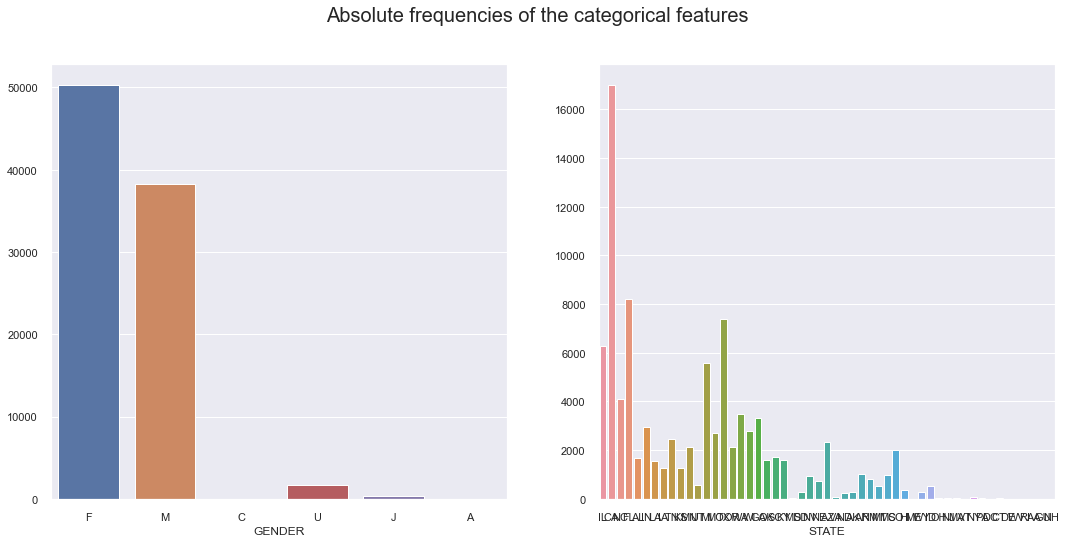

In [82]:
sns.set()

# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

# plot data
sns.countplot(x="GENDER", data=demographic, ax=ax1)
sns.countplot(x="STATE", data=demographic, ax=ax2)

# layout
ax1.set_ylabel("")
ax2.set_ylabel("")

plt.suptitle("Absolute frequencies of the categorical features", fontsize=20)

plt.show()

In [83]:
#fazer correlação

### 2.10) Feature Engeneering

Splitting the US States, into the four principal and most populated regions, so that it is easier to interpret after the clustering.
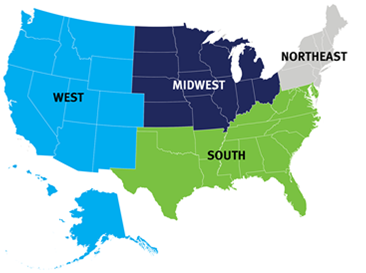

In [84]:
demographic["REGION"]=demographic.STATE.replace(['HI','AK','CO','WY','MT','AZ','UT','ID','CA','NV','OR','WA'],'West')
demographic.REGION.replace(['TX','OK','AR','LA','MS','TN','KY','WV','VA','DE','MD','DC','NC','SC','GA','FL','AL'],'South',inplace=True)
demographic.REGION.replace(['KS','NE','SD','ND','MO','IA','MN','IL','WI','IN','OH','MI'],'MidWest',inplace=True)
demographic.REGION.replace(['PA','NJ','CT','RI','MA','NY','VT','NH','ME'],'NorthEast',inplace=True)

Dropping all the Locations that are defined as States, but are in fact autonomous regions of the USA.

In [85]:
demographic["REGION"].unique()

array(['MidWest', 'West', 'South', 'NM', 'NorthEast', 'AA', 'GU'],
      dtype=object)

In [86]:
demographic.REGION.replace(['NM','AA' ],np.nan,inplace=True)

Creating a variable AGE, that is calculated from the DOB variable, turning this variable from a categorical feature to a numerical feature.

In [87]:
demographic["DOB"]=demographic['DOB'].str.split("-",expand=True)
demographic["DOB"] = pd.to_numeric(demographic["DOB"],downcast='integer')
demographic["AGE"]= datetime.now().year - demographic["DOB"]

In [88]:
demographic.GENDER.replace(['C','U','J','A'],'other',inplace=True)

In [89]:
demographic.GENDER.unique()

array(['F', 'M', nan, 'other'], dtype=object)

In [90]:
demographic.drop(["DOB","STATE"],axis=1,inplace=True)

### 2.11.1) Redo Data Imputation

Firstly, we did some simple data imputation using modes, in order to remove the majority of the outliers. Now that we have our variables selected it is possible to do a more detailed data imputation for the metric features, using, for instance KNN Imputer, and using modes for the non-metric features.

In [91]:
value.isna().sum()

RAMNTALL        0
NGIFTALL        0
MINRAMNT        0
MAXRAMNT        0
TIMELAG      9752
AVGGIFT         0
NUMPROM         0
CARDPM12        0
NUMPRM12        0
MAJOR           0
HIT             0
WEALTH1     43457
IC4             0
HHAS1           0
HHAS2           0
HHAS3           0
HHAS4           0
INCOME      20526
HV2             0
HV4             0
dtype: int64

In [92]:
imputer = KNNImputer(n_neighbors=8)
metric_features = value.columns.to_list()
value[metric_features] = imputer.fit_transform(value[metric_features])

In [93]:
value.isna().sum()

RAMNTALL    0
NGIFTALL    0
MINRAMNT    0
MAXRAMNT    0
TIMELAG     0
AVGGIFT     0
NUMPROM     0
CARDPM12    0
NUMPRM12    0
MAJOR       0
HIT         0
WEALTH1     0
IC4         0
HHAS1       0
HHAS2       0
HHAS3       0
HHAS4       0
INCOME      0
HV2         0
HV4         0
dtype: int64

In [94]:
demographic.isna().sum()

GENDER      2838
POBC1          0
POBC2          0
POP902         0
POP90C1        0
POP90C2        0
POP90C3        0
POP90C4        0
POP90C5        0
AGE901         0
SEC1           0
SEC2           0
SEC3           0
SEC5           0
LSC1           0
LSC3           0
LSC4           0
MARR1          0
MARR2          0
MARR4          0
REGION       833
AGE        23127
dtype: int64

In [95]:
non_metric_features=demographic.select_dtypes('object').columns.to_list()
metric_features = demographic.columns.drop(non_metric_features).to_list()
modes = demographic[non_metric_features].mode().loc[0]
demographic.fillna(modes, inplace=True)
demographic[metric_features] = imputer.fit_transform(demographic[metric_features])

In [96]:
demographic.isna().sum()

GENDER     0
POBC1      0
POBC2      0
POP902     0
POP90C1    0
POP90C2    0
POP90C3    0
POP90C4    0
POP90C5    0
AGE901     0
SEC1       0
SEC2       0
SEC3       0
SEC5       0
LSC1       0
LSC3       0
LSC4       0
MARR1      0
MARR2      0
MARR4      0
REGION     0
AGE        0
dtype: int64

In [97]:
overall=pd.merge(value,demographic,left_index=True,right_index=True)
overall.reset_index(inplace=True)

In [98]:
# Updating metric and non metric features
non_metric_features = overall.select_dtypes(include="object").columns.to_list()
metric_features = overall.select_dtypes(include=["float64"]).columns.to_list()

### 2.11.2) Redo Outlier Removal

In [99]:
out=overall.copy()

#### Minimum Covariance Determinant

In [101]:
ee = EllipticEnvelope(contamination=0.019)
ee_df = ee.fit_predict(out[metric_features])

In [102]:
mask_out =ee_df == -1
outliers_mcd=out[mask_out]
out.drop(outliers_mcd.index,inplace=True)

In [103]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(out.shape[0] / data_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 3.913 %


In [104]:
overall=out.copy()

In [105]:
value = overall.loc[:,["RAMNTALL","NGIFTALL","MINRAMNT","MAXRAMNT","TIMELAG","AVGGIFT","NUMPROM","CARDPM12","NUMPRM12","MAJOR","HIT","WEALTH1","IC4","HHAS1","HHAS2","HHAS3","HHAS4","INCOME","HV2","HV4"]]

In [106]:
demographic = overall.loc[:,["REGION","GENDER","AGE","POBC1","POBC2","POP902","POP90C1","POP90C2","POP90C3","POP90C4","POP90C5","AGE901","SEC1","SEC2","SEC3","SEC5","LSC1","LSC3","LSC4","MARR1","MARR2","MARR4"]]

### One Hot Encoder

In [107]:
df_ohc = demographic.copy()
categorical=demographic.select_dtypes(include="object").columns.to_list()
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc[categorical])
ohc_feat_names = ohc.get_feature_names(categorical)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_ohc = pd.concat([ohc_df,df_ohc.drop(columns=categorical)], axis=1)
demographic=df_ohc.copy()

### 2.12) Data Standardization 

In [108]:
standard_value=pd.DataFrame(StandardScaler().fit(value).transform(value),index=value.index, columns=value.columns)

<div class="alert alert-block alert-success">

## 3) Clustering
    
</div>

In [109]:
def plotKElbow(cluster,data,metric):
    visualizer = KElbowVisualizer(cluster, k=(2,12), metric=metric, timings=False,locate_elbowbool=True)
    visualizer.fit(data)        
    visualizer.show()   
    

In [110]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [111]:
def kmeans_cluster(df,n_clust):
    kmclust = KMeans(n_clusters=n_clust, init='k-means++', n_init=15, random_state=1)
    df_labels = kmclust.fit_predict(df)
    return df_labels


In [112]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        #ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [169]:
def cluster_single_profile(df, label_columns, figsize, compar_titles=None):
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=1, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [113]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [114]:
def avg_silhouette(min_range,max_range,df,cluster):
    avg_silhouette = []
    for nclus in range(min_range,max_range):
        # Skip nclus == 1
        if nclus == 1:
            continue
    
        # Create a figure
        fig = plt.figure(figsize=(10,5 ))

        if "n_clusters" in cluster.get_params():
            param = "n_clusters"
        else:
            param = "n_components"
        
        
        # Get the cluster labels by applying a given clustering algorithm
        clustering = cluster.set_params(**{param:nclus})
        cluster_labels = clustering.fit_predict(df)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(df, cluster_labels)
        avg_silhouette.append(silhouette_avg)
        print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
            color = cm.nipy_spectral(float(i) / nclus)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("The silhouette plot for the various clusters.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label") 

    # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
        xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
        plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        plt.ylim([0, len(df) + (nclus + 1) * 10])

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks(np.arange(xmin, xmax, 0.1))

In [115]:
def gmm_cluster(data, nclust):
    gmm=GaussianMixture(n_components=nclust, init_params='kmeans', random_state=0)
    gmm.fit(data)
    clust_labels = gmm.predict(data)
    return(clust_labels)

### Select the best features

### Value

In [116]:
cluster = KMeans(random_state=0)


C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


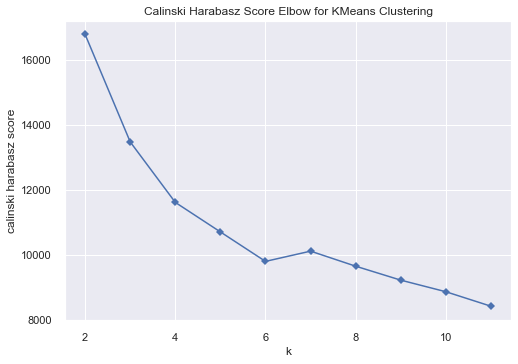

findfont: Matching STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 1.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXNonUnicode' (S

findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal black normal>) = 10.525
findfont: score(<Font 'Centaur' (

findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (palab

findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Guttman Miryam' (MIRL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) n

findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Sego

findfont: score(<Font 'Calibri' (calibril.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'InputMapperIcons' (InputMapperIcons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Vilna' (VILNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal normal light normal>) = 10.24

findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal medium normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Yu Gothic' (YuG

findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (times.ttf) 

findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Yad' (GYADL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (

findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Hatzvi' (TZVIB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Haim-Condensed' (GHAIMC.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal black normal>) = 11.525
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 norm

findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal regular normal>) = 11.05
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'TeamViewer10' (teamviewer10.otf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 11.05
findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal bold normal>) = 11.335
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal regular normal>) = 11.05
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Myamfix' (GMYAMFIX.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 11.05
findfont: score

findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 11.535
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal light normal>) = 11.24
findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal bold normal>) = 11.335
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Gutt

findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal light normal>) = 11.24
findfont: score(<Font 'Guttman Haim-Condensed' (GHAIMC.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Guttman Haim' (GHAIM.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Maiandra GD' (MAIAN.

findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal black normal>) = 10.525
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal black normal>) = 11.525
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Mantova' (MANTM.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal

findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal light normal>) = 11.24
findfont: score(<Font 'Hadassah Friedlaender' (HADASAH.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal medium condensed>) = 11.344999999999999
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 11.05
findfont: s

findfont: score(<Font 'Guttman-CourMir' (MIRFX.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 11.335
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal light normal>) = 11.24
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal semibold normal>) = 10.24
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 10.535
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal semibold normal>) = 10.24
findfont: score(<Font 'Microsoft YaHei' 

findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Rashi' (RASHIB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal semibold normal>) = 11.24
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 11.24
findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Parchment' (PARCHM.TT

findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 0.33499999999999996
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.335
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 1.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 11.05
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal light normal>) = 11.525
findfont: score(<Font 'Guttman Mantova' (MANTM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.05
findf

findfont: score(<Font 'Guttman Haim' (GHAIM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Aharoni' (GAHROM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) norma

findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal medium condensed>) = 10.44
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'MT Extra' (mtextra.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal black normal>) = 10.24
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 7

findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.25
findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Guttman Mantova' (MANTB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.535
findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.05
findfont: score

findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal semibold normal>) = 10.145
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.25
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal regular normal>) = 10.335
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.525
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal black normal>) = 10.24
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Leelawadee

findfont: score(<Font 'Guttman-CourMir' (MIRFX.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.335
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal bold normal>) = 10.0
findfont: score(<Font 'Guttman Miryam' (MIRB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanai.ttf) it

findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal regular normal>) = 10.335
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'French Script MT' (FRSCRIPT

findfont: score(<Font 'Guttman Yad' (GYADL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.335
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.25
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Drogolin' (DROGM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal bold condensed>) = 10.2
findfont

findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 1.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGene

findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal black normal>) = 10.525
findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 no

findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal black normal>) = 11.525
findfont: score(<Font 'Lucida Sans Unicode' 

findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ariali.ttf) italic norma

findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf

findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Vilna' (VILNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Hadassah Friedlaender' (HADASAHB.TTF) normal normal 700 normal>) = 10.335
findfon

findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal medium normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) 

findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Guttman Frank' (GFRANK.TTF) norma

findfont: score(<Font 'Guttman Yad' (GYADL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cali

findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Haim-Condensed' (GHAIMC.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal black normal>) = 11.525
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.T

findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 11.05
findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal bold normal>) = 11.335
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal regular normal>) = 11.05
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Myamfix' (GMYAMFIX.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Geor

findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal light normal>) = 11.24
findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal bold normal>) = 11.335
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Mantova-Decor' (MANTDEC.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Kav'

findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (georgiab.ttf) normal norm

findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal black normal>) = 11.525
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Mantova' (MANTM.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Aharoni' (GAHROM.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 

findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal medium condensed>) = 11.344999999999999
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal bold condensed>) = 11.535
findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB

findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal light normal>) = 11.24
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal semibold normal>) = 10.24
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Felix Titling' (FE

findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 1.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic norm

findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.335
findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.525
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal bold normal>) = 10.0
findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.525
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Century' (CENT

findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.335
findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Vilna' (VILNA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal light normal>) = 10.525
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Ebrima' (ebrimabd.ttf) no

findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.335
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.24
findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal medium normal>) = 10.24
findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbell.ttf) normal normal light normal>) = 10.525
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft PhagsPa' (phagspa

findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Stam1' (STAM1.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Hatzvi' (TZVIB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>) = 10.145
findfont: score(<Font 'Guttman Kav-Light' (GKAVLIT.TTF) normal normal light normal>) = 10.525
findfont: score(<Font 'Blackadder IT

findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>) = 10.145
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal black normal>) = 10.525
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Guttman Haim' (GHAIM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 

findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Rashi' (RASHIB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal medium condensed>) = 10.344999999999999
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score

findfont: score(<Font 'Arial' (ariblk.ttf) normal normal black normal>) = 10.525
findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal heavy normal>) = 10.43
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Showcard Go

findfont: score(<Font 'Guttman Frnew' (FRNEW.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal black normal>) = 11.525
findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 11.145
findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal semibold normal>) = 10.24
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (Yu

findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal roman normal>) = 10.145
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-CourMir' (MIRFX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell Extra

findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal

findfont: score(<Font 'Guttman Miryam' (MIRL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic norma

findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Century Gothic'

findfont: score(<Font 'InputMapperIcons' (InputMapperIcons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Vilna' (VILNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: 

findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal medium normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Harrington' (H

findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'TeamViewer10' (teamviewer10.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Myamfix' (GMYAMFIX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Fo

findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Mantova-Decor' (MANTDEC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calib

findfont: score(<Font 'Guttman Haim' (GHAIM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 norm

findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal black normal>) = 10.525
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Mantova' (MANTM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Aharoni' (GAHROM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 7

findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal medium condensed>) = 10.344999999999999
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal bol

findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal semibold normal>) = 11.24
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal semibold normal>) = 11.24
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Kav-Light' (GKAVLIT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Lucida Sans' 

findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav' (GKAVMED.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nirmala UI' (N

findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'TeamViewer10' (teamviewer10.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal black normal>) = 10.525
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Co

findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal demi condensed>) = 10.44
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal demi normal>) = 11.24
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Sitk

findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal black normal>) = 10.525
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Leelawadee UI' (LeelUIsl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal black normal>) = 11.525
findfo

findfont: score(<Font 'Guttman Kav-Light' (GKAVLIT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal demi normal>) = 11.24
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (arialbi.tt

findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (times.ttf) norm

findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal norma

findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Hadassah Friedlaender' (HADASAHB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Stam' (STAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Stencil' (STE

findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal n

findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Guttman Frank' (GFRANK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Courier New'

findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Stam1' (STAM1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Hatzvi' (TZVIB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Guttman Kav-Light' (GKAVLIT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Blackadder ITC' 

findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Hadassah Friedlaender' (HADASAHB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Stam' (STAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF)

findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal no

findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Guttman Frank' (GFRANK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) i

findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (CO

findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'InputMapperIcons' (InputMapperIcons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal demi condensed>) = 10.44
findfont: s

findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>) = 10.145
findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Guttman Vilna' (VILNAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font

findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbell.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Tw Cen 

findfont: score(<Font 'Guttman Myamfix' (GMYAMFIX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB

findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 n

findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) no

findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic 

findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Guttman Frank' (GFRANK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF)

findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Calist

findfont: score(<Font 'Guttman Haim-Condensed' (GHAIMC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal black normal>) = 10.525
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font

findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Myamfix' (GMYAMFIX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Imprint MT Sh

findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Mantova-Decor' (MANTDEC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav' (GKAVMED.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Frank' (GFRANK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Marlett' (marlett.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 11.145
findfont: score(<Font 'Britan

findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Guttman Kav' (GKAVBLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbi

findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Mantova' (MANTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Frnew' (FRNEW.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Guttman Stam' (STAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constanti

findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comic

findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Vilna' (VILNAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal n

findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Hadassah Friedlaender' (HADASAH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 

findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal black normal>) = 10.525
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' 

findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Myamfix' (GMYAMFIX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNTI

findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Mantova-Decor' (MANTDEC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav' (GKAVMED.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Freestyle Script' (F

findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'TeamViewer10' (teamviewer10.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal black normal>) = 10.525
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal n

findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Aharoni' (GAHROM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gigi' (GIGI.TTF) normal n

findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' 

findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wide Latin' (LATIN

findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Guttman Miryam' (MIRL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.t

findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
findfont: score

findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Hatzvi' (TZVIM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'InputMapperIcons' (InputMapperIcons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman 

findfont: score(<Font 'Book Antiqua' (BKANT.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Guttman-A

findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wide Latin' (LATIN

findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Guttman Miryam' (MIRL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.t

findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
findfont: score

findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Hatzvi' (TZVIM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'InputMapperIcons' (InputMapperIcons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman 

findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal medium normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicz.

findfont: score(<Font 'Guttman Rashi' (RASHIB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal medium condensed>) = 11.344999999999999
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'MT Extra' (mtextra.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell' (ROCKBI.

findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal heavy normal>) = 11.43
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 11.535
findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 11.25
findfont: s

findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal bold condensed>) = 11.535
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal black normal>) = 10.525
findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 10.145
findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal semibold normal>) = 11.24
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 11.535
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal regular normal>) = 11.05
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 11.24
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal black normal>) = 11.525
findfont: score

findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal roman normal>) = 11.145
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman-CourMir' (MIRFX.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 11.05
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal bold normal>) = 11.335
findfont: score(<Font 'Guttman Miryam' (MIRB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Magneto' (MAG

findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 10.25
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal regular normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF)

findfont: score(<Font 'Guttman Aharoni' (GAHROM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Guttman Mantova' (MANTB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal light normal>) = 10.525
findfont: score(<Font 'Lucida

findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal black normal>) = 10.24
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Guttman Miryam' (MIRL.TTF) normal normal light normal>) = 10.525
findfont: score(<Font 'Guttman Hatzvi' (TZVIM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 no

findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Guttman Mantova' (MANTB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.535
findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal bold normal>) = 10.0
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft JhengHei'

findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.525
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal black normal>) = 10.24
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Guttman Stam1' (STAM1.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal 700 normal>) = 11.05
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.335
findfont: score(<F

findfont: score(<Font 'Guttman Miryam' (MIRB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal bold normal>) = 10.0
findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal book normal>) = 10.335
findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>) = 10.24
findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Candara' (Candar

findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal bold normal>) = 10.0
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Georgia' 

findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Drogolin' (DROGM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal bold condensed>) = 10.2
findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Guttman Myamfix' (GMYAMFIX.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Cambria' 

findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 1.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex1

findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal black normal>) = 10.525
findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal bold

findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal black normal>) = 11.525
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Vilna' (VI

findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (times.ttf) norm

findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Guttman Miryam' (MIRL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaral.ttf) 

findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: scor

findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Hatzvi' (TZVIM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal heavy normal>) = 11.43
findfont: score(<Font 'InputMapperIcons' (InputMapperIcons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Sty

findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (Y

findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Outlook' (OUT

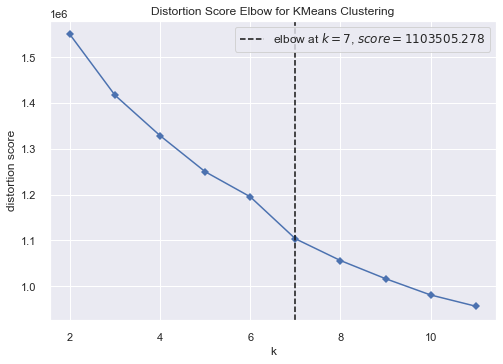

In [117]:
plotKElbow(cluster,standard_value,'calinski_harabasz')
plotKElbow(cluster,standard_value,'distortion')

In [118]:
value['value_labels']=kmeans_cluster(value,3)

In [119]:
# Preparing the data
X = value.drop(columns='value_labels')
y = value.value_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = RandomForestClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 96.50% of the customers correctly


In [120]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

RAMNTALL    0.000012
NGIFTALL    0.000029
MINRAMNT    0.000229
MAXRAMNT    0.000259
TIMELAG     0.000003
AVGGIFT     0.001133
NUMPROM     0.000014
CARDPM12    0.000020
NUMPRM12    0.000014
MAJOR       0.000000
HIT         0.000166
WEALTH1     0.054511
IC4         0.148447
HHAS1       0.007796
HHAS2       0.004210
HHAS3       0.036721
HHAS4       0.016623
INCOME      0.026156
HV2         0.493607
HV4         0.210049
dtype: float64

In [121]:
value=value[['RAMNTALL','NGIFTALL','MAXRAMNT','MINRAMNT','TIMELAG','NUMPROM','CARDPM12','NUMPRM12','MAJOR','HIT']].copy()

### Demographic

In [122]:
standard_demographic=pd.DataFrame(StandardScaler().fit(demographic).transform(demographic),index=demographic.index, columns=demographic.columns)

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


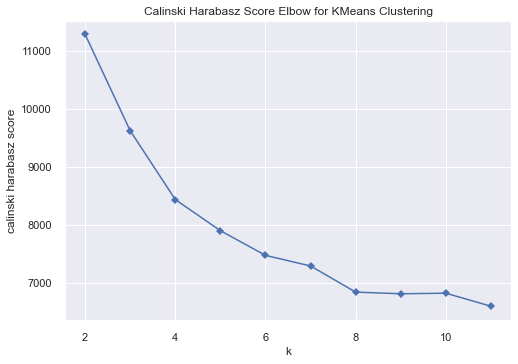

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


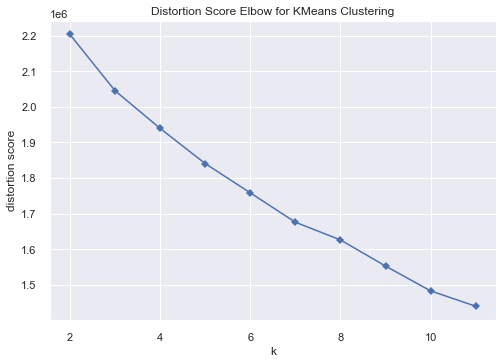

In [123]:
plotKElbow(cluster,standard_demographic,'calinski_harabasz')
plotKElbow(cluster,standard_demographic,'distortion')

In [124]:
demographic['demographic_labels']=kmeans_cluster(demographic,4)

In [125]:
# Preparing the data
X = demographic.drop(columns='demographic_labels')
y = demographic.demographic_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = RandomForestClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 91.61% of the customers correctly


In [126]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

REGION_MidWest      0.002950
REGION_NorthEast    0.000000
REGION_South        0.022252
REGION_West         0.000000
GENDER_F            0.000000
GENDER_M            0.000000
GENDER_other        0.000000
AGE                 0.000838
POBC1               0.002625
POBC2               0.009931
POP902              0.585377
POP90C1             0.066062
POP90C2             0.055989
POP90C3             0.127312
POP90C4             0.011282
POP90C5             0.005934
AGE901              0.004120
SEC1                0.003875
SEC2                0.010681
SEC3                0.028130
SEC5                0.004056
LSC1                0.003133
LSC3                0.003063
LSC4                0.012023
MARR1               0.019401
MARR2               0.017437
MARR4               0.003526
dtype: float64

In [127]:
categorical=['REGION_MidWest','REGION_NorthEast','REGION_South','REGION_West','GENDER_F','GENDER_M','GENDER_other']

In [128]:
demographic=demographic.loc[:,['REGION_MidWest','REGION_NorthEast','REGION_South','REGION_West',
                        'GENDER_F','GENDER_M','GENDER_other','AGE','MARR1','MARR2','POP902','POP90C4','POP90C5','SEC3','LSC4']]

### All Data Segmentation: Overall

#### K-means

In [152]:
overall=pd.merge(value,demographic.drop(categorical,axis=1),left_index=True,right_index=True)
overall.reset_index(inplace=True)

In [153]:
standard_overall=pd.DataFrame(StandardScaler().fit(overall).transform(overall),index=overall.index, columns=overall.columns)

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


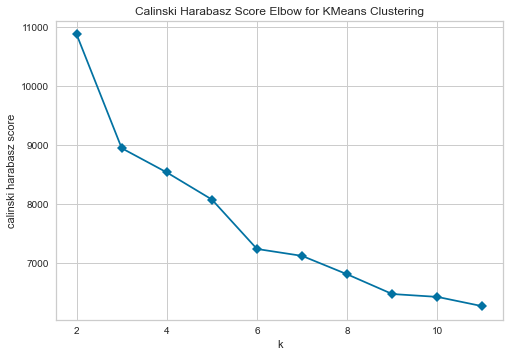

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


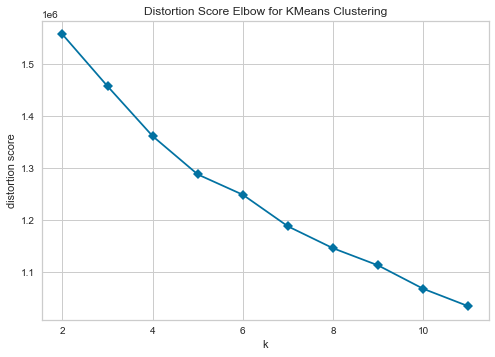

In [140]:
plotKElbow(cluster,standard_overall,'calinski_harabasz')
plotKElbow(cluster,standard_overall,'distortion')

For n_clusters = 2, the average silhouette_score is : 0.11761923735893715
For n_clusters = 3, the average silhouette_score is : 0.10293952763819869
For n_clusters = 4, the average silhouette_score is : 0.10544494643005262
For n_clusters = 5, the average silhouette_score is : 0.1118336213927354


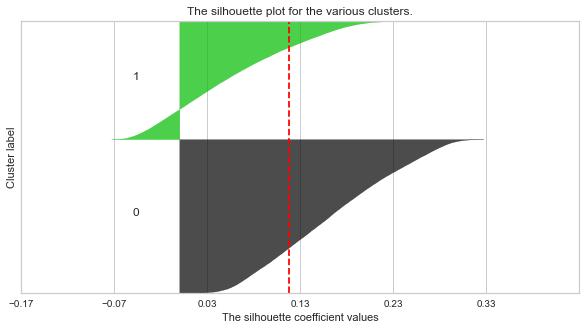

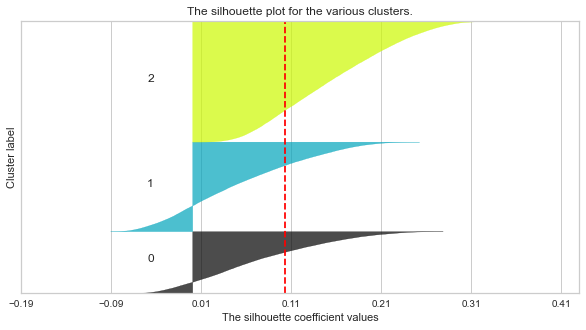

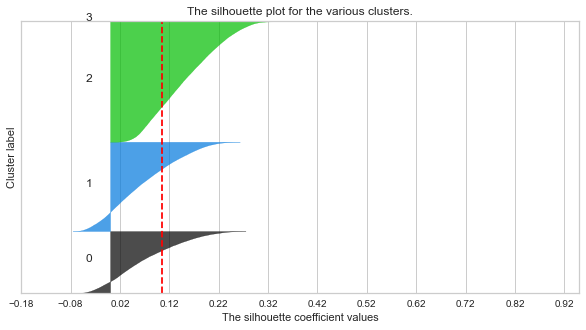

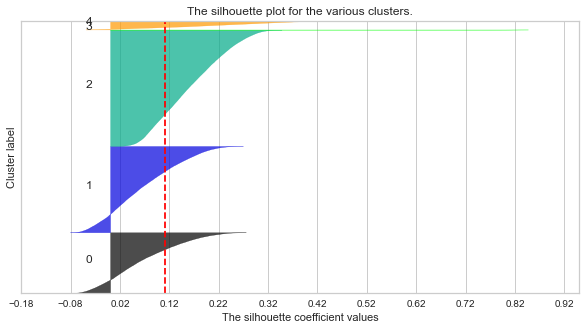

In [143]:
avg_silhouette(2,6,standard_overall.sample(frac=0.60),cluster)

In [154]:
standard_overall['k_means_overall_label']=kmeans_cluster(standard_overall,3)

### GMM

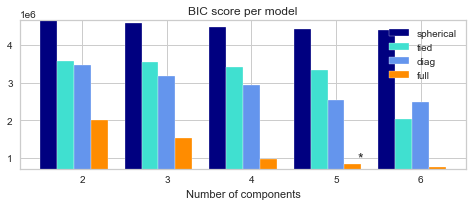

In [147]:
#ver link sklearn 
lowest_bic = np.infty
bic = []
n_components_range = range(2, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(standard_overall.drop('k_means_overall_label',axis=1))
        bic.append(gmm.bic(standard_overall.drop('k_means_overall_label',axis=1)))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [ ]:
# Selecting number of components based on AIC and BIC
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(standard_overall.drop('k_means_overall_label',axis=1))
          for n in n_components_range]

bic_values = [m.bic(standard_overall.drop('k_means_overall_label',axis=1)) for m in models]
aic_values = [m.aic(standard_overall.drop('k_means_overall_label',axis=1)) for m in models]
plt.plot(n_components_range, bic_values, label='BIC')
plt.plot(n_components_range, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components_range)
plt.show()

In [156]:
gmm = GaussianMixture(init_params='kmeans', random_state=0)

For n_clusters = 2, the average silhouette_score is : 0.2694259280518094
For n_clusters = 3, the average silhouette_score is : 0.1987780290370272
For n_clusters = 4, the average silhouette_score is : 0.01938306119989156
For n_clusters = 5, the average silhouette_score is : 0.01096478060870149


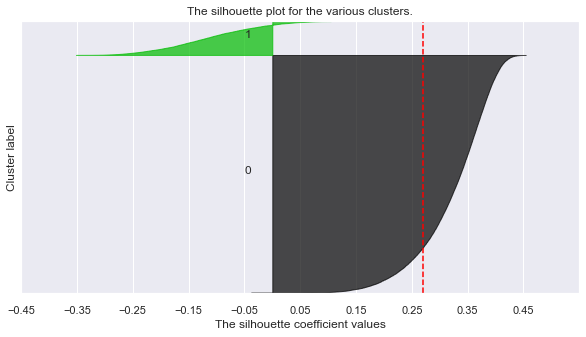

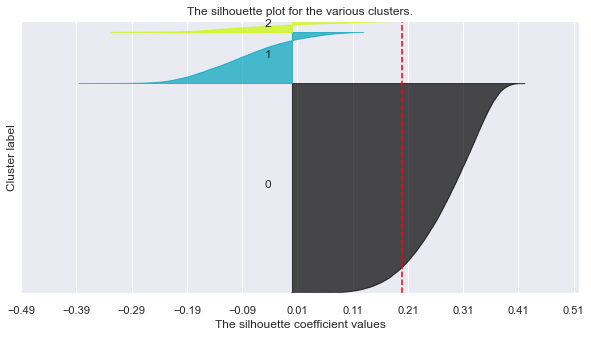

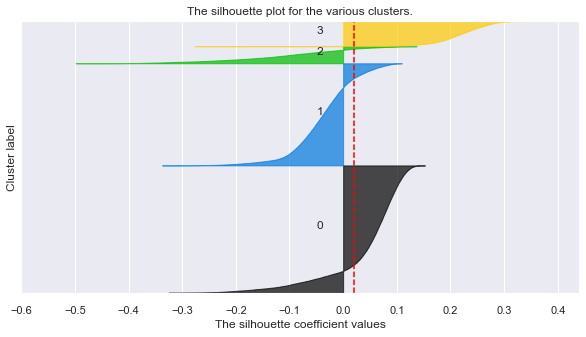

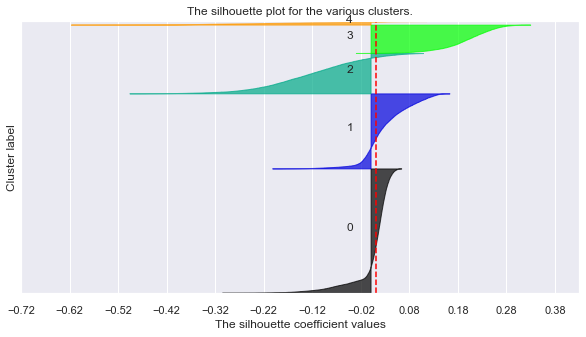

In [157]:
avg_silhouette(2,6,standard_overall.drop('k_means_overall_label',axis=1).sample(frac=0.6),gmm)

In [138]:
standard_overall['gmm_overall_label']=gmm_cluster(standard_overall, 3)

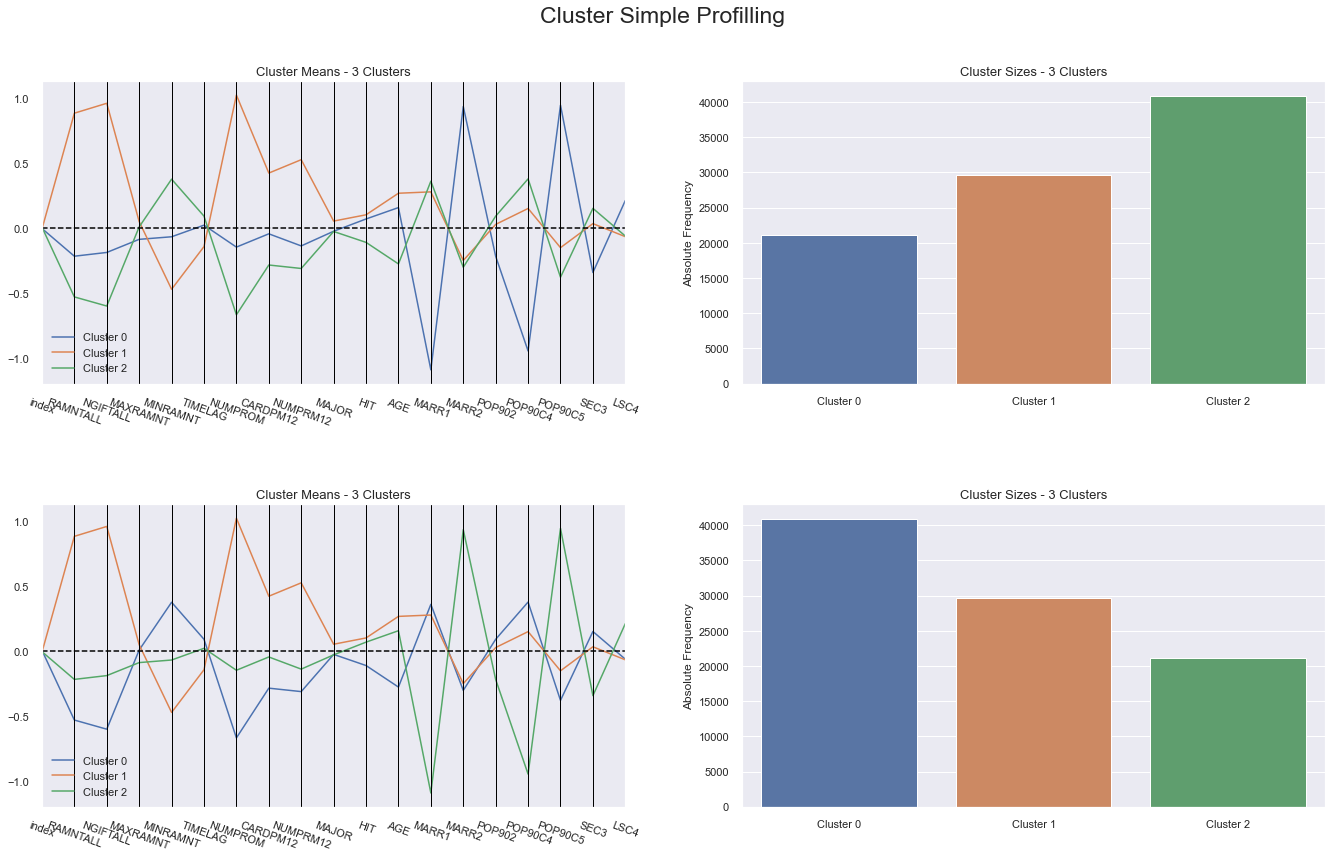

In [139]:
cluster_profiles(standard_overall, ["k_means_overall_label", "gmm_overall_label"], figsize=(23, 13), compar_titles=["K-Means - All Data", "GMM - All Data"])

### Segmentation

### Value

In [130]:
standard_value=pd.DataFrame(StandardScaler().fit(value).transform(value),index=value.index, columns=value.columns)

#### K-Means + Hierarchical Clustering (HC)

In [142]:
kmeans_hc_labels = kmeans_cluster(value,30)
kmeans_hc_clusters = standard_value.copy()
kmeans_hc_clusters["kmeans_hc_labels"] = kmeans_hc_labels

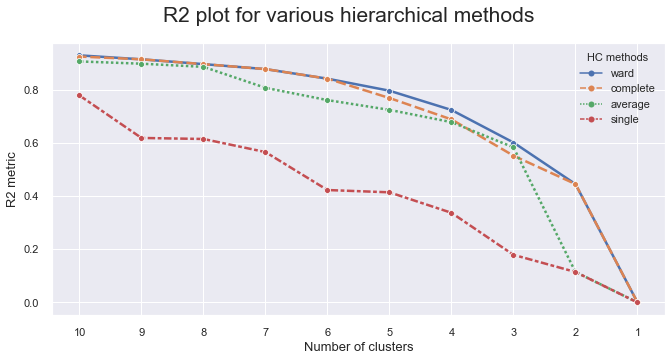

In [143]:
kmeans_hc_clusters = kmeans_hc_clusters.groupby("kmeans_hc_labels").mean()
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=kmeans_hc_clusters, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [144]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclabel=hclust.fit_predict(kmeans_hc_clusters)

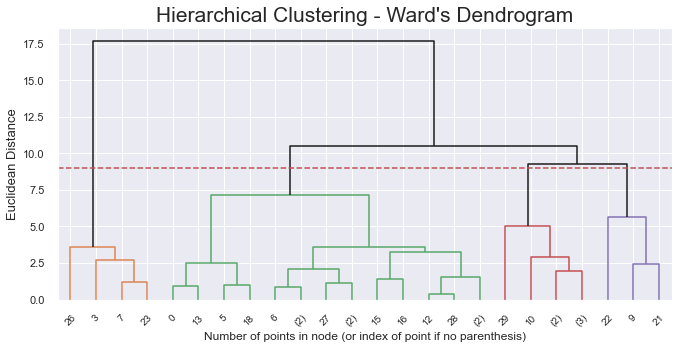

In [145]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 9
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

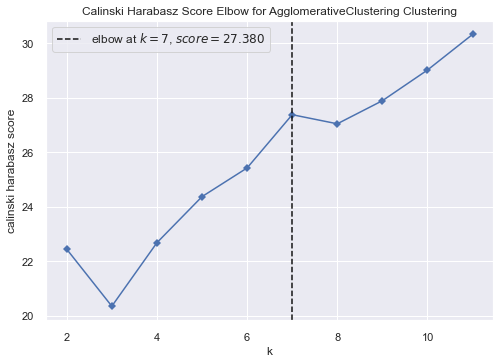

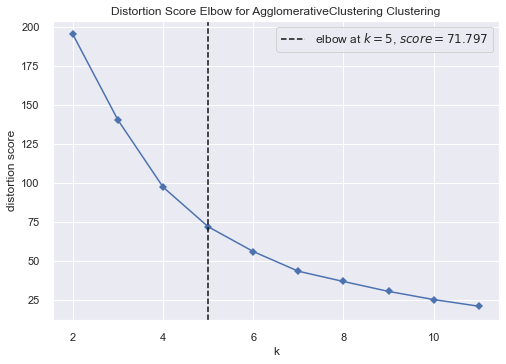

In [146]:
Hclustering = AgglomerativeClustering(linkage=linkage)
plotKElbow(Hclustering,kmeans_hc_clusters,'calinski_harabasz')
plotKElbow(Hclustering,kmeans_hc_clusters,'distortion')

For n_clusters = 2, the average silhouette_score is : 0.5029105149662987
For n_clusters = 3, the average silhouette_score is : 0.3046502165972484
For n_clusters = 4, the average silhouette_score is : 0.322650737600052
For n_clusters = 5, the average silhouette_score is : 0.29208599343756764


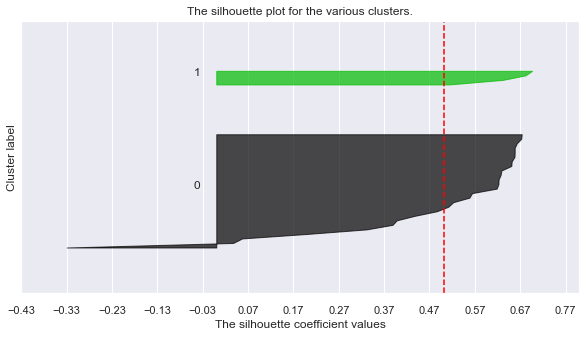

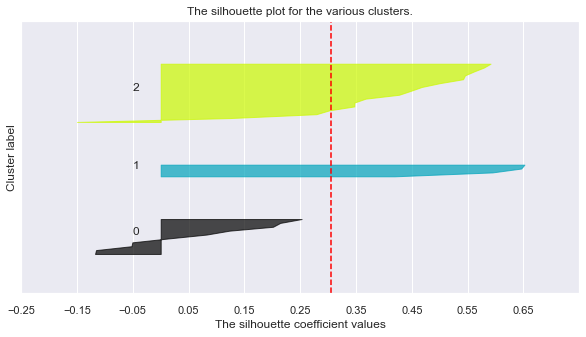

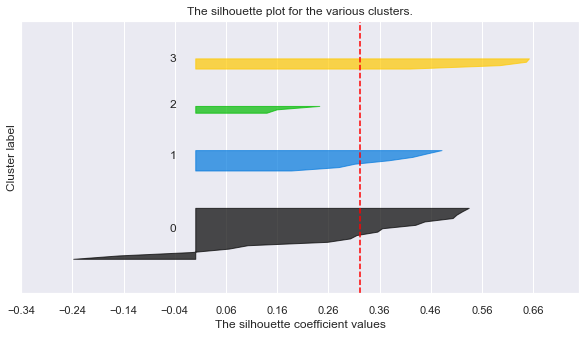

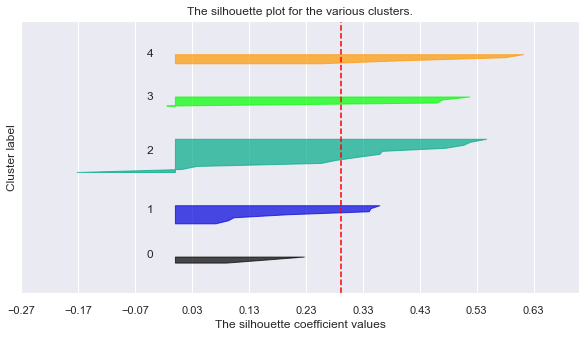

In [147]:
avg_silhouette(2,6,kmeans_hc_clusters,Hclustering)

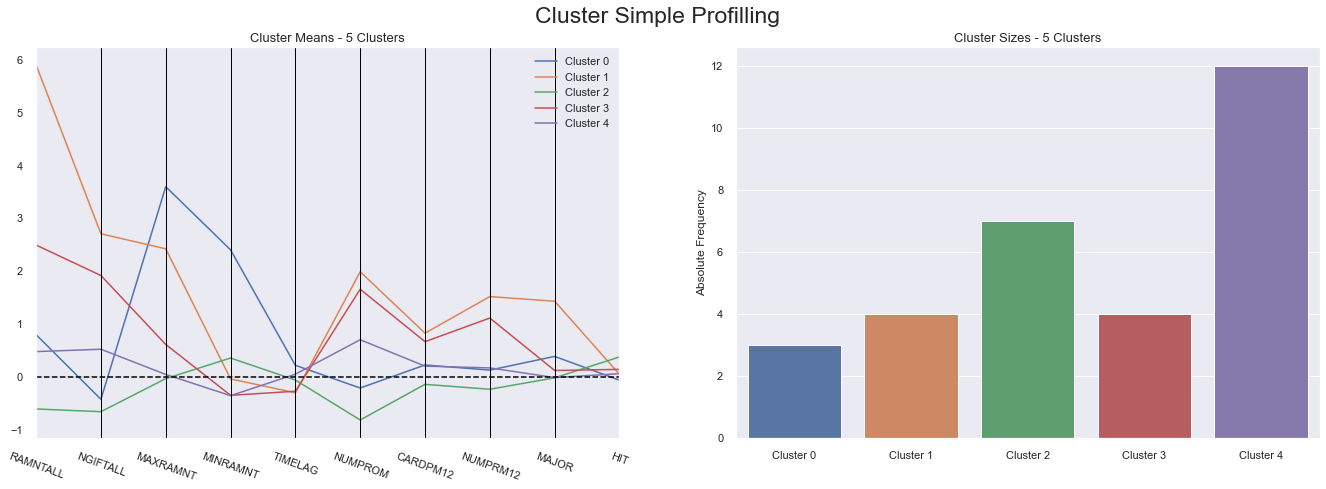

In [153]:
# Hierarchical Clustering with sklearn
hc = AgglomerativeClustering(n_clusters=5, linkage=linkage)
labels = hc.fit_predict(kmeans_hc_clusters)

# Getting the HC labels for each observation in the main dataframe
kmeans_hc_clusters['kmeans_hc_lables']=labels
cluster_profiles(kmeans_hc_clusters,["kmeans_hc_lables"], figsize=(23, 7),compar_titles=["K-Means + HC - Value"])

### Self-Organizing Maps (SOM) + HC

In [135]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm = sompy.SOMFactory().build(
    standard_value.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=standard_value.columns
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.373000, quantization error: 12.120916

 epoch: 2 ---> elapsed time:  0.349000, quantization error: 2.644598

 epoch: 3 ---> elapsed time:  0.376000, quantization error: 2.582911

 epoch: 4 ---> elapsed time:  0.387000, quantization error: 2.538873

 epoch: 5 ---> elapsed time:  0.377000, quantization error: 2.505181

 epoch: 6 ---> elapsed time:  0.386000, quantization error: 2.492472

 epoch: 7 ---> elapsed time:  0.386000, quantization error: 2.479494

 epoch: 8 ---> elapsed time:  0.395000, quantization error: 2.462686

 epoch: 9 ---> elapsed time:  0.432000, quantization error: 2.452237

 epoch: 10 ---> elapsed time:  0.421000, quantization error: 2.447487

 epoch: 11 ---> elapsed time:  0.410000, quantization error: 2.444108

 epoch: 12 ---> elapsed time:  0.464000, quantization error: 2.441071

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  0.363000, quantization error: 1.492627

 epoch: 15 ---> elapsed time:  0.367000, quantization error: 1.492647

 epoch: 16 ---> elapsed time:  0.380000, quantization error: 1.492660

 epoch: 17 ---> elapsed time:  0.386000, quantization error: 1.492671

 epoch: 18 ---> elapsed time:  0.358000, quantization error: 1.492683

 epoch: 19 ---> elapsed time:  0.360000, quantization error: 1.492694

 epoch: 20 ---> elapsed time:  0.374000, quantization error: 1.492701

 epoch: 21 ---> elapsed time:  0.379000, quantization error: 1.492720

 epoch: 22 ---> elapsed time:  0.361000, quantization error: 1.492727

 epoch: 23 ---> elapsed time:  0.360000, quantization error: 1.492732

 epoch: 24 ---> elapsed time:  0.357000, quantization error: 1.492730

 epoch: 25 ---> elapsed time:  0.347000, quantization error: 1.492731

 epoch: 26 ---> elapsed time:  0.356000, quantization error: 1.492728

 epoch: 27 ---> elapsed time:  0.351000, quantization error: 1.492728

 epoch

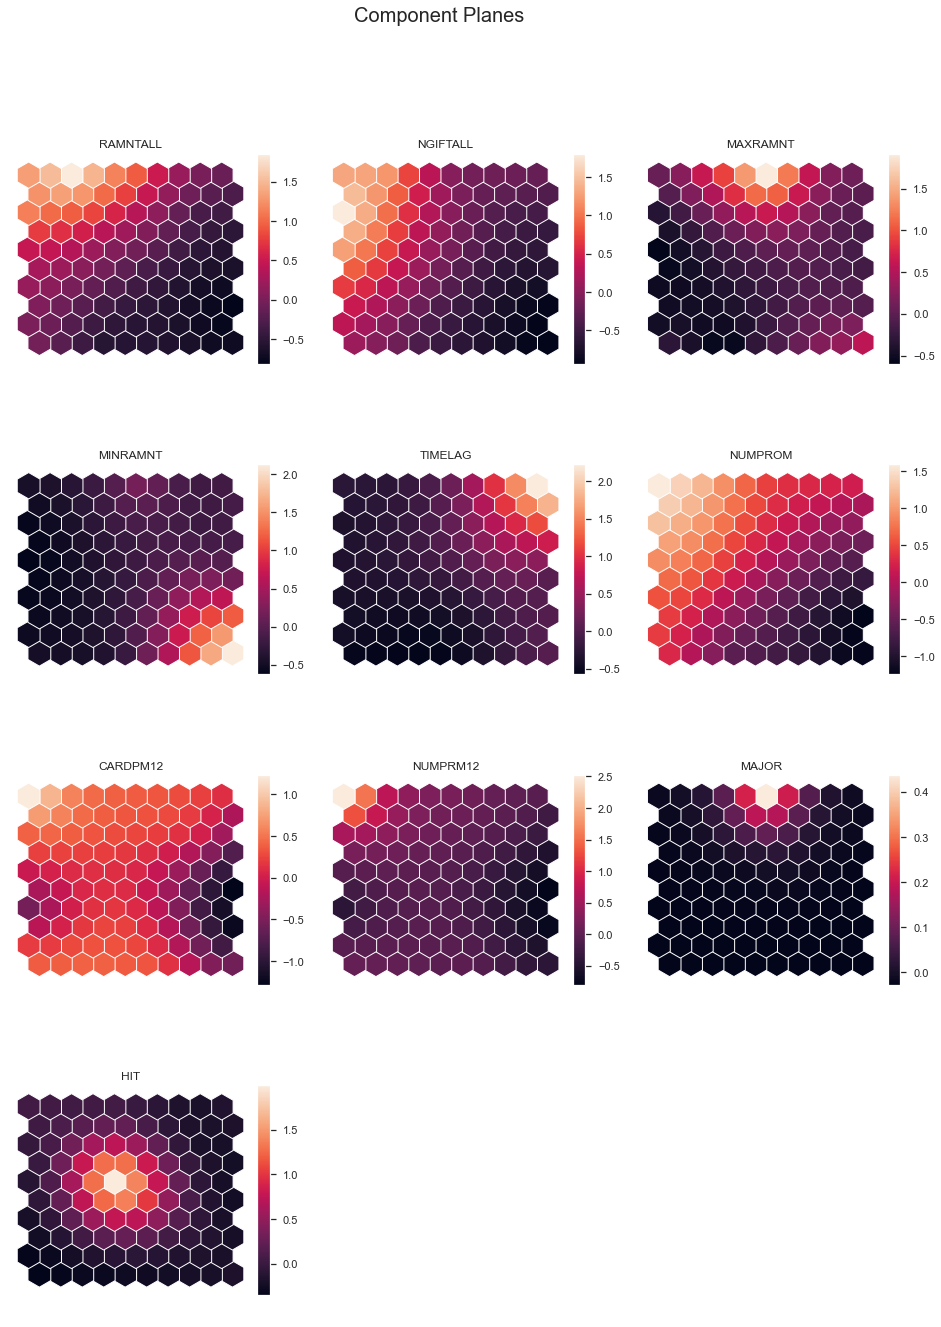

In [157]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

In [165]:
# Obtaining SOM's BMUs labels
bmus_map_hc = sm.find_bmu(standard_value)[0]  # get bmus for each observation in df

df_bmus_hc = pd.DataFrame(
    np.concatenate((standard_value, np.expand_dims(bmus_map_hc,1)), axis=1),
    index=standard_value.index, columns=np.append(standard_value.columns,"BMU")
)

In [168]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclabel=hclust.fit_predict(df_bmus_hc)

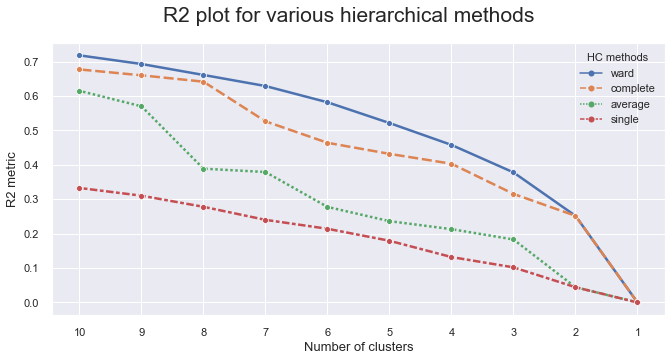

In [169]:
df_bmus_hc = df_bmus_hc.groupby("BMU").mean()
# Prepare input

hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=df_bmus_hc, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

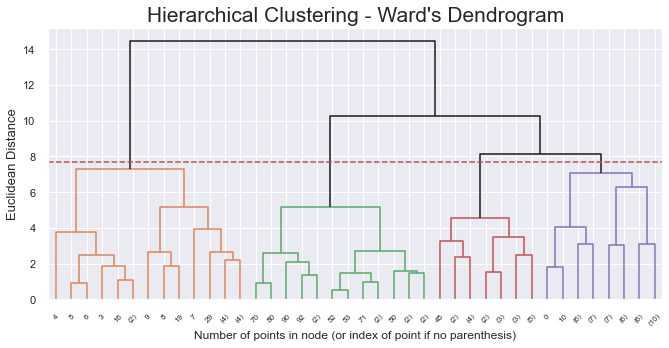

In [170]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 7.7
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


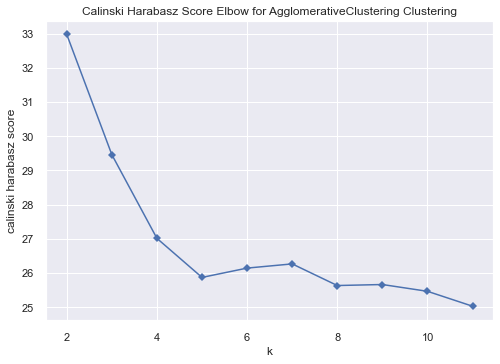

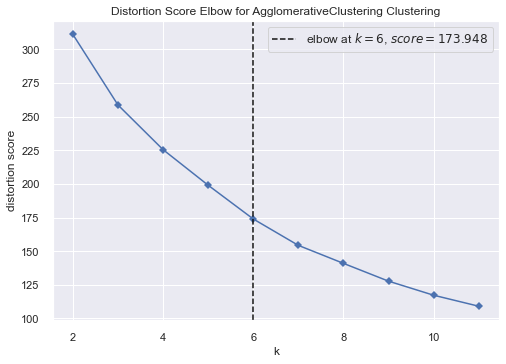

In [172]:
Hclustering = AgglomerativeClustering(linkage=linkage)
plotKElbow(Hclustering,df_bmus_hc,'calinski_harabasz')
plotKElbow(Hclustering,df_bmus_hc,'distortion')

For n_clusters = 2, the average silhouette_score is : 0.48587130473102363
For n_clusters = 3, the average silhouette_score is : 0.39438705665232543
For n_clusters = 4, the average silhouette_score is : 0.4193774663480093
For n_clusters = 5, the average silhouette_score is : 0.4061856778257455


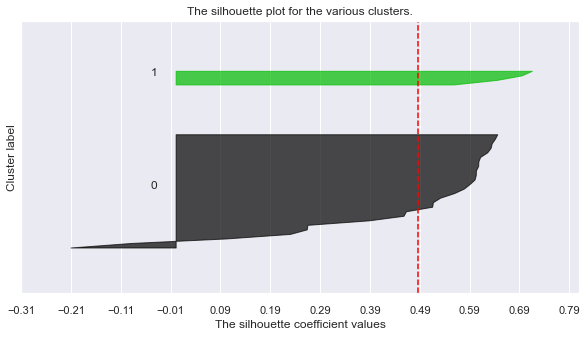

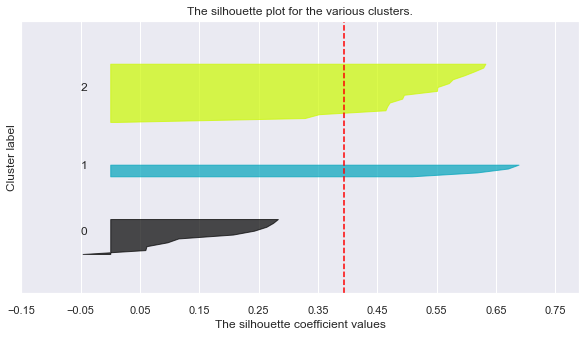

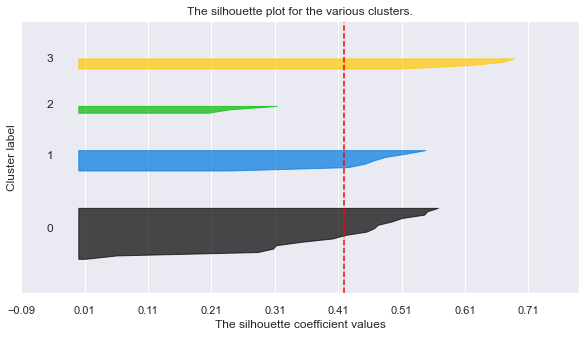

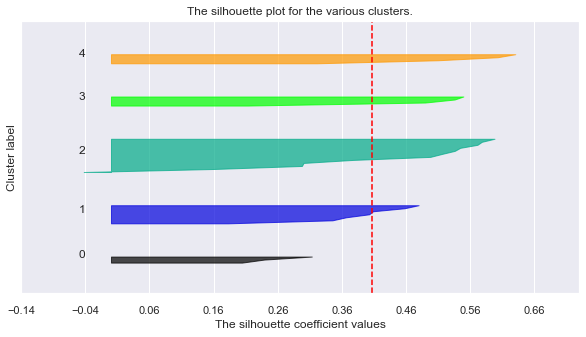

In [173]:
avg_silhouette(2,6,kmeans_hc_clusters,Hclustering)

In [175]:
# Check the nodes and and respective clusters
nodes = sm.get_node_vectors()

hc_nodes = pd.DataFrame(nodes, columns=standard_value.columns)
hc_nodes['hc_4_label'] = hc_labels

In [176]:
# Get cluster labels for each observation
som_hc_final = df_bmus_hc.merge(hc_nodes['hc_4_label'], 'left', left_on="BMU", right_index=True)
som_hc_final

RAMNTALL  NGIFTALL  MAXRAMNT  MINRAMNT   TIMELAG   NUMPROM  CARDPM12  \
BMU                                                                          
0.0  -0.015862 -0.119591  0.106974 -0.129411  3.202488  0.358605  0.302126   
1.0   0.176687  0.172809 -0.091380 -0.421126  1.573568  0.696833  0.432153   
2.0   0.385361 -0.028192  0.519621 -0.166560  1.038063  0.658731  0.461242   
3.0   0.423892 -0.352795  1.562977  0.395647  0.888957  0.298701  0.399621   
4.0   1.412563 -0.195002  3.702801  0.658965  0.118666  0.391287  0.416149   
5.0   1.610651  0.302349  1.831477 -0.052188 -0.358927  0.800734  0.313849   
6.0   1.922577  0.718475  1.170397 -0.208530 -0.236613  1.012974  0.318995   
7.0   3.425667  1.866450  1.074747 -0.346279 -0.351706  1.404470  0.423960   
8.0   2.130318  1.468090  0.487631 -0.348797 -0.107977  1.810430  1.086307   
9.0   1.263721  1.166431  0.094224 -0.429867 -0.224849  1.803913  1.724083   
10.0 -0.516632 -0.550095 -0.143139  0.012605  2.484706 -0.282349 -0.874085   
11.0 -0.446485 -0.388901 -0.216944 -0.297257  1.583309 -0.100649  0.425511   
12.0 -0.128257 -0.219141 -0.002614 -0.338331  0.901893  0.318526  0.476217   
13.0  0.086108 -0.291705  0.599589 -0.096928  0.358733  0.300421  0.508778   
14.0  0.340895 -0.273996  1.024580  0.138883 -0.320543  0.247120  0.458795   
15.0  0.734424 -0.050647  1.090357  0.119587 -0.431942  0.472204  0.373648   
16.0  0.855952  0.271402  0.624653 -0.261998 -0.320130  0.808205  0.427868   
17.0  1.272428  0.814185  0.398864 -0.422005 -0.363301  1.046996  0.471422   
18.0  1.267161  1.027531  0.183450 -0.461375 -0.191579  1.355913  0.660285   
19.0  0.712339  1.311495 -0.492672 -0.623417 -0.395987  1.533511  0.641963   
20.0 -0.490632 -0.457056 -0.222284 -0.330682  1.217188 -0.154537 -0.372621   
21.0 -0.565141 -0.536211 -0.259549 -0.341905  0.877198 -0.387607  0.505055   
22.0 -0.292054 -0.458049  0.267713 -0.213423  0.441753 -0.047771  0.472236   
23.0  0.042240 -0.291065  0.450018 -0.095509  0.128342  0.229411  0.384075   
24.0  0.284229 -0.213400  0.694229 -0.018769 -0.152782  0.415782  0.392530   
25.0  0.639199  0.111446  0.664529 -0.199773 -0.131862  0.711079  0.459163   
26.0  0.980222  0.540887  0.374666 -0.331870 -0.245167  0.939874  0.442724   
27.0  0.932292  0.798945  0.061837 -0.479839 -0.165719  1.089210  0.484984   
28.0  1.092198  1.188211 -0.090953 -0.544001 -0.380335  1.215188  0.549143   
29.0  1.559911  2.851583 -0.580922 -0.694633 -0.477768  1.440969  0.218030   
30.0 -0.595133 -0.595351 -0.210876 -0.247338  1.208080 -0.439234 -1.206223   
31.0 -0.654357 -0.654802 -0.204666 -0.306204  0.704649 -0.557715 -0.294577   
32.0 -0.377609 -0.480834  0.114066 -0.216717  0.351572 -0.077356 -0.181985   
33.0 -0.310466 -0.443657  0.137903 -0.239399  0.455131 -0.062665  0.224950   
34.0 -0.072654 -0.308933  0.287657 -0.126995  0.485178  0.231353  0.412506   
35.0  0.297912 -0.129888  0.588664 -0.161944  0.240942  0.478322  0.394372   
36.0  0.828205  0.452240  0.329485 -0.378813 -0.169841  0.843865  0.423391   
37.0  0.748498  0.919780 -0.225957 -0.531950 -0.202165  1.063127  0.360280   
38.0  0.668937  0.991725 -0.357242 -0.562062 -0.246670  1.074181  0.446560   
39.0  0.744668  1.339402 -0.516765 -0.623113 -0.336372  1.135807  0.434714   
40.0 -0.659747 -0.658042 -0.252984 -0.336346  0.370728 -0.572597 -1.122267   
41.0 -0.636359 -0.683585 -0.125558 -0.225986  0.208782 -0.647217 -0.361067   
42.0 -0.336386 -0.455300  0.076541 -0.206597  0.237471 -0.036100 -0.577514   
43.0 -0.360728 -0.461841 -0.009558 -0.157132  0.631479 -0.107005 -0.122966   
44.0 -0.294370 -0.426027  0.099912 -0.091327  0.653003 -0.050744  0.073265   
45.0 -0.000898  0.055225 -0.129937 -0.261366 -0.003732  0.240414  0.077175   
46.0  0.207195  0.789147 -0.636940 -0.618301 -0.249680  0.858996 -0.018876   
47.0  0.234579  0.948190 -0.700983 -0.636401 -0.249699  0.927701  0.136049   
48.0  0.377962  0.902530 -0.587251 -0.594889 -0.143114  0.956766  0.362924   
49.0  0.352260  1.664317 -0.

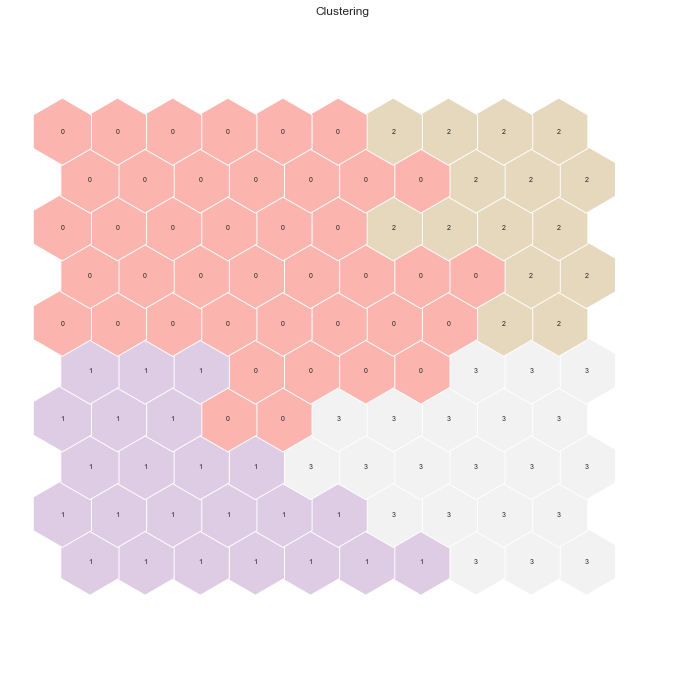

In [177]:
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = sm.cluster(hierclust)

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

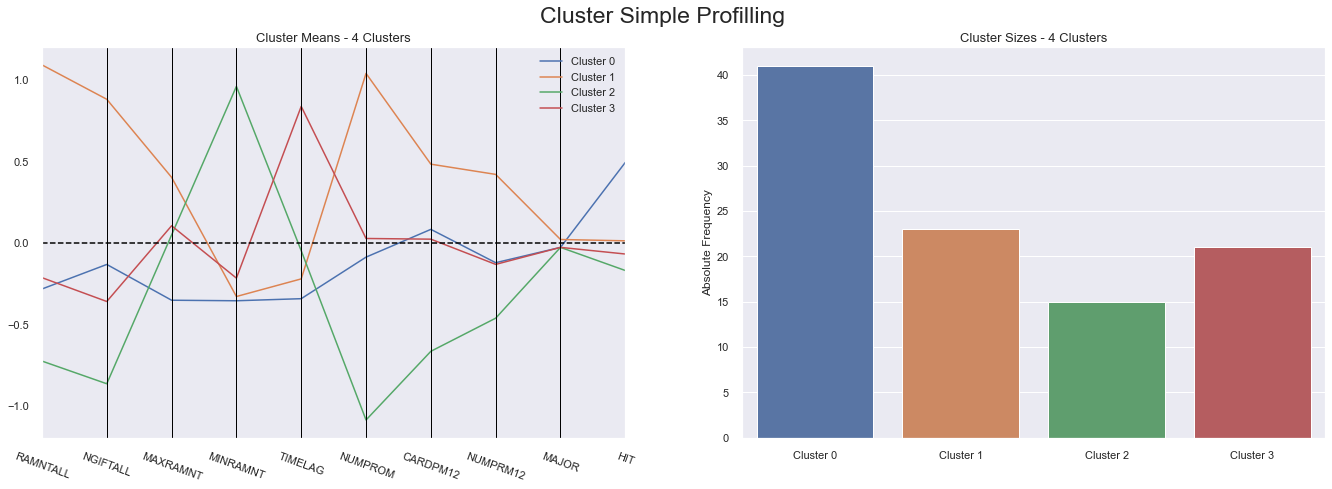

In [180]:
cluster_profiles(som_hc_final,["hc_4_label"], figsize=(23, 7),compar_titles=["SOM + HC - Value"])

### Self-Organizing Maps (SOM) + K-means
Considering the good results of the previous segmentation we decided to experiment with the SOM + K-means approach.

In [ ]:
# vamos escolher o SOM + KMEANS

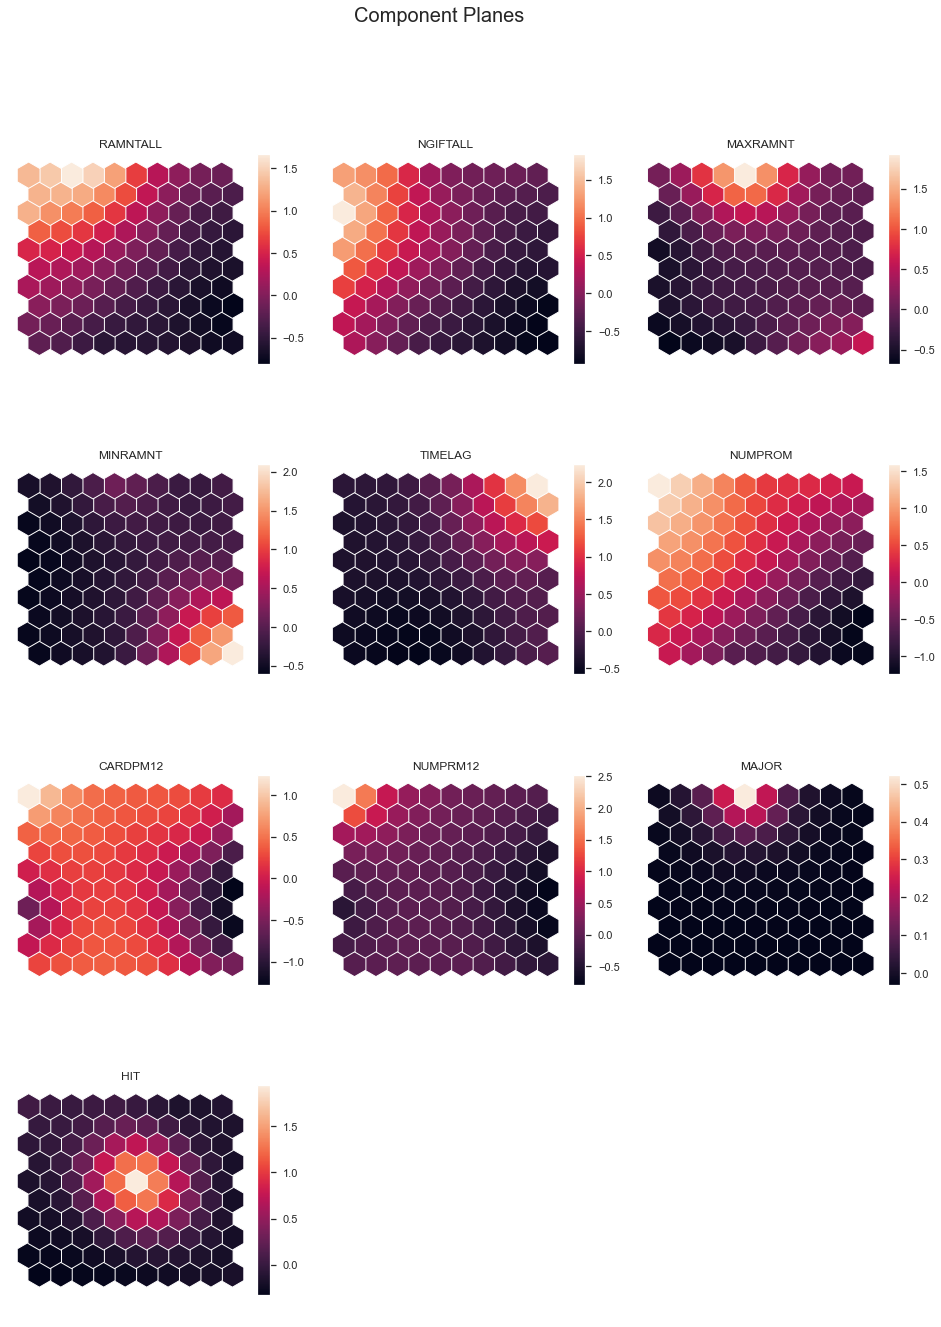

In [136]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

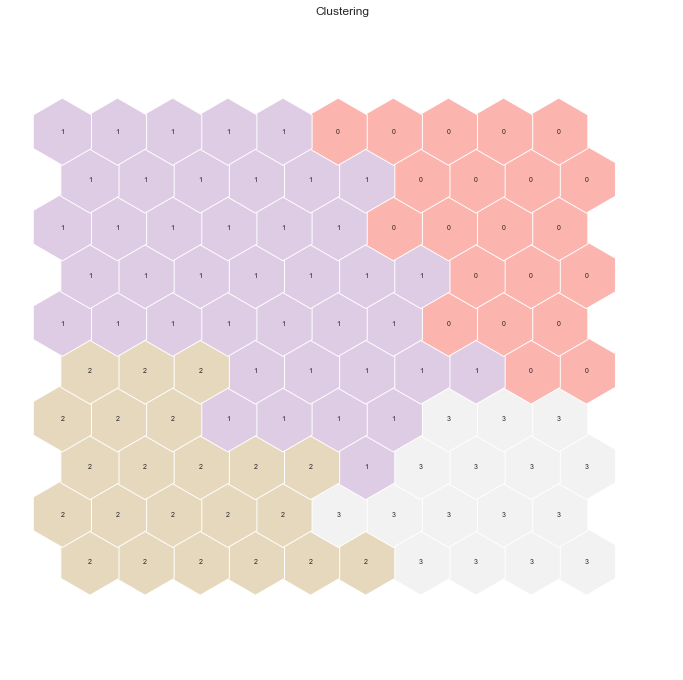

In [137]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm.cluster(kmeans)
hits  = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [138]:
nodes = sm.get_node_vectors()

kmeans_nodes = pd.DataFrame(nodes, columns=standard_value.columns)
kmeans_nodes['kmeans_4_label']= nodeclus_labels

In [139]:
# Obtaining SOM's BMUs labels
bmus_map_kmeans = sm.find_bmu(standard_value)[0]  # get bmus for each observation in df

kmeans_bmus = pd.DataFrame(
    np.concatenate((standard_value, np.expand_dims(bmus_map_kmeans,1)), axis=1),
    index=standard_value.index, columns=np.append(standard_value.columns,"BMU")
)

In [140]:
# Get cluster labels for each observation
som_kmeans_final = kmeans_bmus.merge(kmeans_nodes['kmeans_4_label'], 'left', left_on="BMU", right_index=True)

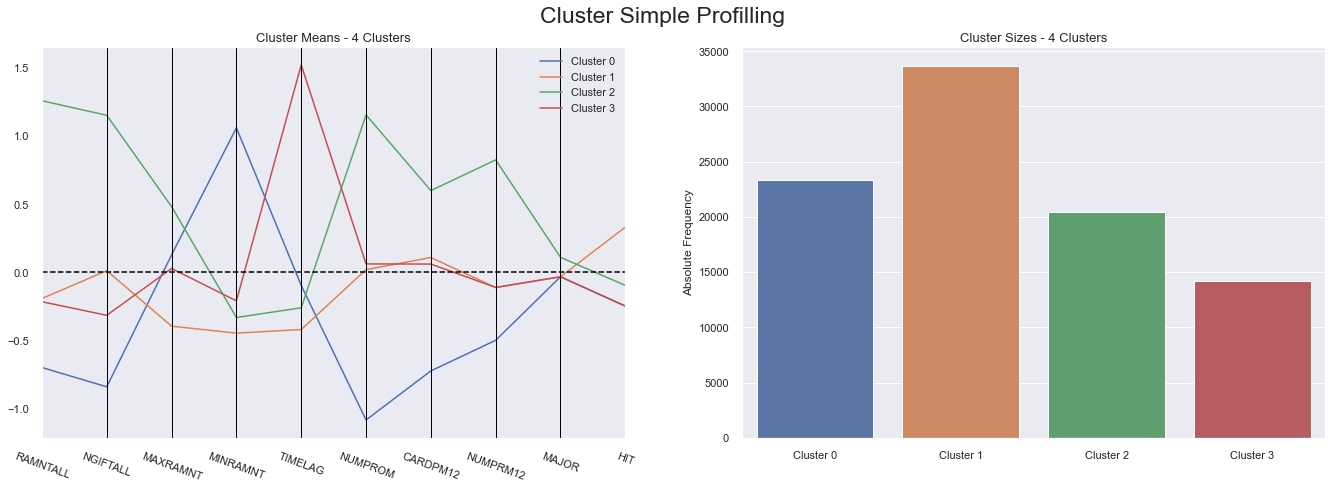

In [141]:
cluster_profiles(som_kmeans_final.drop('BMU',axis=1),["kmeans_4_label"], figsize=(23, 7),compar_titles=["K-Means + HC - Value"])

In [142]:
two_dim = TSNE(random_state=42).fit_transform(som_kmeans_final.drop('BMU',axis=1))

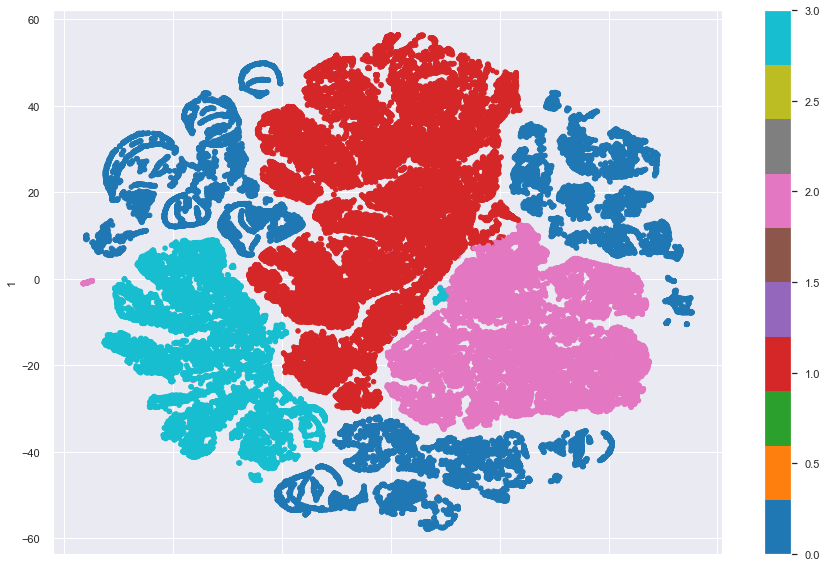

In [143]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=som_kmeans_final['kmeans_4_label'], colormap='tab10', figsize=(15,10))
plt.show()

In [145]:
demo_for_value=demographic.drop(categorical,axis=1).copy()

In [146]:
demo_for_value_std=pd.DataFrame(StandardScaler().fit(demo_for_value).transform(demo_for_value),index=demo_for_value.index, columns=demo_for_value.columns)

In [147]:
demo_for_value_std['kmeans_4_label']=som_kmeans_final['kmeans_4_label']

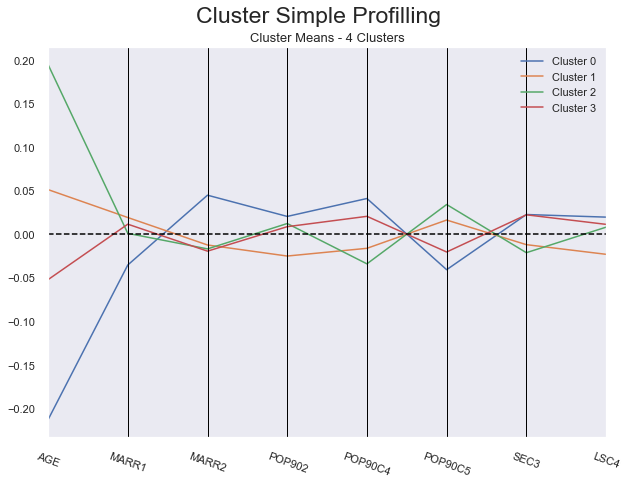

In [171]:
cluster_single_profile(demo_for_value_std, ['kmeans_4_label'], figsize=(10, 7), compar_titles="SOM + KMEANS")

In [179]:
analyse_value=pd.merge(som_kmeans_final['kmeans_4_label'],demographic[categorical],left_index=True,right_index=True)

In [204]:
ohe = OneHotEncoder() 

In [206]:
cluster_labels = pd.DataFrame(ohe.fit_transform(som_kmeans_final["kmeans_4_label"].values.reshape(-1,1)).toarray(),
                              index=som_kmeans_final.index, columns=["cluster_0", "cluster_1", "cluster_2", "cluster_3"])


In [207]:
cluster_labels

cluster_0  cluster_1  cluster_2  cluster_3
0            0.0        0.0        1.0        0.0
1            0.0        1.0        0.0        0.0
2            0.0        0.0        1.0        0.0
3            0.0        0.0        1.0        0.0
4            0.0        0.0        1.0        0.0
...          ...        ...        ...        ...
93450        0.0        0.0        1.0        0.0
93451        1.0        0.0        0.0        0.0
93452        1.0        0.0        0.0        0.0
93453        0.0        1.0        0.0        0.0
93454        0.0        0.0        1.0        0.0

[91679 rows x 4 columns]

In [222]:
som_kmeans_final['kmeans_4_label']

0        2
1        1
2        2
3        2
4        2
        ..
93450    2
93451    0
93452    0
93453    1
93454    2
Name: kmeans_4_label, Length: 91679, dtype: int32

In [225]:
mca = prince.MCA()
mca.fit(cluster_labels)

MCA()

In [226]:
mca_df = mca.transform(cluster_labels)

ValueError: dimension mismatch

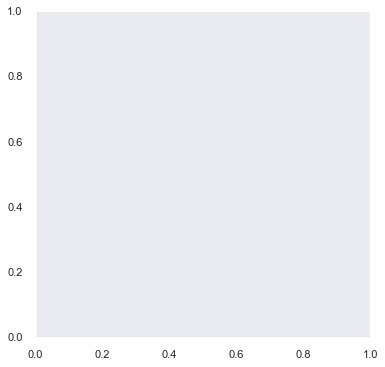

In [227]:
ax = mca.plot_coordinates(
     X=mca_df,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

ax.get_figure()


### Demographic

### DBSCAN

REGION_MidWest  REGION_NorthEast  REGION_South  REGION_West  GENDER_F  \
0                 1.0               0.0           0.0          0.0       1.0   
1                 0.0               0.0           0.0          1.0       0.0   
2                 0.0               0.0           1.0          0.0       0.0   
3                 0.0               0.0           0.0          1.0       1.0   
4                 0.0               0.0           1.0          0.0       1.0   
...               ...               ...           ...          ...       ...   
93450             0.0               0.0           1.0          0.0       1.0   
93451             0.0               0.0           0.0          1.0       0.0   
93452             0.0               0.0           1.0          0.0       0.0   
93453             1.0               0.0           0.0          0.0       0.0   
93454             0.0               0.0           0.0          1.0       1.0   

       GENDER_M  GENDER_other  
0           0.0           0.0  
1           1.0           0.0  
2           1.0           0.0  
3           0.0           0.0  
4           0.0           0.0  
...         ...           ...  
93450       0.0           0.0  
93451       1.0           0.0  
93452       1.0           0.0  
93453       1.0           0.0  
93454       0.0           0.0  

[91679 rows x 7 columns]

In [175]:
demographic_no_categorical=demographic.iloc[:,7:].copy()

In [176]:
demographic_no_categorical_std=pd.DataFrame(StandardScaler().fit(demographic_no_categorical).transform(demographic_no_categorical),index=demographic_no_categorical.index, columns=demographic_no_categorical.columns)

In [ ]:
# from sklearn.neighbors import NearestNeighbors


In [ ]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(demographic_no_categorical_std)
distances, _ = neigh.kneighbors(demographic_no_categorical_std)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=4*demographic_no_categorical.shape[1], n_jobs=4)
dbscan_labels = dbscan.fit_predict(demographic_no_categorical_std)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

In [ ]:
dbscan_df=demographic_no_categorical_std.copy()
dbscan_df['labels_dbscan']=dbscan_labels

In [ ]:
# Computing the R^2 of the cluster solution
sst = get_ss(dbscan_df)  # get total sum of squares
ssw_labels = dbscan_df.groupby(by='labels_dbscan').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

In [ ]:
cluster_profiles(dbscan_df,["labels_dbscan"], figsize=(23, 7),compar_titles=["DBSCAN"])

###  Mean Shift Clustering

In [ ]:
# The following bandwidth can be automatically detected using (we need to set quantile though)
# Based on distance to nearest neighbors for all observations
bandwidth = estimate_bandwidth(demographic_no_categorical_std, quantile=0.25, random_state=1, n_jobs=-1)
bandwidth

In [ ]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(demographic_no_categorical_std)

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

In [ ]:
msc=demographic_no_categorical_std.copy()

In [ ]:
msc['labels_msc']=ms_labels

In [ ]:
# Computing the R^2 of the cluster solution
sst = get_ss(msc)  # get total sum of squares
ssw_labels = msc.groupby(by='labels_msc').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

In [ ]:
cluster_profiles(msc,["labels_msc"], figsize=(23, 7),compar_titles=["Mean Shift Clustering"])

### MiniBatchKMeans

In [158]:
MiniBatch = MiniBatchKMeans(n_clusters=None,random_state=0)


In [159]:
plotKElbow(MiniBatch,demographic_no_categorical_std,'calinski_harabasz')
plotKElbow(MiniBatch,demographic_no_categorical_std,'distortion')

NameError: name 'demographic_no_categorical_std' is not defined

In [ ]:
avg_silhouette(2,6,demographic_no_categorical_std.sample(frac=0.60),MiniBatch)

In [ ]:
miniBatch = MiniBatchKMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
miniBatch_labels = miniBatch.fit_predict(demographic_no_categorical_std)

In [ ]:
miniBatch_df=demographic_no_categorical_std.copy()
miniBatch_df['miniBatch_labels']=miniBatch_labels

In [ ]:
cluster_profiles(miniBatch_df,["miniBatch_labels"], figsize=(23, 7),compar_titles=["MiniBatchKMeans Clustering"])

In [ ]:
two_dim = TSNE(random_state=42).fit_transform(miniBatch_df)

In [ ]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=miniBatch_df['miniBatch_labels'], colormap='tab10', figsize=(15,10))
plt.show()